<h2> Table of contents</h2>
1. Introduction
2. Import libraries
3. #############
4. ##########
5. ###############
6. ###############
7. ###############
8. ###############
9. ###############
10. ###############
11. ###############
12. ###############
13. Conclusion

<h3><u>Instructions</u></h3>

<p>something good</p>

<h3><u>Import libraries</u></h3>

In [87]:
import pandas as pd
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows',4000)
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import requests
import json
import pprint
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

<h3><u>Upload Annual_Crime_Austin_2014_to_2016_update.csv </u></h3>

In [33]:
df_Crime_Austin_2014_to_2016 = pd.read_csv('Annual_Crime_Austin_2014_to_2016_update.csv')
df_Crime_Austin_2014_to_2016.head()

GO Primary Key  Council District         GO Highest Offense Desc  \
0     201610188.0               8.0  AGG ASLT ENHANC STRANGL/SUFFOC   
1     201610643.0               9.0  THEFT                            
2     201610892.0               4.0  AGG ROBBERY/DEADLY WEAPON        
3     201610893.0               9.0  THEFT                            
4     201611018.0               4.0  SEXUAL ASSAULT W/ OBJECT         

  Highest NIBRS/UCR Offense Description GO Report Date  \
0                           Agg Assault       1-Jan-16   
1                                 Theft       1-Jan-16   
2                               Robbery       1-Jan-16   
3                                 Theft       1-Jan-16   
4                                  Rape       1-Jan-16   

                                         GO Location Clearance Status  \
0  8600 W SH 71                                  ...                C   
1  219 E 6TH ST                                  ...                C   
2  701 W LONGSPUR BLVD                           ...                N   
3  404 COLORADO ST                               ...                N   
4                                                NaN                C   

  Clearance Date GO District  GO Location Zip  GO Census Tract  \
0      12-Jan-16           D          78735.0            19.08   
1       4-Jan-16           G          78701.0            11.00   
2       3-May-16           E          78753.0            18.23   
3      22-Jan-16           G          78701.0            11.00   
4      10-Mar-16           E          78753.0            18.33   

   GO X Coordinate  GO Y Coordinate  
0        3067322.0       10062796.0  
1        3114957.0       10070462.0  
2        3129181.0       10106923.0  
3        3113643.0       10070357.0  
4              NaN              NaN

<h3><u>Rename Column Names for df_Crime_Austin_2014_to_2016</u></h3>

In [34]:
df_Crime_Austin_2014_to_2016.rename_axis({'GO Location Zip':'Zip','Highest NIBRS/UCR Offense Description':'Austin_Offense_Description'},axis = 1, inplace=True)


<h3><u>Check for Duplicated Rows and dropna values in df_Crime_Austin_2014_to_2016 </u></h3>

In [35]:
number_of_Duplicated_Rows = df_Crime_Austin_2014_to_2016.duplicated().sum()
print('There are {} duplicated rows in df_Crime_Austin_2014_2016'.format(number_of_Duplicated_Rows))

There are 0 duplicated rows in df_Crime_Austin_2014_2016


In [36]:
df_Crime_Austin_2014_to_2016 = df_Crime_Austin_2014_to_2016.dropna()

<h3>Change zipcode to an object dtype in df_Crime_Austin_2014_to_2016 dataframe </h3>

In [37]:
df_Crime_Austin_2014_to_2016['Zip'] = df_Crime_Austin_2014_to_2016.Zip.astype(int)
df_Crime_Austin_2014_to_2016['Zip'] = df_Crime_Austin_2014_to_2016.Zip.astype(str)

<h3>Save df_Crime_Austin_2014_to_2016 as .csv file </h3>

In [38]:
df_Crime_Austin_2014_to_2016.to_csv('Final_Generated_Crime_Austin_2014_to_2016.csv',index=False)

<h3>Setup YELP  API Authentication</h3>

In [39]:
keys ={"client_id":"acsWZVrkgYT2pceSbVY3SA" ,
      "client_secret": "3P6HCoVLXl5IddCFs0yokn8fZ2gzkvzzatJaUjG0PJrD5Xi9gbPvrkBwYFwMmnMP"}

token = requests.post(url="https://api.yelp.com/oauth2/token",data=keys).json()

access_token = token['access_token']

headers = {'Authorization': 'bearer %s' % access_token}

<h3>Austin ZipCodes</h3>

In [40]:
#There are 48 different zip codes in the df_Crime_Austin_2014_2016 dataframe. 

austin_zips=['78735', '78701', '78753', '78724', '78741', '78704',
             '78748', '78758', '78744', '78747', '78756', '78759', 
             '78723', '78745', '78749', '78751', '78752', '78731', 
             '78702', '78722', '78705', '78757', '78721', '78739', 
             '78729', '78613', '78617', '78746', '78750', '78719', 
             '78703', '78736', '78653', '78727', '78652', '78754', 
             '78726', '78717', '78660', '78725', '78712', '78730', 
             '78742', '78728', '78732', '78737', '78733', '78610']

<h3>Yelp API Call by austin zipcode </h3>

In [41]:
#Create empty list for all the information pulled from yelp api

info = []

#Using the austin_zips list generate a json file for all the 48 austin zipcodes

for zips_codes in austin_zips:
    url = 'https://api.yelp.com/v3/businesses/search'
    params = {'location': zips_codes, 'sort_by': 'rating', 'limit' : 50}
    resp = requests.get(url=url, params=params, headers=headers).json()
    data = resp['businesses']
    info.append(data)
    

In [42]:
#pprint.pprint(info)

<h3>Generated Yelp Dataframe</h3>

In [43]:
#Store information from api in below empty lists

list_business_name = []
list_review_counts = []
list_ratings = []
list_zip_codes = []
list_id_business = []
list_city =[]
list_state = []
list_categories = []
list_address = []



#loop through json file containing all the information from Yelp API call

for x in range(len(info)):
    
    data = info[x]
   
    
    for item in data:
        list_business_name.append(item.get('name'))
        list_review_counts.append(item.get('review_count'))
        list_ratings.append(item.get('rating'))
        
        list_zip_codes.append(item.get('location').get('zip_code'))
        list_id_business.append(item.get('id'))
        list_city.append(item.get('location').get('city'))
        list_state.append(item.get('location').get('state'))
        list_categories.append(item.get('categories')[0].get('alias'))
        list_address.append(item.get('location').get('display_address')[0])                

In [49]:
#Generate df_Yelp_API dataframe

df_Yelp_API = pd.DataFrame({'Business_Name'   : list_business_name,
                            'Review_Counts'   : list_review_counts,
                            'Business_Ratings': list_ratings,
                            'Zip'             : list_zip_codes,
                            'Business_ID'     : list_id_business,
                            'City'            : list_city,
                            'State'           : list_state,
                            'Category'        : list_categories,
                            'Company_Address' : list_address  })


                           

df_Yelp_API

Business_ID  \
0                  urban-mattress-south-austin-austin-2   
1                                    healthy-pet-austin   
2                            toast-entertainment-austin   
3                            union-jack-plumbing-austin   
4                             mercedes-flowers-austin-8   
5                                       zen-well-austin   
6                         sage-blossom-massage-austin-2   
7                      barefoot-mosquito-control-austin   
8                           the-natural-gardener-austin   
9                                  throckmortons-austin   
10    manish-patel-od-todays-vision-south-towne-aust...   
11               summer-rydel-dds-a-summer-smile-austin   
12                       addis-carpet-cleaning-austin-2   
13                   third-coast-home-inspection-austin   
14                      spacecraft-entertainment-austin   
15                       creative-images-by-keri-austin   
16              texas-honey-ham-company-west-lake-hills   
17                        dash-service-company-austin-5   
18        josh-brown-team-legacy-mutual-mortgage-austin   
19                jack-allens-kitchen-oak-hill-austin-2   
20             rudys-country-store-and-bar-b-q-austin-6   
21                                 pure-skin-spa-austin   
22                               caden-roofing-austin-2   
23                                       d-lites-austin   
24                               via-313-pizza-austin-5   
25                         buddhas-brew-kombucha-austin   
26                    pure-smiles-orthodontics-austin-2   
27            travis-country-veterinary-hospital-austin   
28                                  posh-salon-austin-2   
29                            ryan-carrel-studio-austin   
30                      professional-tv-mounting-austin   
31                                   wholy-bagel-austin   
32                happy-larrys-motorcycle-towing-austin   
33                     nicole-mlakar-photography-austin   
34                         meche-organic-salon-austin-2   
35                 dan-whites-screens-and-things-austin   
36                           oak-hill-eye-care-austin-2   
37                           slab-bbq-and-beer-austin-3   
38                     realty-austin-southwest-austin-2   
39                                        beirut-austin   
40                        maryes-gourmet-pizza-austin-2   
41               eurasia-sushi-bar-and-seafood-austin-2   
42                     vintage-and-lace-weddings-austin   
43                     cleantech-carpet-cleaning-austin   
44                           i-renovate-austin-austin-2   
45                                  juiceland-austin-22   
46                           sweet-treets-bakery-austin   
47                             tacodeli-west-lake-hills   
48                                designer-nails-austin   
49                      brad-b-plumbing-services-austin   
50                                      boteco-austin-3   
51                                savor-de-moi-austin-3   
52                  town-lake-metropolitan-parks-austin   
53                                     dee-dee-austin-2   
54                                      ceviche7-austin   
55                                    halal-time-austin   
56                             franklin-barbecue-austin   
57                            the-roosevelt-room-austin   
58                                   abo-youssef-austin   
59                                    dolce-neve-austin   
60                                 grannys-tacos-austin   
61                                 via-313-pizza-austin   
62                             the-tasty-spoon-austin-2   
63                                 la-barbecue-austin-3   
64               the-wild-parrots-of-east-austin-austin   
65                                          uchi-austin   
66                           texas-state-capitol-austin   
67                      mickleth

In [50]:
#Checking to make sure they both have the same zipcodes
#100 rows need to be removed from yelp dataframe. This rows contain zipcodes which are out of scope for the analysis.

df_Yelp_API['Zip'].isin(austin_zips).value_counts()

True     2301
False      98
Name: Zip, dtype: int64

<h3>Double checking the length of Dataframe</h3>

In [51]:
#Double checking the length of Dataframe to ensure all rows contain zipcodes which are in scope

df_Yelp_API = df_Yelp_API[df_Yelp_API['Zip'].isin(austin_zips)]
df_Yelp_API.shape

(2301, 9)

In [52]:
#Comparing the number of Zips in df_Yelp_API and df_Crime_Austin_2014_to_2016

df_Yelp_API.Zip.nunique() == df_Crime_Austin_2014_to_2016.Zip.nunique()

True

<h3>Checking for duplicated columns in df_Yelp_API dataframe </h3>

In [53]:
#There are 1055 duplicated rows in this dataframe these will be deleted 

df_Yelp_API.duplicated().sum()

1059

In [54]:
#After Dropping the duplicated row the dataframe will have the following number of rows

len(df_Yelp_API) - df_Yelp_API.duplicated().sum()

1242

In [55]:
#drop duplicated rows in df_Yelp_API and keep the first 

df_Yelp_API = df_Yelp_API.drop_duplicates(keep='first')

#Checking length of df_Yelp_API to ensure it has the correct amount of rows

df_Yelp_API.shape

(1242, 9)

<h3>Create blank columns for df_Yelp_API dataframe to store all Reviews</h3>

In [56]:
#Create blank columns for df_Yelp_API dataframe to store Reviews 

df_Yelp_API['First_Review'] = " "
df_Yelp_API['First_Timestamp'] = " "

df_Yelp_API['Second_Review'] = " "
df_Yelp_API['Second_Timestamp'] = " "

df_Yelp_API['Third_Review'] = " "
df_Yelp_API['Third_Timestamp'] = " "


df_Yelp_API['Yelp_Url'] = " "

In [57]:
#Use Yelp API to place all reviews in review columns associated with df_Yelp_API dataframe

for index,row in df_Yelp_API.iterrows():
    review = row['Business_ID']
    
    url_review = 'https://api.yelp.com/v3/businesses/{}/reviews'.format(review)
    
    api_reviews = requests.get(url=url_review,headers=headers).json()
    pprint.pprint(api_reviews)
    
    df_Yelp_API.set_value(index,'First_Review',api_reviews['reviews'][0]['text'])
    df_Yelp_API.set_value(index,'First_Timestamp', api_reviews['reviews'][0]['time_created'])
    df_Yelp_API.set_value(index,'Second_Review',api_reviews['reviews'][1]['text'])
    df_Yelp_API.set_value(index,'Second_Timestamp', api_reviews['reviews'][1]['time_created'])
    df_Yelp_API.set_value(index,'Third_Review',api_reviews['reviews'][2]['text'])
    df_Yelp_API.set_value(index,'Third_Timestamp', api_reviews['reviews'][2]['time_created'])
    df_Yelp_API.set_value(index,'Yelp_Url', api_reviews['reviews'][0]['url'])
    
#display df_Yelp_API dataframe after all information has be obtained   

df_Yelp_API.head(10)

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I was searching for a comfortable mattress and visited '
                      'several different stores in Austin. Deciding on a '
                      'mattress is no small decision.  But Troy was great...',
              'time_created': '2017-11-15 18:16:20',
              'url': 'https://www.yelp.com/biz/urban-mattress-south-austin-austin-2?hrid=pBFCXwUrSfK2fu7HUzJp7A&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/xyxyOQpER96wH5XKR7P2kw/o.jpg',
                       'name': 'Pam Y.'}},
             {'rating': 5,
              'text': 'I was helped by a Hannah at this store and she was '
                      'helpful and informative but not pushy or a typical '
                      'mattress salesperson. I ended up purchasing my...',
    

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'This was amazing! Dawn blew me away. She was so '
                      'knowledgeable, and got me back to full range of motion '
                      'and out of pain for the first time in weeks. The...',
              'time_created': '2017-11-12 12:41:10',
              'url': 'https://www.yelp.com/biz/zen-well-austin?hrid=D7NYV4SwSGALGAIzbdvAtg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/bPSbX5IWGRcMRK3YmUdXOQ/o.jpg',
                       'name': 'Jill J.'}},
             {'rating': 5,
              'text': 'Overall, a very unique massage experience!\n'
                      '\n'
                      'I did no research whatsoever on what exactly a Thai '
                      "massage is before coming here. That's smart, right? "
     

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I wanted to write this review even though I never got a '
                      "chance to do business with Thockmorton's. I sent a "
                      'message asking if they would be able to fix a...',
              'time_created': '2017-09-12 15:09:52',
              'url': 'https://www.yelp.com/biz/throckmortons-austin?hrid=9O-V7c9QUsTMV7EtqoAK6A&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/xXexg3xiF6JThht8_MJ8LA/o.jpg',
                       'name': 'Kate C.'}},
             {'rating': 1,
              'text': 'If you want to support businesses who support their '
                      'employees then Go somewhere else.\n'
                      '\n'
                      "I went to Throkmorton's for a new watchband on a 2nd "
       

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Craig came highly recommended by our realtor and I am '
                      'so glad I called him for our home inspection. Craig is '
                      'personable, thorough, efficient and very...',
              'time_created': '2017-11-04 06:23:34',
              'url': 'https://www.yelp.com/biz/third-coast-home-inspection-austin?hrid=VfqyG-DeQDiybiI8n_J8iw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/jlQojobG9PsZUVrFSV1CGQ/o.jpg',
                       'name': 'Meghann H.'}},
             {'rating': 5,
              'text': 'Craig was a recommendation from my realtor and she '
                      "couldn't be more right about him. Craig is super "
                      'personable and knowledgeable. He patiently explained, '
      

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': '10 years ago after having the coolant in my AC replaced '
                      'several times by another company l called Dash. After '
                      'promptly arriving they repaired the damaged...',
              'time_created': '2017-08-17 18:33:20',
              'url': 'https://www.yelp.com/biz/dash-service-company-austin-5?hrid=Z8KwzObrVeEucSJhODyAng&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Robert F.'}},
             {'rating': 1,
              'text': 'I understand that calling for AC repair on a Sunday '
                      'morning, in July, the on-call tech is going to be '
                      'swamped. But, still, waiting nearly 4 hours for a...',
              'time_created': '2017-07-30 11:19:25',
              'url': 'https://www.yelp.com

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I come here to get the lash lift/tint and I would 12/10 '
                      "recommend!! It's so nice to wake up and not have to "
                      "worry about putting mascara on bc you're still...",
              'time_created': '2017-10-12 16:21:30',
              'url': 'https://www.yelp.com/biz/pure-skin-spa-austin?hrid=V_thJoZfnzjytl6hK3A6mA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Stephanie J.'}},
             {'rating': 5,
              'text': 'If i could give Heather a thousand stars I would! First '
                      "off, let me say I'm from San Antonio, so I'm not super "
                      'familiar with Austin. I ended up going to...',
              'time_created': '2017-08-25 15:23:09',
              'url': 'https://www.yelp.com/biz

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "Buddha's Brew makes my favorite kombucha EVER. I love "
                      'the taste, the variety of flavors, and the little '
                      'bottles with the peace sign on the bottom. My only...',
              'time_created': '2015-09-02 09:29:19',
              'url': 'https://www.yelp.com/biz/buddhas-brew-kombucha-austin?hrid=uB1j439K-Am1en5zHu_T4g&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/DGveJF3WFYPm_ZRL_laL1w/o.jpg',
                       'name': 'Brandie M.'}},
             {'rating': 5,
              'text': 'THIS KOMBUCHA IS THE BEST and by far my absolute '
                      "favorite (and I've had a lot)!! All of their flavors "
                      'never disappoint. Great customer service. The '
             

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Ryan is a wonderful stylist: attentive, highly '
                      'experienced, personable, kind and a great listener.\n'
                      '\n'
                      'The entire experience was a joy from the moment I '
                      'walked...',
              'time_created': '2015-01-29 09:22:42',
              'url': 'https://www.yelp.com/biz/ryan-carrel-studio-austin?hrid=CANetLIyUIv4llL_r0OLSw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/3Jfpk37ixWs0X6AL-hR3GA/o.jpg',
                       'name': 'Xander M.'}},
             {'rating': 5,
              'text': 'Ryan does blonde like no other! He works his magic and '
                      'my bright blonde hair looks natural and grows out well! '
                      'He

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "I know I'm just adding to the pile of positive remarks "
                      "about Nicole's work & manner, but it's worth noting. "
                      "It's the least I could do for what she has given...",
              'time_created': '2014-02-22 14:11:42',
              'url': 'https://www.yelp.com/biz/nicole-mlakar-photography-austin?hrid=2rewTFZEmzXy3ZP_R3dDvQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/zXuBaFw4RGy1dl5kDtj4AA/o.jpg',
                       'name': 'Leslie H.'}},
             {'rating': 5,
              'text': 'Nicole was such a joy to work with. Photoshoots can be '
                      'stressful to say the least, and Nicole made the entire '
                      'process so relaxing and fun. In addition, she...

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Came here for lunch had the rib sandwich and it was '
                      'delicious. If your in the market for BBQ hands down '
                      "this place has some awesome meat options you can't...",
              'time_created': '2017-09-28 11:25:33',
              'url': 'https://www.yelp.com/biz/slab-bbq-and-beer-austin-3?hrid=TJTmbwQ5Rqd7hcoHDurhaA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/HkKvQ4kjWuhzxqEEDykZ1w/o.jpg',
                       'name': 'Mark M.'}},
             {'rating': 2,
              'text': 'TL;DR synopsis of this Slab BBQ & Beer location:\n'
                      '- City slicker limited-menu BBQ--as in "Sammys"\n'
                      '- Half-off ribs on Tuesday nights are half-gristle\n'
               

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "I'm ecstatic that I found this place. I love sushi with "
                      'all my heart and my boyfriend, well not so much. So '
                      'finding a place for date night that we can both...',
              'time_created': '2017-11-01 09:44:40',
              'url': 'https://www.yelp.com/biz/eurasia-sushi-bar-and-seafood-austin-2?hrid=xi9klS-sK6ZuEY87S5chow&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/tgulDMuxwMgSKzv3AODNYg/o.jpg',
                       'name': 'Ashley V.'}},
             {'rating': 4,
              'text': 'Okay, this is a plea to this restaurant to fix '
                      'something, figure something out, about your '
                      'ventilation/exhaust system! I am a huge fan of the food '
    

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Love all the vegan smoothies and juices here. Friendly '
                      'service as well. I highly recommend the originator!',
              'time_created': '2017-11-05 13:34:25',
              'url': 'https://www.yelp.com/biz/juiceland-austin-22?hrid=aRZC4U_E8pQF3Ln1-Gnr5Q&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/-DmPopOVmXnZ8yR6g06BkQ/o.jpg',
                       'name': 'Esther Y.'}},
             {'rating': 1,
              'text': 'Every single time I come here I think, "I could drive '
                      'home, make a smoothie and drink it in the time it takes '
                      'them to get my order to me."\n'
                      '\n'
                      'Edited to add:...',
              'time_created': '2017-0

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "He's pretty available so Brad has become my go-to "
                      'plumber in a pinch. Kitchen sink has a leak on a '
                      'Wednesday and guests are arriving for the weekend?! '
                      'Brad...',
              'time_created': '2017-11-14 20:33:28',
              'url': 'https://www.yelp.com/biz/brad-b-plumbing-services-austin?hrid=qEGSCN-u-Ku9_REyky30SQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/UghwqCMOyD-W4aiohcSVWg/o.jpg',
                       'name': 'Jennie K.'}},
             {'rating': 5,
              'text': 'Brad is responsive, courteous, and professional. He '
                      'showed up on time and contacted us to let us know that '
                      "he's on his way.\n"
        

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'This awesome trailer puts out some of the best Thai '
                      "cuisine I've ever had the pleasure of experiencing.  "
                      "When it comes to Thai food I'm usually familiar...",
              'time_created': '2017-10-14 17:13:04',
              'url': 'https://www.yelp.com/biz/dee-dee-austin-2?hrid=GLcBCnFk6q60RRPN371nAg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/8Gm9-JCLpgyQiFf1IuCKYg/o.jpg',
                       'name': 'Chris M.'}},
             {'rating': 4,
              'text': "Dee Dee is an awesome food truck, and I'll definitely "
                      "be back when I'm craving good Thai food! I came here "
                      'with friends on a Friday night. Parking is just...',
              'time

{'possible_languages': ['en', 'es'],
 'reviews': [{'rating': 5,
              'text': 'Decadent style, lush in high class, but yet subtle and '
                      'elegant! I loved the layout, the design, and the '
                      'vibe... I felt like I was in a rich dim lit...',
              'time_created': '2017-11-12 12:01:18',
              'url': 'https://www.yelp.com/biz/the-roosevelt-room-austin?hrid=Fo7XztXwy0dqYtDMa0ZTjg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/Nu7aFNLJjE_N75W8IivbDA/o.jpg',
                       'name': 'Brett J.'}},
             {'rating': 4,
              'text': 'Who knew something so swanky existed in Austin? With a '
                      'dark but lit layout, extravagance pouring from drinks '
                      'made by likable bartenders and classiness...',
             

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Hello pizza, my old friend\n'
                      "I've come to eat you up again\n"
                      'Because a vision softly creeping\n'
                      'Of your cheese has me weeping\n'
                      'And the vision that was planted in...',
              'time_created': '2017-11-27 20:01:30',
              'url': 'https://www.yelp.com/biz/via-313-pizza-austin?hrid=54Uw7H2Xrpbu5CSPRqmKtw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/9qV0MNFQbmt9RoFxAVwdpw/o.jpg',
                       'name': 'Amber K.'}},
             {'rating': 1,
              'text': "I've been eating at Via 313 for years, and have always "
                      'completely 100% loved the pizza at every location.  '
                      'When people 

{'possible_languages': ['nb', 'de', 'en', 'es'],
 'reviews': [{'rating': 5,
              'text': "We arrived at 5:00 thinking we'd have plenty of time to "
                      'join the happy hour. We soon realized we were actually '
                      'late, and were lucky to get the last two...',
              'time_created': '2017-11-29 17:41:50',
              'url': 'https://www.yelp.com/biz/uchi-austin?hrid=QR6gWvqKLnt6my64VGM6qA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/oRXfNvJEXzrTifXtP3SSzQ/o.jpg',
                       'name': 'Laine C.'}},
             {'rating': 3,
              'text': 'Came to Uchi with a high level of anticipation for a '
                      'celebration. The place was, of course, packed at 9:00 '
                      'pm on a Friday night. When we arrived we were...',
         

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'You actually order through a food truck and there is a '
                      'seating area available if you decide to eat there.  I '
                      'visited around 9 pm and there were many bugs...',
              'time_created': '2017-08-06 04:49:34',
              'url': 'https://www.yelp.com/biz/las-trancas-austin?hrid=jO-El7WfoO_J5mgzGnUrzw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/dV6DNtfRrNlnRgmGdimd9w/o.jpg',
                       'name': 'Jorge N.'}},
             {'rating': 5,
              'text': "FINALLY, QUALITY TACOS THAT AREN'T $5 EACH.\n"
                      '\n'
                      "Las Trancas has some incredible tacos. I'd recommend "
                      'getting the pastor (usually my go to anywhere but '

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "Ya'll, I don't want to write this because I really "
                      'wanna keep the lines short but Kerlin is just as good, '
                      'if not better than all those nearby BBQ places...',
              'time_created': '2017-11-07 07:51:21',
              'url': 'https://www.yelp.com/biz/kerlin-bbq-austin?hrid=lD2iBSNgfNKLZDRkctEZrg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/bIF2jxM8iTkTKZ039gUipg/o.jpg',
                       'name': 'Lucy A.'}},
             {'rating': 5,
              'text': 'I spend $50k per year on food. Gourmet and down Home. '
                      'This is the best BBQ I have ever had. Why it was #4 on '
                      "eater's BBQ in Austin is beyond me. The line...",
              'time_

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "To drive home the point that's been made in the earlier "
                      'reviews: BEST PIZZA AND BEST BAR IN ALL OF AUSTIN. \n'
                      '\n'
                      'The pizza is tavern-style: square cut, thin...',
              'time_created': '2017-11-18 06:44:16',
              'url': 'https://www.yelp.com/biz/king-bee-lounge-austin-2?hrid=HiJd-8Sn2Y2NEAQqb3yFLg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/HgyOSO2qT1UKueHTs8mRZg/o.jpg',
                       'name': 'Liane T.'}},
             {'rating': 5,
              'text': 'This bar is everything. Everything is done with love '
                      'and authenticity. The pizza is so good (choosing '
                      'between pesto and tomato sauce is the hard

{'possible_languages': ['de', 'en'],
 'reviews': [{'rating': 5,
              'text': "It's Austin's front yard (courtesy of generous gifts by "
                      "A.J. Zilker in 1918 and 1932), and we're all invited to "
                      'come enjoy the 358 acres of expansive lawn,...',
              'time_created': '2017-09-12 14:07:27',
              'url': 'https://www.yelp.com/biz/zilker-park-austin-2?hrid=gUQSCYcBqUI7GU3hJM9i-Q&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/jh0vM_E2JLSPCod4ycW3Lw/o.jpg',
                       'name': 'Shannon B.'}},
             {'rating': 4,
              'text': "When I explore the inner-workings of a city, I'm always "
                      'on the lookout for public spaces that are designed for '
                      'public welfare and the occasional nap. Zilker...',
  

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Best. Breakfast. Tacos. Ever! Came to Austin for the '
                      'weekend and left so satisfied! \n'
                      '\n'
                      "Got the migas. Changed my life. I'll never be the same "
                      'woman after...',
              'time_created': '2017-11-20 06:27:36',
              'url': 'https://www.yelp.com/biz/veracruz-all-natural-austin-6?hrid=wURHidd6bSsSXBMVbGqG8Q&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/XPoqT3o8a-nDTlpnT373Og/o.jpg',
                       'name': 'Liz C.'}},
             {'rating': 4,
              'text': "This is a solid breakfast taco place. I didn't know "
                      'what migas were and had to google it. Apparently, it is '
                      'tortilla

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "Ain't nothing better than some good ol' southern "
                      "comfort food--and it's breakfast food! \n"
                      '\n'
                      'I was strolling back to my car after ACL and was '
                      'surprised to see...',
              'time_created': '2017-10-08 14:39:47',
              'url': 'https://www.yelp.com/biz/biscuits-groovy-south-austin?hrid=Hw_ycRLYCXjnfujGJcB42Q&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/5bc4-3idXgi_6-2mp1SrUA/o.jpg',
                       'name': 'Kasper L.'}},
             {'rating': 4,
              'text': 'This place was soooo delicious! Perfect comfort '
                      'breakfast. I had the Johnny Cash made vegan, it was '
                      'great, howe

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'One night in Austin and boy did we strike gold.\n'
                      'This place was the jam.\n'
                      'If you love the most delicious Veggie going, then this '
                      'is your spot,...',
              'time_created': '2017-11-26 15:19:02',
              'url': 'https://www.yelp.com/biz/true-food-kitchen-austin-2?hrid=wMHcTH34tuu9KvvoNuUyPg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/2L56RrbmHp4R-qfXZZ9X4Q/o.jpg',
                       'name': 'Ian K.'}},
             {'rating': 3,
              'text': 'You should probably go...\n'
                      '\n'
                      'I hesitate to write a review after just one visit, but '
                      'this place deserves your attention. Why only a 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "For the last several years, I've been looking for a "
                      "cheesesteak place that is better than Phatso's, which "
                      'shut down. The hunt is over. Way South Philly...',
              'time_created': '2017-06-18 11:25:15',
              'url': 'https://www.yelp.com/biz/way-south-philly-austin?hrid=_m9rBcp25IOW_N5DfCM0Zg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/cf7O8QdUuHRFSA50jsx6CA/o.jpg',
                       'name': 'John H.'}},
             {'rating': 5,
              'text': 'Found this place through the advice of local Austin '
                      'Yelpers, so figured to check them out.\n'
                      '\n'
                      'I am glad that I did. The sandwiches were great '
     

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'What can be said about this place that has not. Owners '
                      'are friendly , get to know their customers, the hot '
                      'dogs are fantastic blend of flavors and buns are...',
              'time_created': '2017-11-04 14:09:46',
              'url': 'https://www.yelp.com/biz/t-locs-sonora-hot-dogs-austin-4?hrid=2Mxi5fscy-8_vsR_wos6-A&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/W6cLqjBfBCnqR-J2mc891w/o.jpg',
                       'name': 'Mike B.'}},
             {'rating': 2,
              'text': 'Mystified by all these 5 star reviews, which just goes '
                      'to show that people in Austin will pay almost anything '
                      'for a food item they are not familiar with....',
   

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "Came here for lunch on a Saturday since I've heard so "
                      'much about the food here. My brother has been here '
                      'several times before and recommended the poke...',
              'time_created': '2017-10-21 18:39:30',
              'url': 'https://www.yelp.com/biz/the-big-kahuna-austin-3?hrid=L3T4S82aoyPvIM-tmR-RTg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/tQL7i6T052ZF-ulSXuoO5g/o.jpg',
                       'name': 'Nikita D.'}},
             {'rating': 4,
              'text': "A decent Hawaiian food truck. Not the best I've ever "
                      'had, but solid. I came when they were almost out of '
                      'everything (they had some catering stuff later in...',
             

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Though I came here to study; I stayed for the music and '
                      'the vibe. The lighting was a bit too dark to get any '
                      'reading done--granted I did come at 10pm on a...',
              'time_created': '2017-09-24 16:59:06',
              'url': 'https://www.yelp.com/biz/yahala-hookah-lounge-austin?hrid=O5KPlEwyxCIBoGJU6iFLWg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/6Y2D596hsuzMzwJvq1FLsQ/o.jpg',
                       'name': 'Tabias W.'}},
             {'rating': 4,
              'text': 'Leave it to Armenians to find a hookah lounge in Austin '
                      ':x\n'
                      '\n'
                      'Though kinda in the middle of nowhere, I really liked '
                      

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Finally found good breakfast tacos up north! Homemade '
                      'right in front of you. Migas was amazing and the '
                      "chorizo isn't greasy like most places. So happy to...",
              'time_created': '2017-10-21 07:23:30',
              'url': 'https://www.yelp.com/biz/jrs-tacos-austin?hrid=drrSvqc4eT0217jy19ja_Q&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/o3N5vvdPtz9bSHjHsqvflw/o.jpg',
                       'name': 'Landa C.'}},
             {'rating': 5,
              'text': "Found JR's taco on Yelp while I was have a cafeteria "
                      'food confidence crisis and did not want to spend '
                      'another dime there.\n'
                      'As the other reviews mention, 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Every time I come here with my wife we get the most '
                      'awesome customer service. The spot is really chill '
                      'atmosphere is great. Audi takes great care of us....',
              'time_created': '2017-10-13 18:55:24',
              'url': 'https://www.yelp.com/biz/hookah-buzz-austin-7?hrid=Ai3Dbv4J_ZOEQdGzcLmrdg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/27LWAuRN83jdG48m1J6zJg/o.jpg',
                       'name': 'Ken P.'}},
             {'rating': 5,
              'text': 'This place has literally the BEST paan hookah in ATX '
                      'hands down! The hookah will last you for hours..you get '
                      'new coals without having to ask, they play good...',
              '

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "Just tried some today and I'm totally hooked!!\n"
                      'Price is very affordable (varies from $1-5), open '
                      'Monday-Saturday 10-6, located near crossing of Parmer '
                      'Lane...',
              'time_created': '2017-10-11 12:01:52',
              'url': 'https://www.yelp.com/biz/bodhi-viet-veggie-cuisine-austin-8?hrid=iqG7MDH_jk9k1NB8Ap4ZsA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/lYNCRgIueji6-6XlCyn-CA/o.jpg',
                       'name': 'Thress S.'}},
             {'rating': 1,
              'text': 'I had the vegan rice dish and the veagn Bhan mi, both '
                      'were extremely dry, chewy and  underwhelming to say the '
                      'least. The fake vegan

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Gonna keep this brief: \n'
                      '\n'
                      'This is an adorable little coffee stand inside the new '
                      'Veracruz All Natural brick and mortar. I had a truly '
                      'stellar espresso and my...',
              'time_created': '2017-11-27 12:27:58',
              'url': 'https://www.yelp.com/biz/machine-head-coffee-austin?hrid=5tlosLMgzONm5YL7Tbum1A&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/MVPDSOSzqWNcUPFu_sxRwg/o.jpg',
                       'name': 'Kasy S.'}},
             {'rating': 5,
              'text': 'Nolan & crew are the best there is. Just great coffee '
                      'people. It helps that they share a space with the best '
                      "tacos

{'possible_languages': ['en', 'es'],
 'reviews': [{'rating': 5,
              'text': 'Why 5 starts ? \n'
                      'Well first very nice people Sunday 2pm for launch  with '
                      'my family. We order the full family meal come with 2 '
                      'sides and whole chicken . We...',
              'time_created': '2017-11-20 01:37:34',
              'url': 'https://www.yelp.com/biz/inka-chicken-austin?hrid=JqjkT7_b6ADJ1gQ9uuq5QA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/F2XNPglNstBwzvOyaOzkPA/o.jpg',
                       'name': 'Tony E.'}},
             {'rating': 5,
              'text': 'AMAZING Rotisserie chicken! The chicken is super '
                      'flavorful and moist. I would recommend this place to '
                      'anyone and everyone. \n'
                 

{'possible_languages': ['en', 'es'],
 'reviews': [{'rating': 5,
              'text': 'This place is half restaurant, half bakery. An '
                      'authentic Mexican spot where everything is delicious!\n'
                      '\n'
                      'Restaurant has GREAT breakfasts tacos. They use...',
              'time_created': '2017-11-23 07:43:54',
              'url': 'https://www.yelp.com/biz/mi-tradici%C3%B3n-austin-3?hrid=dAGUlHqxVqZNzTog6pHNAA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/TzkfRQOnbPmnD0gtWDCjcQ/o.jpg',
                       'name': 'Cynthia A.'}},
             {'rating': 4,
              'text': 'So so so happy we went to this place!!! Very simple '
                      'establishment.  We had tortas and pastor tacos.\n'
                      'The tortas were great...the bread wa

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "First off, I don't really like the idea of eating from "
                      'food trucks but mannnn these tacos are amazing. If you '
                      "want real tacos come here. I've been to Mexico...",
              'time_created': '2017-07-18 18:47:16',
              'url': 'https://www.yelp.com/biz/tacos-y-tortas-el-chilango-austin-2?hrid=GkmCdBQyv2y0z09fR90RDQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'G V.'}},
             {'rating': 5,
              'text': 'This guerita LOVES tortas and this food truck does it '
                      'perfectly. The Torta Chilango is the BOMB. Get it! It '
                      "comes with everything I've ever wanted or...",
              'time_created': '2017-10-19 15:27:42',
              'url': 'https://www.yelp.c

{'possible_languages': ['fr', 'en'],
 'reviews': [{'rating': 5,
              'text': 'I came here for lunch with my boyfriend a couple days '
                      'ago for the first time and it was quite an '
                      'experience. \n'
                      '\n'
                      'Upon walking in, there was only one other...',
              'time_created': '2017-10-22 09:24:21',
              'url': 'https://www.yelp.com/biz/d-k-sushi-and-seoul-asian-food-market-austin?hrid=E3geHYmK44jaGjq7tS4Y1A&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/vRmhJtm000PzYqPCft33JQ/o.jpg',
                       'name': 'Elizabeth S.'}},
             {'rating': 5,
              'text': 'Do not be fooled by the shabby exterior. Or the '
                      'graffiti, disco themed inside, and open mic looking '
            

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Best bubble tea in town! They have a large selection of '
                      'drinks from smoothies to slushies to milk teas. My go '
                      'to drinks are the iced Vietnamese coffee...',
              'time_created': '2017-11-10 16:07:35',
              'url': 'https://www.yelp.com/biz/teapioca-lounge-austin-3?hrid=pTgpAdCB-xJODaiEwtq7IQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/iIipNNABgPaLg_Oh2PeyMQ/o.jpg',
                       'name': 'Blair V.'}},
             {'rating': 5,
              'text': '* I love it here! This is my new favorite place! \n'
                      '\n'
                      '* Great service, amazing drinks and lovely little '
                      'lounge area! \n'
                      '\n'
 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "First time here and I'm in love.\n"
                      '\n'
                      "It feels like I'm entering someone's house when you "
                      'walk in. Freshly made pastries, sandwiches, and '
                      'breakfast goodies...',
              'time_created': '2017-10-03 06:40:37',
              'url': 'https://www.yelp.com/biz/brentwood-social-house-austin?hrid=nmEijmfFyw7eYgNgbaLadA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/scoYK5FZrFHxMnvf8gsSyw/o.jpg',
                       'name': 'Leo R.'}},
             {'rating': 2,
              'text': 'The place was very cute and I had high hopes. Sadly, I '
                      "won't be back. Three food I'd pre-made which us perfect "
                      'for sh

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'We found Kit & Kaboodle on Yelp and are so glad we did! '
                      'Booking with them was very easy and convenient. When we '
                      'arrived I filled out a little info about my...',
              'time_created': '2017-05-11 06:18:19',
              'url': 'https://www.yelp.com/biz/kit-and-kaboodle-grooming-austin?hrid=Tl6gtWryvrw3cn6_f0bVmg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/29UDb9R9or2fEmgRzdCh8A/o.jpg',
                       'name': 'Arly D.'}},
             {'rating': 5,
              'text': 'Brought my little senior mutt here two times for his '
                      "bi-yearly cuts and they've always done a great job and "
                      'been super kind! \n'
                      '\n'
     

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Several friends and I came here twice on a recent trip '
                      'to Austin.  The facilities are great, accommodating to '
                      'inexperienced shooters without being a...',
              'time_created': '2016-02-08 11:45:33',
              'url': 'https://www.yelp.com/biz/capitol-city-trap-and-skeet-club-manor?hrid=TEW9XWhetc3rdTdWnxvJrQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/ToIh6Ntwtr0Vp23-wMdReA/o.jpg',
                       'name': 'James J.'}},
             {'rating': 5,
              'text': 'Came here for the first time today with my husband, mom '
                      'and dad, we had a great time! It is really nice there '
                      'and very affordable. We bought the family...',
    

{'possible_languages': ['en'],
 'reviews': [{'rating': 2,
              'text': 'The quality of the vegetables from the farm is '
                      'exceptional and I will likely continue to buy from them '
                      'at markets, but the execution of the CSA is sub-par....',
              'time_created': '2015-08-04 11:31:45',
              'url': 'https://www.yelp.com/biz/green-gate-farms-austin?hrid=G6lhv4H2IsHmrAJTlbQ4fg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/nmE55oibNkUxbgopq67_gg/o.jpg',
                       'name': 'Stephen M.'}},
             {'rating': 5,
              'text': 'Toured this past week by invitation of one of the kids '
                      'that took their one week summer camp.  The enthusiasm '
                      'of the children was infectious.  They did not...',
       

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "We don't leave till tomorrow but so far this has been "
                      'the best B&B we have stayed at. This is a really nice '
                      'B&B really close to Austin. You get your own...',
              'time_created': '2016-01-30 19:46:09',
              'url': 'https://www.yelp.com/biz/decker-creek-bed-and-breakfast-and-biscuit-manor?hrid=GCSIGF4Pje22vs98NEII0w&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/raRFewLK5b0hPwcDkYV0PQ/o.jpg',
                       'name': 'Edgar A.'}},
             {'rating': 5,
              'text': 'Pat and Byron are the greatest hosts. Cabin 2 is '
                      'perfect for any dog owner. It has a beautiful rustic '
                      'look with very detailed/themed decorations. A

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Their food is always hot, fresh, and delicious! AND '
                      'THEY DELIVER! \n'
                      '\n'
                      'We love the sesame chicken, egg rolls, house special '
                      'fried rice, chicken noodle...',
              'time_created': '2017-10-28 18:09:30',
              'url': 'https://www.yelp.com/biz/dragon-express-austin?hrid=7zbhV5EPfcxypEU2EzWaSg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/5B58_UFflHXu0C9HneQ75Q/o.jpg',
                       'name': 'Victoria H.'}},
             {'rating': 5,
              'text': "The food at this place is so amazing. It's gotten so "
                      'much better than I had there in the past. Our family is '
                      'so happy to hav

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Stopped here on our way down to Port Aransas for '
                      'vacation. Excellent tacos and gordita, and the salsa '
                      'was just hot enough with a great flavor. Will have '
                      'to...',
              'time_created': '2017-02-18 12:29:28',
              'url': 'https://www.yelp.com/biz/jds-tacos-austin?hrid=buaaM6NrqLb5NUaxmkTnQA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/qoE5O_qYgtr_eUrhG1K8cw/o.jpg',
                       'name': 'Aaron N.'}},
             {'rating': 5,
              'text': 'This place is amazing. I eat here all the time. The '
                      "chorizo and potato breakfast tacos are where it's at. "
                      'The people who work there are also really nic

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'First time helicopter ride overlooking beautiful '
                      'downtown Austin. I lived in Austin for many years, but '
                      'the friendly pilot points out places of interest....',
              'time_created': '2017-01-22 10:18:39',
              'url': 'https://www.yelp.com/biz/austin-helicopter-tours-austin?hrid=KqtgoWismANeDedDabgMjA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/QUo7LczVbCcyK2_Li4dQ2Q/o.jpg',
                       'name': 'Dana C.'}},
             {'rating': 5,
              'text': 'What an amazing time. Perfect way to sweep your date '
                      'off their feet. Start with a shorter flight to make '
                      'sure you can handle it lol. But if you can handle...',
     

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Javier & Wallace came today to clean our furniture and '
                      'carpet.  They were VERY professional, introduced '
                      'themselves and knew their product.  They did a...',
              'time_created': '2017-07-07 08:04:48',
              'url': 'https://www.yelp.com/biz/stanley-steemer-austin-3?hrid=oiP-K8JGE9V58p2E8v1miw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Jim S.'}},
             {'rating': 1,
              'text': 'I received a quote through their online questionnaire. '
                      'I thought is was really expensive so I called to setup '
                      'and appointment for an on-site quote. When the...',
              'time_created': '2017-11-14 11:22:36',
              'url': 'https://www.yelp.com/biz/s

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "Simply a great place that is helping Austin's youth and "
                      'volunteers understand where the food comes from and how '
                      'it gets to its destinations.\n'
                      '\n'
                      'I was able to...',
              'time_created': '2015-12-23 17:12:57',
              'url': 'https://www.yelp.com/biz/urban-roots-farm-austin?hrid=vPs49gm0GyI4luSnC4p8Kw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/ExzlNRnOuLJu3WnHrkFFvQ/o.jpg',
                       'name': 'Troy H.'}},
             {'rating': 4,
              'text': 'We had a great time at the Tour de Farm Event. Would '
                      'recommend it for next year. What a great concept for '
                      "changing the

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'If you are looking to have your car detailed, look no '
                      'further. I bought a used car and it needed a complete '
                      'detail inside and out. I dropped off my car and...',
              'time_created': '2017-11-26 20:01:18',
              'url': 'https://www.yelp.com/biz/auto-detailing-by-dub-coates-austin?hrid=POSZG4KnFejdjtmHoZunqA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/PftSff_zWB6PWp4sbgrjQQ/o.jpg',
                       'name': 'Ruby M.'}},
             {'rating': 5,
              'text': "Dub's work is better than any other detail group I have "
                      'used! Highly recommend!',
              'time_created': '2017-05-15 16:09:15',
              'url': 'https://www.yelp.com/biz/a

{'possible_languages': ['en'],
 'reviews': [{'rating': 4,
              'text': 'Pretty decent sized community with great access to '
                      'highways. Friendly staff.',
              'time_created': '2017-07-01 11:51:02',
              'url': 'https://www.yelp.com/biz/the-reserve-at-walnut-creek-apartments-austin-2?hrid=DBIACBJn4QgsroOMA2IvSg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/5ngFWQsE2JHP0iVSHJY9Ig/o.jpg',
                       'name': 'Jorge O.'}},
             {'rating': 1,
              'text': '***WARNING****This place is an absolute nightmare. The '
                      'Management staff is hands down the most incompetent '
                      'group of people you will ever work with....',
              'time_created': '2017-11-13 17:29:42',
              'url': 'https://www.yelp.com/biz

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'My experience was just like many of the other reviews '
                      'you will see about Green iPhone Repair. I reached out '
                      'to Lane and he got back to me quickly, gave me a...',
              'time_created': '2015-07-01 12:02:17',
              'url': 'https://www.yelp.com/biz/green-device-exchange-austin?hrid=9JqEHw80hMWfaeYpt_rKZQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/-GIT4poXnPuMJo6dUAWkBw/o.jpg',
                       'name': 'Raquel C.'}},
             {'rating': 5,
              'text': 'Lane and Green iPhone Repair has saved me and my phone '
                      "several times in the last two years. I'm such a clumsy "
                      'oaf that even with a brick case around my...',
     

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Great experience. We have been several times both with '
                      'family and friends of all ages. This is not only '
                      'educational but an enjoyable and great work out....',
              'time_created': '2017-11-09 18:50:53',
              'url': 'https://www.yelp.com/biz/live-love-paddle-austin-2?hrid=vwKFoXM3Muz8qrh-iyEaiQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/UAdf7-MdUaHAFy41PQMZ9A/o.jpg',
                       'name': 'Elisa A.'}},
             {'rating': 5,
              'text': 'I went on the Bat Watching Tour and had a fantastic '
                      'time. The guide was very knowledgeable and friendly.. '
                      'The kayaking was a lot of fun, and the bats were...',
          

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "Love this little spot in Austin. If you're going to "
                      "take pictures, Park down the street - don't try to stop "
                      'your car in the middle of the on the corner...',
              'time_created': '2017-09-17 08:26:07',
              'url': 'https://www.yelp.com/biz/greetings-from-austin-postcard-mural-austin?hrid=l2mBcHEueRhsJ9ZLstdS1g&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/KD12DlPDf9SFVcanhRedcg/o.jpg',
                       'name': 'Phylicia P.'}},
             {'rating': 5,
              'text': 'What an awesome and iconic piece of Public Art in '
                      'Austin! \n'
                      '\n'
                      'Love the cute, "postcard" style and the colors!\n'
            

{'possible_languages': ['en', 'es'],
 'reviews': [{'rating': 5,
              'text': 'What can I say... this place is BOMB. I find myself '
                      'craving home slice ALL. THE. TIME. I love their '
                      'margherita pizza. Delicious slices of melted '
                      'mozzarella...',
              'time_created': '2017-11-24 00:27:26',
              'url': 'https://www.yelp.com/biz/home-slice-pizza-austin?hrid=8ZWwwIb2InLVFvtRFoFmaQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/VSgpr1-s2TcoGXKw8W679A/o.jpg',
                       'name': 'Claudia C.'}},
             {'rating': 4,
              'text': "$18.50 for a medium pizza that's actually really big. "
                      'Got half pepperoni and mushroom (#5) and half sausage, '
                      'ricotta cheese, and roasted

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'This place is now my favorite pho joint! The food is '
                      "delish and everything is so clean. It's a little "
                      'different from the usual sit in pho places, because...',
              'time_created': '2017-11-17 18:50:35',
              'url': 'https://www.yelp.com/biz/pho-please-austin-3?hrid=7n11WoX-Z2tMGDuriD59ug&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/iDxPnFo9Yk-UYCQR0vTlyw/o.jpg',
                       'name': 'Jamie G.'}},
             {'rating': 5,
              'text': 'I ate here last night, and my boyfriend and I agreed '
                      "that it's the most amazing pho we had ever eaten. The "
                      'service was awesome too. They had our appetizer...',
              '

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Yup yup yup! I needed to find a coffee spot stat and '
                      'trusty yelp led me to the right place once again.\n'
                      '\n'
                      "This place is so freaking tiny and adorable I can't...",
              'time_created': '2017-10-24 11:36:19',
              'url': 'https://www.yelp.com/biz/fleet-coffee-austin?hrid=UCv0bWazc25AZBfB4kL-7w&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/tgulDMuxwMgSKzv3AODNYg/o.jpg',
                       'name': 'Ashley V.'}},
             {'rating': 4,
              'text': 'This is where you might find most of the hipsters in '
                      'Austin since it has great coffee and '
                      'cool/modern/unassuming decor. :)\n'
                   

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Absolutely fantastic and authentic Jamaican food. Well '
                      "eclipses good I've had in the Bahamas and absolutely "
                      'worth a trip!!!\n'
                      '\n'
                      'I had the jerk chicken and it...',
              'time_created': '2017-10-27 13:00:18',
              'url': 'https://www.yelp.com/biz/tonys-jamaican-food-austin?hrid=KqVJIvazZER_N8ttWWlgOQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/xaurs84o5hAwYr0tCGPR8Q/o.jpg',
                       'name': 'Amila D.'}},
             {'rating': 4,
              'text': "Service: To be honest, I don't remember because I was "
                      "too busy eyeing everyone else's food. \n"
                      '\n'
                 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Thai-ful is AMAZING! If you are looking for authentic '
                      'Thai food with a twist (aka in roll form) I highly '
                      'recommend this food truck. The staff are as amazing...',
              'time_created': '2017-11-21 12:40:00',
              'url': 'https://www.yelp.com/biz/thai-2-u-austin-5?hrid=r4Bo8ERtoLlNhXifH1TIBQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/GzNFLAUwKV_cPEBxa8Motg/o.jpg',
                       'name': 'Daniel S.'}},
             {'rating': 5,
              'text': 'Great flavor, great food, super great customer service, '
                      'Thai Tea is the best!\n'
                      'Extreme menu!\n'
                      'Fresh and natural ingredients.\n'
                    

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'People like Daniel Brown are the reason we moved to '
                      'Austin. Kind, honest and hardworking and it shows in '
                      'his approach to business and the quality of food....',
              'time_created': '2017-07-28 17:42:40',
              'url': 'https://www.yelp.com/biz/browns-bar-b-que-austin?hrid=nJWdPFkgz_QSQMOliL4PRg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/-8mu9xht5PvvDLRxcHZTYw/o.jpg',
                       'name': 'Mark M.'}},
             {'rating': 4,
              'text': "I liked this food more than la BBQ. And I didn't have "
                      'to wait 2 hours for an over rated place\n'
                      'Browns is moist, juicy, great flavors\n'
                      'Walked from 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Our first breakfast/brunch spot in Austin,TX and it '
                      "definitely didn't disappoint. At first we were actually "
                      'planning to check out another spot but the line...',
              'time_created': '2017-11-10 16:43:29',
              'url': 'https://www.yelp.com/biz/patika-austin?hrid=_YAiVV6OaHZwP4u7Qjlq1Q&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/LuWSLZHL8u2ULu3TbU25dQ/o.jpg',
                       'name': 'Anna M.'}},
             {'rating': 4,
              'text': 'One of the better lit and modern feeling coffee places '
                      'in Austin with great coffee and tea and plenty of '
                      'chairs and plugs. \n'
                      '\n'
                      "Par

{'possible_languages': ['en', 'es'],
 'reviews': [{'rating': 5,
              'text': "SO GOOD! Finding a great veggie burger isn't an easy "
                      'feat, but I think Hopdoddy has one of the best. We '
                      'would also recommend the El Diablo burger! The...',
              'time_created': '2017-11-19 12:28:43',
              'url': 'https://www.yelp.com/biz/hopdoddy-burger-bar-austin?hrid=-SCYgNUqZyWPtBEom-UnjQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/2QKuU8_vPJkeOxYvqAtD6w/o.jpg',
                       'name': 'Joanie G.'}},
             {'rating': 5,
              'text': "I've been here several times since moving to Austin. "
                      'Whether I go for burgers or just some fries & '
                      "margaritas, they've been equally as accommodating. "
            

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Always a professional and pleasant experience when we '
                      'visit.  Would recommend this office to anyone searching '
                      'for a caring environment for their family.',
              'time_created': '2017-09-22 07:44:31',
              'url': 'https://www.yelp.com/biz/petite-dental-and-orthodontics-austin-2?hrid=MrKpIVl_qLEglPLTia9ISw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/m9yZHXQXEYfMN9Hj7a5ovw/o.jpg',
                       'name': 'Stephanie S.'}},
             {'rating': 5,
              'text': 'I was deathly afraid of taking my two year old to the '
                      'dentist because I had some traumatic dental treatments '
                      'as a child.. After reading reviews for Petite.

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Live Oak DJ was a pleasure to work with throughout the '
                      'planning process of our wedding. Shay was very user '
                      'friendly as we requested a quote and additional...',
              'time_created': '2017-11-20 19:34:56',
              'url': 'https://www.yelp.com/biz/live-oak-dj-austin?hrid=Lk-M0-N-E_2eLR_mFvlgSg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/mdWLgdDBJ9OyiN0NG4boJw/o.jpg',
                       'name': 'Allie G.'}},
             {'rating': 5,
              'text': 'We used Live Oak DJ to hire Jaime Diaz as the DJ for '
                      'our wedding this pst October. We would highly recommend '
                      'doing the same. The company was professional...',
              't

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I like that they make the tacos for you fresh, not '
                      'pre-rolled waiting under a heat lamp. And that the rest '
                      'of the customers you wait with tend to be...',
              'time_created': '2017-11-26 19:33:25',
              'url': 'https://www.yelp.com/biz/taqueria-morales-austin?hrid=t5QS8ZYp-uGzAKC1pfiZ9g&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/-E7JDU6TYTFKlXRIy1jv4w/o.jpg',
                       'name': 'Lorrie C.'}},
             {'rating': 5,
              'text': "I'm going to go ahead and throw 5 stars here because "
                      'this place is fckn legit.  I came here for breakfast '
                      'twice last weekend.  Their tacos have quickly...',
              'tim

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'My move went very smoothly due to Brick by Brick '
                      'Moving. Elaine was helpful with scheduling the move and '
                      'Brian worked hard to move my things in a timely...',
              'time_created': '2017-10-26 07:58:26',
              'url': 'https://www.yelp.com/biz/brick-by-brick-moving-austin-3?hrid=dYopiqKPA0RQq24Ss8DpVw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/A4763W-UQDpy2xlc47Li3w/o.jpg',
                       'name': 'Taylor W.'}},
             {'rating': 1,
              'text': 'I was impressed with the reviews of Brick by Brick so I '
                      'contacted them by email on May 13 to ask about getting '
                      'an estimate for an interstate move.  Tim (the...',
  

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'UPDATE: Danielle and Theresa did it again! My upstairs '
                      'bathroom floor in particular never looked so clean...\n'
                      '\n'
                      "We just had twins and we're totally unprepared...",
              'time_created': '2017-11-21 21:51:24',
              'url': 'https://www.yelp.com/biz/welcome-home-cleaning-services-austin-4?hrid=VG6gBrgrnK3gHyYuWPHaDw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/HzkdxpdQnMM4Ryni12ZcbA/o.jpg',
                       'name': 'Jennifer S.'}},
             {'rating': 5,
              'text': 'Danielle and Teresa just arrived from Welcome Home.   '
                      'Hurray!  They have been cleaning at our home for 3 '
                      "months now.   I d

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I was so disappointed in so many of the taqueria places '
                      'in Austin.  Sub par tortillas, fillings and salsas.  My '
                      'daughter looked on Yelp & this was our...',
              'time_created': '2017-06-06 11:51:22',
              'url': 'https://www.yelp.com/biz/casa-linda-taqueria-austin?hrid=SpehGLmHLM8aFX5dkDU6XA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Norma B.'}},
             {'rating': 4,
              'text': "I'm not sure I understand all the five stars but this "
                      'is definitely good for a gas station taco. The Migas '
                      'plate with beans and potatoes is good but the...',
              'time_created': '2017-10-18 17:13:44',
              'url': 'https://www.yelp.com/biz/c

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "What impressed me about Del's:\n"
                      '1.  Answered the phone early in the morning during the '
                      'listed time.\n'
                      '2.  Fit me in during a tight 5 hour window the same day '
                      'I...',
              'time_created': '2016-07-01 08:27:31',
              'url': 'https://www.yelp.com/biz/dels-heating-and-air-conditioning-austin?hrid=L1V2bHn_C_RmeRXBKyk8gA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/HthfK6IZU85TJ46vVk77KQ/o.jpg',
                       'name': 'Bill H.'}},
             {'rating': 5,
              'text': "I'm late in writing this, but had such a great "
                      'experience with these guys when my a/c broke down last '
                     

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'My second hair appt for highlights condition and '
                      'eyelashes by Nicky. I am so happy to have found someone '
                      'that does my hilites perfectly ! Nicky is...',
              'time_created': '2017-11-16 18:44:13',
              'url': 'https://www.yelp.com/biz/mane-trendz-austin-2?hrid=Jr5jKM5QUY6XR4XdP_HyYw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/6g0vkNAEk7SrqlVr6rR6Cg/o.jpg',
                       'name': 'Ronnie M.'}},
             {'rating': 5,
              'text': "The salon had a fun, laid back vibe...  I can't wait to "
                      'go back.  Mika was my stylist and this girl did an '
                      'amazing job!  I am one to never be pleased with...',
              'time_

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Love the store!  Every question I asked, they a '
                      "answer.   Every product I need, they had it!  Wasn't "
                      'too sure if the disc I like was good for me.  No...',
              'time_created': '2017-04-14 13:04:50',
              'url': 'https://www.yelp.com/biz/disc-nation-austin-2?hrid=WRZpnPBmuy_l6SMna0zJ4Q&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Vincent H.'}},
             {'rating': 5,
              'text': '*Update* Without fail or issue, they just keep on '
                      'improving!\n'
                      '\n'
                      ' I spent a few (uh-hum) moments (more like an hour or '
                      'so) there yesterday and I will say that...',
              'time_created': '2014-12-30 13:43:26'

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'PROFESSIONAL QUALITY SERVICES BY CERTIFIED ARBORIST '
                      'WITH\n'
                      'PRICES  OF NEIGHBOR WITH CHAINSAW\n'
                      '     Jason and crew trimmed 40 trees, dozens of bushes '
                      ',together...',
              'time_created': '2017-06-09 14:14:00',
              'url': 'https://www.yelp.com/biz/the-tree-man-austin-2?hrid=qXhpuda7TA_ya0h8XNqg3w&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/DMM33-e30jz777s4mcyGOw/o.jpg',
                       'name': 'Michael B.'}},
             {'rating': 5,
              'text': 'My trees look soooo good now! I had a great experience '
                      'Oct 2017 with Jason, Anabelle, and the rest of the '
                      'crew. Durin

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I was referred to Smile Creations and Dr. Matthew Heck '
                      'by my sister and I am beyond pleased with this '
                      'practice.  \n'
                      '\n'
                      'Upon first meeting Dr. Heck, he took a...',
              'time_created': '2017-09-14 13:16:20',
              'url': 'https://www.yelp.com/biz/smile-creations-austin-5?hrid=27XOsAYmpuYNBn5xpNqxSA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/ga9ZFbfUEvz_oo9jO_Xgxg/o.jpg',
                       'name': 'Benjamin M.'}},
             {'rating': 5,
              'text': 'Referred by my adult daughter. She knows my phobia of '
                      'dental work keeps me from routine maintenance and I '
                      'only go i

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Very impressed with the quality of work and '
                      'professionalism of the entire organization.  We have '
                      'very high standards and this company has truly '
                      'impressed...',
              'time_created': '2017-11-07 06:33:08',
              'url': 'https://www.yelp.com/biz/hometown-decking-and-decorative-concrete-austin?hrid=LiqpiXj46_KJqU6UOh89AQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Jackie M.'}},
             {'rating': 5,
              'text': 'Fantastic work at a fair price. Mike met with me and '
                      'explained the process of our project very well. He gave '
                      'me a quote which was what we ended up paying...',
              'time_created': '2017-07-25 08:11:01

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Grayzer fixed an electrical issue in my house today. I '
                      'would definitely recommend them to anyone.\n'
                      '\n'
                      'I just moved into a new home, and the previous owners '
                      'had...',
              'time_created': '2017-11-14 18:57:05',
              'url': 'https://www.yelp.com/biz/grayzer-electric-austin-2?hrid=6F7Z18PJQbqbpSrvrOCamw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/m_IW_AeWwh877VKgq9_Ibw/o.jpg',
                       'name': 'Tony Y.'}},
             {'rating': 5,
              'text': 'Totally recommend this company. I used their services '
                      'for installing a 240V outlet for my i3 EV Fast '
                      'Charging. Thei

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'After looking at other crossfit gyms in Austin, I '
                      'finally found CrossFit Rep. I really enjoyed the '
                      'classes and everyone was super friendly and '
                      'encouraging....',
              'time_created': '2017-06-28 13:48:17',
              'url': 'https://www.yelp.com/biz/crossfit-rep-austin?hrid=9K52SNRpEKdqQEgiDOYnKQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Krysta B.'}},
             {'rating': 5,
              'text': 'I visited Austin on a Texas brewery tour and after '
                      'multiple days of beer and Southern grub, I needed to '
                      'squeeze in a good WOD. I pulled up YELP and listed...',
              'time_created': '2017-03-16 14:28:02',
              'url': '

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I have been training in both Kung Fu and Tai Chi at '
                      'Shaolin-do for a little over a month now. The '
                      'instructors are great, and there is no shortage of '
                      'people...',
              'time_created': '2017-07-07 10:28:14',
              'url': 'https://www.yelp.com/biz/shaolin-do-kung-fu-and-tai-chi-austin?hrid=RPFWKpp6dn0omwlC3ZazZg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/pm1ZxgwobqKouYHjdIXLkA/o.jpg',
                       'name': 'Julie W.'}},
             {'rating': 5,
              'text': 'Shaolin-do Kung Fu and Tai Chi is much more than a '
                      'place to get healthy and learn some cool martial arts!  '
                      "This is a community.  I

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Warning: Taco Deli is not 5 stars after 11:00 AM '
                      '(probably 3.5 for lunch). \n'
                      '\n'
                      'That said, Taco Deli has the best breakfast tacos in '
                      'the city (and perhaps the...',
              'time_created': '2017-11-18 08:44:27',
              'url': 'https://www.yelp.com/biz/tacodeli-austin-6?hrid=raBpydXlrBsb2iQTuMTVhg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/Hqs9nl2_Gex04JFSJboJXw/o.jpg',
                       'name': 'Jaison S.'}},
             {'rating': 5,
              'text': "The Otto taco might be the best thing I've ever put in "
                      "my mouth and the signature salsa is bangin' \n"
                      '\n'
                 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'One of my favorite spots to take our pup on off leash '
                      'hikes! There are so many trails that intertwine and '
                      'make it easy to spend a couple hours exploring,...',
              'time_created': '2017-10-08 11:43:00',
              'url': 'https://www.yelp.com/biz/walnut-creek-metropolitan-park-austin?hrid=fV62Cc8nDYO9junNXG1VOQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/3E1TEBYA6GHgW40Mxml-fQ/o.jpg',
                       'name': 'Carolyn M.'}},
             {'rating': 5,
              'text': 'This is my favorite park for dogs to go off leash! Once '
                      "you're in the off leash area, you're not met with "
                      'enclosures of gates like most dog parks. Instead.

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'My friend and I went to see Annabelle and opted for '
                      'PIIIZZAAAA afterward. :D\n'
                      '\n'
                      'I ordered the large pizza with white sauce and loaded '
                      'on the veggies....',
              'time_created': '2017-08-17 02:54:01',
              'url': 'https://www.yelp.com/biz/flaming-pizza-austin?hrid=4xtZ4s50AGoICfAxiqNrGg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/At9kwRf760iNwjkG1H2xyw/o.jpg',
                       'name': 'Nancy Z.'}},
             {'rating': 4,
              'text': 'What a fun concept. Had my first make your own pizza in '
                      'AZ long time ago and thought i could open up a place '
                      'like this in town. 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I do not have enough words to thank Addis Casco! I was '
                      'relocating to Austin after having resided in Brooklyn '
                      'for 13yrs and was incredibly overwhelmed and...',
              'time_created': '2017-09-22 10:48:59',
              'url': 'https://www.yelp.com/biz/nu-edge-realty-austin-10?hrid=nM5YvCty85efKa-bwFllCg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/AFs8y1DWJ_RhR1qvgDE60A/o.jpg',
                       'name': 'Marisa A.'}},
             {'rating': 5,
              'text': '5 stars for Dina Rivera- She is professional, '
                      'hardworking and dedicated.  Moving from out of town can '
                      'be scary, Dina went above and beyond, determining my...',
         

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I worked with the lovely Amora Thurston to find my '
                      'perfect new condo and all I can really say is this: she '
                      'is perfection.  I told her what I was looking for...',
              'time_created': '2017-06-08 15:48:07',
              'url': 'https://www.yelp.com/biz/austin-luxury-realty-austin-2?hrid=lILecvvXlMXNmp5_vXi0nw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/H7Kwjdc5JrS6LalVVwp9aw/o.jpg',
                       'name': 'Crystal E.'}},
             {'rating': 4,
              'text': 'Glenda was such a huge help being the feet on the '
                      'ground for me during my house hunt. I moved here from\n'
                      'Illinois and she took time to FaceTime me from...',
   

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'These guys were great:\n'
                      '\n'
                      'Responded quickly on Yelp to provide an estimate and '
                      'schedule a time for them to come install some WiFi '
                      'dimmer switches. \n'
                      '\n'
                      'Did a...',
              'time_created': '2017-09-30 07:51:21',
              'url': 'https://www.yelp.com/biz/max-electrical-services-austin?hrid=XuLHzV51fgnk-_D4B4L15Q&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/J46020ih37RuFb1EaRERbQ/o.jpg',
                       'name': 'Rajesh N.'}},
             {'rating': 5,
              'text': "This company is awesome! They came in, didn't screw "
                      "around, figured out the issue, di

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I liked these guys back in 2014 and I like them even '
                      'more in 2017. I went in because Hurricane Harvey winds '
                      'caused some damage to my brand new Silverado and...',
              'time_created': '2017-09-15 12:53:01',
              'url': 'https://www.yelp.com/biz/the-dent-repair-shop-austin?hrid=HAx725zUW61oquzfqVtM9w&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/kvSs_JFIWh53JEp2nAqEKA/o.jpg',
                       'name': 'Rey C.'}},
             {'rating': 5,
              'text': 'I brought my white 2014 Mercedes-Benz C250 in for a '
                      'credit card sized ding on the body line in the front '
                      'passenger door. I also needed buffer aberrations...',
       

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Super team.\n'
                      'On the ball, they make it happen.\n'
                      'All in 1-hour flat to a 4-door sedan.\n'
                      'Awesome job and price.\n'
                      'Truly worth the visit.',
              'time_created': '2017-11-17 18:08:50',
              'url': 'https://www.yelp.com/biz/shade-shop-window-tint-austin?hrid=vRm3UbIoIf7v0UNTjp6cNg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/MN-5_mgs9YeDWB6K_HE_Fw/o.jpg',
                       'name': 'E.K. S.'}},
             {'rating': 5,
              'text': 'We recently used these guys for our enclosed porch and '
                      "couldn't have been happier with their service and "
                      'quality of workmanship.  Saul was 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Me and my dogs love Austin Dogtown! I took my little '
                      "one for socialization with people and ever since she's "
                      'been much more comfortable and confident around...',
              'time_created': '2017-09-19 08:05:27',
              'url': 'https://www.yelp.com/biz/austin-dogtown-boarding-and-daycare-austin?hrid=nqgP0s6ZoxVCj8T7tt04cg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/ugvptVJOoILwaY_UsOxqvw/o.jpg',
                       'name': 'Hannah P.'}},
             {'rating': 1,
              'text': 'I do not want to leave my dog here anymore after '
                      "trusting them for a couple of years now. Becca's "
                      'demeanor has become very brash both to me and to th

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I love this salon!!  I got a great cut and learned how '
                      'to manage and hydrate my curly hair!  One of the two '
                      'things i have been worried about coming to...',
              'time_created': '2017-11-19 07:00:31',
              'url': 'https://www.yelp.com/biz/orange-salon-austin?hrid=Zrh7RRcbyi3TdfE0etJNlQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/cj_RBWr62mgYe7ZoUWtqMg/o.jpg',
                       'name': 'Sara A.'}},
             {'rating': 4,
              'text': 'Great Curly Cut from Heather!  Super hard to get a hold '
                      'of either via text or phone call, but maybe that was '
                      'just my experience - I think the salon was in...',
              'time

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I AM OBSESSED WITH SUMMERMOON COFFEE. Whenever I am '
                      'visiting Austin, it is a MUST for me. So happy I '
                      'finally got to visit their first, original location! '
                      'I...',
              'time_created': '2017-08-24 23:25:49',
              'url': 'https://www.yelp.com/biz/summermoon-coffee-bar-austin-7?hrid=k8zx1YTgsRIVe5o_ixjNRg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/sSg-q2clbD0Pgdd7NpKiaw/o.jpg',
                       'name': 'Debra T.'}},
             {'rating': 4,
              'text': 'Man oh man I use to stop at Summer moon on South First '
                      'all the time before work! I still probably would, I '
                      'just quit my job lol!\n'
     

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "A weird spot, but I can't help but like it.\n"
                      '\n'
                      'I was staying at the La Quinta about a 10-15 minute '
                      'walk away, and this popped up as the best place to get '
                      'a...',
              'time_created': '2017-10-16 22:34:54',
              'url': 'https://www.yelp.com/biz/spokesman-austin?hrid=_BC6s7dRrEzgJjNZy-N9Vg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/tT0eG7vhggJ3w3_Nv8q-PA/o.jpg',
                       'name': 'Rob P.'}},
             {'rating': 4,
              'text': 'We were in the area just up the street at St. Elmo '
                      'Brewing and really wanted a latte so we walked over to '
                      "Spokesman. It's a beau

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'You have got to see this beautiful structure off of '
                      "Metropolis! Yes, I am talking about the food bank! I've "
                      'been here twice now and the second time I got a...',
              'time_created': '2017-07-08 10:03:10',
              'url': 'https://www.yelp.com/biz/central-texas-food-bank-austin?hrid=EIBm9vcYho-i6tdZ1Sa2Qg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/quhUQ3wVamnkEaVxysjTag/o.jpg',
                       'name': 'Amanda S.'}},
             {'rating': 5,
              'text': 'The Central Texas Food Bank recently moved to their new '
                      'location on Metropolis and it is amazing! It makes '
                      'volunteering with them all the more fun and...',
     

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Arturo is awesome!  My oak had died from oak wilt and I '
                      'wanted it removed before it potentially spread to other '
                      'trees.  \n'
                      '\n'
                      'I requested a quote on Yelp and I...',
              'time_created': '2017-07-29 16:42:33',
              'url': 'https://www.yelp.com/biz/sanchezs-tree-service-austin-2?hrid=GGBBGEzezdVVHCBHF8lgsA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/li4Rq196N9-nLLcWzNilQw/o.jpg',
                       'name': 'Rob T.'}},
             {'rating': 5,
              'text': 'Came out in a timely manner and then did an awesome job '
                      'trimming the trees in my yard. Just really happy with '
                      'th

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'This is absolutely the most helpful and professional '
                      'insurance agency we have ever dealt with.  I called '
                      'Candice with a very complicated insurance question....',
              'time_created': '2017-09-15 14:06:43',
              'url': 'https://www.yelp.com/biz/benjamin-fry-insurance-austin-4?hrid=Brini_x1weEQcx-xtAer9g&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'N___ C.'}},
             {'rating': 5,
              'text': 'I cannot say enough positive things about Phyllis. My '
                      'realtor recommended her to me for home insurance but I '
                      'was so impressed with her service that I used...',
              'time_created': '2017-02-16 14:47:50',
              'url': 'https://www.ye

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "I've been here several times over the years in getting "
                      "my vehicles inspected.  It's become my go-to place for "
                      'a few reasons.  \n'
                      '\n'
                      '- I discovered them on Yelp,...',
              'time_created': '2017-06-10 22:03:53',
              'url': 'https://www.yelp.com/biz/terrys-burnet-road-vehicle-inspections-austin-6?hrid=AmS0ZRtkbEZJmE15iBptRQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/8Gm9-JCLpgyQiFf1IuCKYg/o.jpg',
                       'name': 'Chris M.'}},
             {'rating': 5,
              'text': 'Takes a little bit of hunting to find it but well worth '
                      'it. Even with two other cars in front of me, I was in '
     

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Erica is helpful and very knowledgeable. I enjoyed '
                      'discussing skincare with her.  Her prices are '
                      'reasonable . \n'
                      'I would recommend her highly.',
              'time_created': '2017-11-08 06:25:13',
              'url': 'https://www.yelp.com/biz/ethree-esthetics-austin-3?hrid=IkILknnOYFb6Y24LG0s9CQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/5ozdDkbsoI-u92sKZIhcnw/o.jpg',
                       'name': 'Jody W.'}},
             {'rating': 5,
              'text': "I can't believe it has taken me this long to post a "
                      "yelp review because I've been going to Erica for years "
                      "and she is AWESOME! I've had facials, waxing, and..."

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "Now i've purchased frames AND tried the optometrist, "
                      'Dr. Park. \n'
                      '\n'
                      'She was great, very personable and calm.  She informed '
                      'me of cataracts in both eyes that my...',
              'time_created': '2017-01-30 09:30:51',
              'url': 'https://www.yelp.com/biz/eyejoy-austin-2?hrid=vDqObU6bf4pLJ7hYOdnuaA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/uIL8rWS3VZ9aFPxy6nTrZA/o.jpg',
                       'name': 'Kimberly K.'}},
             {'rating': 5,
              'text': 'All I saw (pun intended) was a beautiful office, '
                      'supportive staff, and a doctor that genuinely cares. '
                      'From the beginning,

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Karen is the best in the business and she trains anyone '
                      "who works with her to be excellent as well.  She's "
                      'being shaping my brows for 10+ years.',
              'time_created': '2017-11-21 07:42:46',
              'url': 'https://www.yelp.com/biz/kiss-n-makeup-austin?hrid=1YvK_CUQSbox__wg4jsHeQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/ts4j3A6AkbD3rFC8bR78WQ/o.jpg',
                       'name': 'Angela G.'}},
             {'rating': 1,
              'text': "I am disappointed in Kiss N' Makeup because they didn't "
                      'return my call for an entire week, and when I called '
                      'again, they told me my voicemail was full when...',
              'time_crea

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "If you're in school and looking to get your car fixed "
                      'quickly at an honest price this is your best bet. \n'
                      'First time having to find a mechanic on my own...',
              'time_created': '2017-06-17 11:33:18',
              'url': 'https://www.yelp.com/biz/century-automotive-austin-2?hrid=bRFFk9hxe_QygaDiWV-L1g&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/xuxjjByypGRaqF_EsbyIFg/o.jpg',
                       'name': 'Connor M.'}},
             {'rating': 5,
              'text': "I've used Century Automotive in the past  (they "
                      'replaced my clutch, and did a great job). This time my '
                      'check engine light came on. I called to see when I...',
        

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "I've been going to Myo massage for years and I can't "
                      "believe I haven't written a review!\n"
                      '\n'
                      'I looooove Myo massage. They offer everything - all '
                      'kinds of...',
              'time_created': '2017-11-20 09:11:41',
              'url': 'https://www.yelp.com/biz/myo-massage-austin?hrid=8HVTis1mL1NxoUWCvsrNSg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/tKpNjJpHRSeT9R8wjhSJUg/o.jpg',
                       'name': 'Brenda T.'}},
             {'rating': 5,
              'text': 'So, I thought a massage was a relatively simple service '
                      'that required some special training and licensure to do '
                      "properly. And 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'It takes a village to get your head right about your '
                      'body.  Austin Simply Fit is my village.  Sure, my '
                      'trainer Dwayne Levels is the best of the best,  but...',
              'time_created': '2016-03-01 12:29:45',
              'url': 'https://www.yelp.com/biz/austin-simply-fit-austin-2?hrid=TL9BQes98TK37jAXxurKmw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/UtMsmBfhRuOpQ9DkFAWePw/o.jpg',
                       'name': 'Stacey T.'}},
             {'rating': 1,
              'text': 'Came for my 7am consult appointment and the doors were '
                      'locked, no one inside the burnet location.  I received '
                      'no response back via text from my trainer...',
         

{'possible_languages': ['en', 'es'],
 'reviews': [{'rating': 5,
              'text': "I can't say I knew what I was expecting or that I was "
                      'expecting much, but it was awesome. \n'
                      '\n'
                      "Budare's wasn't my first choice, because the other food "
                      'trucks...',
              'time_created': '2017-11-03 17:36:14',
              'url': 'https://www.yelp.com/biz/budares-venezuelan-food-austin?hrid=4Hdx0XFFsA-XQF2siNt4XA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/FsraafC_KtgFauSu38nJFg/o.jpg',
                       'name': 'Jenny N.'}},
             {'rating': 5,
              'text': 'Wow- delicious and unique. We loved the fresh '
                      'ingredients. They are prepared fresh as you order but '
                      'worth

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Yum!!  I had been meaning to check this place out for '
                      'awhile.  Anything cute and miniature plus PIES... it '
                      'was totally on my list of places to go.  We...',
              'time_created': '2017-08-29 07:34:33',
              'url': 'https://www.yelp.com/biz/tiny-pies-austin-3?hrid=foT__EiZLrWOTwzAoNdWZg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/HrcFg7wUTYop-K2gi9jT1Q/o.jpg',
                       'name': 'Briana P.'}},
             {'rating': 4,
              'text': 'Super cute spot! They have little pies (about 3-4 '
                      'bites) and normal sized pies! Their savory pies are '
                      'just as delicious as their sweet ones. They have a '
                      '

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Tons of outdoor seating - with umbrellas for the '
                      'summer, and heat-lamps for the winter.\n'
                      'Dog friendly outdoors,  craft-beers on tap, darts, '
                      'old-school...',
              'time_created': '2017-08-06 05:02:59',
              'url': 'https://www.yelp.com/biz/draught-house-pub-and-brewery-austin?hrid=vE2TFdJFoF5xiIeEXLO4Dg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/nrZp0d7fqabFyRoqRhz9Vw/o.jpg',
                       'name': 'Mahesh P.'}},
             {'rating': 3,
              'text': 'Ugggh, I feel bad. I thought for sure that I already '
                      'had a review here of 5 stars and I apologize that I '
                      "didn't.  In all the many years

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'This place has a great selection of olive oil and '
                      'balsamic vinegar.  They also carry nut oils.  I love '
                      'the hatch chili infused olive oil it is great as '
                      'part...',
              'time_created': '2017-09-06 13:47:13',
              'url': 'https://www.yelp.com/biz/con-olio-oils-and-vinegars-austin?hrid=mt7e-d5FhfMRSac_0xNF_g&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/fS2g0HQ1pUefrYkTbUiOwQ/o.jpg',
                       'name': 'Susan R.'}},
             {'rating': 5,
              'text': 'Not only are the oils and vinegars fantastic, the time '
                      'taken to educate the consumer is outstanding. \n'
                      '\n'
                      'We 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "I've been coming here for a few years for cleanings and "
                      'checkups. My hygienist, Claudia, always does a great '
                      'job with my cleanings and the Dr.s are...',
              'time_created': '2017-09-27 15:32:50',
              'url': 'https://www.yelp.com/biz/northwest-hills-smiles-austin?hrid=rx2J8URDosFAzlxey5Axgw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/1XDXCmDM8997GsmK1_nJqQ/o.jpg',
                       'name': 'Jon W.'}},
             {'rating': 1,
              'text': 'Yeah, the customer service here is terrible - I am not '
                      'sure how you even get past that to LIKE the dentist to '
                      'begin with.  First, I emailed because they...',
              '

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'An absolutely first rate top of the line Persian '
                      'restaurant.\n'
                      '\n'
                      'Caspian Grill pales any other Iranian place we have '
                      'ever had in the city.\n'
                      '\n'
                      'One test of a good...',
              'time_created': '2017-11-27 12:18:02',
              'url': 'https://www.yelp.com/biz/caspian-grill-austin-2?hrid=ZIS_Ow5OSngp0NcAcq8JLg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/NzZlQe7o5I-tFehlwV_LVw/o.jpg',
                       'name': 'Samuel C.'}},
             {'rating': 2,
              'text': 'I ordered my food to-go. The vegetable appetizers were '
                      'yummy and delightful but the entree

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Tony is a fantastic dentist.  His staff is awesome. '
                      "He's very professional yet casual, quick but totally "
                      "thorough, explains dental needs but doesn't freak...",
              'time_created': '2017-04-18 14:50:37',
              'url': 'https://www.yelp.com/biz/tony-m-pacheco-jr-dds-austin-2?hrid=mJjOtgQv7znJJPlQUZbrkw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Sherry P.'}},
             {'rating': 5,
              'text': 'Painless dental experience, pleasant atmosphere with '
                      'friendly staff, and very very well-educated dentist. I '
                      "highly recommend if  you're looking for a great...",
              'time_created': '2017-03-22 15:42:24',
              'url': 'https://www.ye

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "I've read all the background on their business model so "
                      "I feel like I'm a Trader Joe's Pro. Srsly never thought "
                      "I'd love a grocery store but Im comfortable...",
              'time_created': '2017-08-08 20:39:33',
              'url': 'https://www.yelp.com/biz/trader-joes-austin-7?hrid=6F9X7w86c8qNtsZr-1CYUQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/95yPZJG5KYW2mO6ZLv9ITg/o.jpg',
                       'name': 'chrissy k.'}},
             {'rating': 2,
              'text': "Trader No's\n"
                      '\n'
                      '       You would imagine that such a simple and '
                      '"wholesome" grocery store being a "safe experience" and '
                      'o

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I only write yelp reviews when the service was either '
                      "terrible or terrific - JW's team was obviously "
                      'terrific.  The time from my online request for a '
                      'quote...',
              'time_created': '2017-07-13 20:48:28',
              'url': 'https://www.yelp.com/biz/jw-tree-and-land-service-austin-2?hrid=mRt2myWoyrSJmNARkWldBQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/YleyuT__CZMEwgJjBX7x9g/o.jpg',
                       'name': 'Dara C.'}},
             {'rating': 5,
              'text': 'I requested a quote through Yelp on Tuesday, and the '
                      "work was completed Wednesday afternoon. You just can't "
                      'get faster service than tha

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "I brought my favorite 925 silver chain that I've had "
                      "forever to Ray's to get the lobster clasp repaired. I "
                      "came in and he told me it'd be about $20 and...",
              'time_created': '2017-11-19 18:24:27',
              'url': 'https://www.yelp.com/biz/rays-watch-and-jewelry-repair-austin-2?hrid=AXHoX7ZiGpoDC_7gU65R5Q&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/e_oND4lPdq2n0d2XdGQYqw/o.jpg',
                       'name': 'Aaryn P.'}},
             {'rating': 5,
              'text': 'Fixed a small strap issue for free. Very skilled and a '
                      'very kind person.\n'
                      'Thank you Sir. Will definitely come back and get you '
                      'more b

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Went for the first time and heard rendezvous. Amazing '
                      'jazz and just cool music. Loved the lead singer from '
                      'Lebanon. Super friendly atmosphere, great owner...',
              'time_created': '2017-08-31 16:12:46',
              'url': 'https://www.yelp.com/biz/skylark-bar-and-lounge-austin?hrid=tjBSPyBx4hWH0QHF-yKwIQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/tIS24SICJGsdZFvwpJRpUA/o.jpg',
                       'name': 'marc s.'}},
             {'rating': 4,
              'text': 'Yelp for the win!  We wanted a place with live music, '
                      "on the east side, on a Wednesday for after my husband's "
                      'birthday dinner.  A lot to ask for, right?...',
       

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Got a tattoo by Karina at black dagger tattoo. I showed '
                      'her what I wanted in a email and she came up with a '
                      'really beautiful design. She was amazing! She...',
              'time_created': '2017-05-15 10:38:18',
              'url': 'https://www.yelp.com/biz/black-dagger-tattoo-austin?hrid=eCh55od15-3JNx0y3KhQiA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/a1L8C9uMdUDkkRhDlyS4Ew/o.jpg',
                       'name': 'Amanda S.'}},
             {'rating': 5,
              'text': "So I've been ruminating on my tattoo for years, hyping "
                      "it up since forever. I'm visiting my cousin for her "
                      "wedding and she is tatted to the nines, I've...",
          

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Another day, another birthday dinner. I suggested '
                      'Unit-D since I had heard great things about it and no '
                      'one else had tried it yet. Kind of risky, but I...',
              'time_created': '2017-11-06 16:47:00',
              'url': 'https://www.yelp.com/biz/unit-d-pizzeria-austin?hrid=BJ6jkhwcLnrLV_uiacQJRQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/uJhIir_F1UYjTwkEiSnMeQ/o.jpg',
                       'name': 'Steven L.'}},
             {'rating': 5,
              'text': 'My Hubby and I recently went here for a dinner date . '
                      'We found this little gem on Manor Rd, and I think we '
                      'are going to be regulars!\n'
                      'The interior i

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I made it early to this cafe and am so glad I gave this '
                      'place a try! I have heard so many wonderful things '
                      'about this place and must agree with every single...',
              'time_created': '2017-10-04 10:10:49',
              'url': 'https://www.yelp.com/biz/marys-cafe-austin-2?hrid=eKK12whO8xYDUSmc6bw2YA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/9zuX4R5PnCgOEvin557e5w/o.jpg',
                       'name': 'Ashley F.'}},
             {'rating': 4,
              'text': 'I ordered the dom sandwich. It was a good panini, but I '
                      'just wish the meat inside was warmer. The bread was '
                      'warm enough to slightly melt the cheese, but the...',
         

{'possible_languages': ['en', 'es'],
 'reviews': [{'rating': 5,
              'text': 'This place is quickly winning me over. Sure it shares a '
                      'parking lot with a gas station, but do not let looks '
                      'fool you. Their food is true and sweet bliss. I...',
              'time_created': '2017-07-01 08:38:50',
              'url': 'https://www.yelp.com/biz/taqueria-mi-trailita-austin?hrid=wSJKEAXkAZEul4Ly64qs9Q&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/LRHgkTpSy5rNkVATeeL1HA/o.jpg',
                       'name': 'Jannifer K.'}},
             {'rating': 1,
              'text': 'Just as an FYI, this is what Damarius Martinez, friend '
                      'of the family, wrote to me after seeing my review '
                      '(takes all kind of crazy):',
              'time_c

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I recently had a root canal performed by Dr. Meredith '
                      'Overstreet.  \n'
                      '\n'
                      'Some background:  I first visited South Austin Micro in '
                      'Mar 2016 on a recommendation by...',
              'time_created': '2017-08-26 15:09:38',
              'url': 'https://www.yelp.com/biz/south-austin-microendodontics-austin?hrid=6BoMzzQO3OCqVgDL1NrkvA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/FKNRMt1xRTlbSenjMRx13Q/o.jpg',
                       'name': 'Rusty P.'}},
             {'rating': 5,
              'text': 'I came to South Austin Microendodontics for my first '
                      '(and hopefully only) root canal. I made an appointment '
                  

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I am here to tell you to go see him ,If your  Back '
                      'hurts,  I found the perfect man. if you are serious and '
                      'tired of your back pain.\n'
                      'I am here to tell you...',
              'time_created': '2017-09-14 12:26:55',
              'url': 'https://www.yelp.com/biz/discover-chiropractic-austin?hrid=jJQsackzaQ8aqpYMsNPrZg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/na98xuxdIIU2P0rHlilfaQ/o.jpg',
                       'name': 'Carmella M.'}},
             {'rating': 5,
              'text': 'Brian and his front desk lady, Hannah, are absolutely '
                      "amazing! I'll come in with my back as crooked as a "
                      'question mark and leave feeling 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I called/emailed Tim over the weekend. He responded to '
                      'me on Monday morning. We arranged for a meeting Tuesday '
                      'morning for him to give me an estimate and...',
              'time_created': '2017-11-12 17:54:24',
              'url': 'https://www.yelp.com/biz/carpets-by-conrad-austin?hrid=IJaiEql3sBwjDgKlP4BGBg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/gUYiJBZjCv67DtF8phS3VQ/o.jpg',
                       'name': 'Mark B.'}},
             {'rating': 5,
              'text': 'We just bought a new home and wanted to change out the '
                      'carpet to new flooring since the builder was charging '
                      'an excessive amount.  We reached out to Tim...',
             

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'This is the company that provides excellent service and '
                      "then goes the extra mile. I'm so pleased with this "
                      'group! I called yesterday and was pleased that...',
              'time_created': '2017-09-19 08:21:11',
              'url': 'https://www.yelp.com/biz/better-dryer-vent-cleaning-austin-3?hrid=LNBF5j_8_luyKNzLE9kb4Q&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/xSeHZ1u3lI6G1P6nSd_NHQ/o.jpg',
                       'name': 'Helen M.'}},
             {'rating': 5,
              'text': 'Again... so happy with the service at Better Dryer Vent '
                      'Cleaning.  Jordan came today to clean out oru vents and '
                      'he did a great job.  Prompt, courteous, kind...

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Because I recently moved to Austin, I needed a place to '
                      'get my hair cut because it gets really thick and out of '
                      'control. After doing plenty of research, I...',
              'time_created': '2017-10-09 12:58:25',
              'url': 'https://www.yelp.com/biz/mister-512-austin?hrid=JkTLSfF0YAk6spzHfaIHCA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/orXzc3sdymZMpNgWhoG_dg/o.jpg',
                       'name': 'Ashton H.'}},
             {'rating': 5,
              'text': "Theresa rocks.  I've had short and long haircut styles "
                      "and she's done both really well to suit my style/face.  "
                      'Relaxing visit and great personality.  Highly...',
             

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "I've been in the process of moving and my clippers and "
                      'most of my trimming supplies were somewhere in a box so '
                      'I stopped in to get a quick cut and beard...',
              'time_created': '2017-04-27 07:58:08',
              'url': 'https://www.yelp.com/biz/skinnys-barber-shop-austin?hrid=gbAyl3sJNsM8yht9cnbY0w&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/tUbUHcTcOxas_glm0nnwfA/o.jpg',
                       'name': 'Steve H.'}},
             {'rating': 5,
              'text': "It's hard to find places that offer superb customer "
                      'service  but yet are quick and efficient. I needed my '
                      'beard shaved and trimmed and this place had good...',
         

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'First of all, I thank to John Ramos. \n'
                      '\n'
                      'I own a small condo. Five years ago there was serious '
                      'leak from upstairs.\n'
                      'I contacted the owner of 201, he told me...',
              'time_created': '2017-06-21 12:52:01',
              'url': 'https://www.yelp.com/biz/austin-property-inspections-austin-3?hrid=5MiydWGg_qLlASEL6jaxWg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'SARA J.'}},
             {'rating': 5,
              'text': 'I would use Austin Property Inspections for ANY house I '
                      'buy in the Austin area.  Easy to schedule the '
                      'appointment (came out the next day) and incredibly...',
              'time_created': '2017-

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'This gym is RAD! From the instructors to the great '
                      'deals they offer and everything in between, if you '
                      "haven't checked this place out , you MUST!  \n"
                      '\n'
                      'I come...',
              'time_created': '2017-03-05 05:56:19',
              'url': 'https://www.yelp.com/biz/impact-strong-austin?hrid=smgaYge7LDMhK4mRF6Nytw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/cLowoGRJDXyJMxJcuSYv5A/o.jpg',
                       'name': 'Adrianna E.'}},
             {'rating': 5,
              'text': 'When it comes to fitness - "if you always do, what '
                      "you've always done, you'll always get, what you've "
                      'always got" \n'


{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'When we moved to Circle C, I decided to give near by '
                      'businesses a chance. Maximum FX was a great choice! My '
                      'first appointment was with Lauren, and I have...',
              'time_created': '2017-11-01 12:26:32',
              'url': 'https://www.yelp.com/biz/maximum-fx-salons-austin-2?hrid=Bm-sy6o0eOX-i0-Qzs4LWA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/8FEeScPdHsd38dj9xqAlIg/o.jpg',
                       'name': 'Lina J.'}},
             {'rating': 5,
              'text': 'This is my spot! All the hair stylist have done a great '
                      'job, and would recommend this to anyone.',
              'time_created': '2017-10-25 11:44:28',
              'url': 'https://www.yelp.com

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "We've been wanting to get over to Antonelli's shop for "
                      "months as we've had their cheeses @ several restaurants "
                      'in town. The experience was great! Darin...',
              'time_created': '2017-09-25 07:16:42',
              'url': 'https://www.yelp.com/biz/antonellis-cheese-shop-austin?hrid=jsfwhjvJ8oDwGxSjYsRU6A&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/mfcAXzlyQq2dLwhpGyEp4Q/o.jpg',
                       'name': 'Dena C.'}},
             {'rating': 5,
              'text': 'What is there really to add to the other 275 fantastic '
                      'reviews and their current solid five star rating? Not '
                      "much, so I'll keep in short and sweet. Like,...",
         

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'These guys are friendly, quick, and affordable! I '
                      'needed a used fridge, I got a great, working, clean, '
                      'used fridge - and fast.\n'
                      '\n'
                      'Sometimes I feel like the...',
              'time_created': '2017-08-18 15:52:35',
              'url': 'https://www.yelp.com/biz/neu-appliances-austin?hrid=JFpqRNN7vEsEtlMdXwFGxg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Laura T.'}},
             {'rating': 5,
              'text': 'Why go anywhere else? They have the knowledge to help '
                      "you find what is gonna work best for you. I couldn't "
                      'afford box store  appliances, and they were all...',
              'time_created': '2017-10-13 07:16:0

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "One thing I've always loved about Austin is their "
                      'vintage and antique scene. Though much has changed in '
                      "the 7-8 years I've been gone from ATX, the north...",
              'time_created': '2017-06-20 15:34:18',
              'url': 'https://www.yelp.com/biz/room-service-vintage-austin?hrid=Eh57NItb1FgpqFnu9553QA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/EmD0JyHvMKGBCqKRUbTM5g/o.jpg',
                       'name': 'Jillian H.'}},
             {'rating': 5,
              'text': 'I felt a rush of excitement even after just walking in '
                      'the door! There are so many neat and unique things to '
                      'looks at here and they are way more affordable...',
     

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'This service is recommended for ANY family/company '
                      'moving locations. It make life SO much easier and '
                      'requires you to commit to an unpacking timeline that...',
              'time_created': '2017-11-21 23:11:20',
              'url': 'https://www.yelp.com/biz/bungobox-austin-austin?hrid=1fzQvtB06iLuwPmoTvGuxg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/guOvDRJl3_pL51dTjVC-Nw/o.jpg',
                       'name': 'Isis G.'}},
             {'rating': 5,
              'text': 'I used Bungo Boxes for my last move. Jonathan was my '
                      'contact and he was very accommodating when I got stuck '
                      'in traffic and had to move around my pickup...',
              't

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "It's been a couple of months since our last service "
                      "call from Seamus, but we've been relying on Green HVAC "
                      'for several years now. \n'
                      'After an unpleasant...',
              'time_created': '2016-03-15 09:08:33',
              'url': 'https://www.yelp.com/biz/green-air-conditioning-and-heating-austin?hrid=rD2SyNNMMgyV_Oof6LShpg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/k9Z0Etdil7ozJvAZU70Xnw/o.jpg',
                       'name': 'Georgianne A.'}},
             {'rating': 5,
              'text': "These guys aren't taking any new customers, but at "
                      'least they were friendly on the phone. Just a heads up '
                      'in case the reviews

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'This place was a lot of fun - private rooms with disco '
                      'lighting. The sound system was great and the song '
                      'selection was fairly comprehensive as well. Staff...',
              'time_created': '2017-08-05 17:59:53',
              'url': 'https://www.yelp.com/biz/hi-tunes-karaoke-austin?hrid=ZUquLgl3GDQOTAcRVhmRNA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/sslnHe-VrO1x1B626EvrJQ/o.jpg',
                       'name': 'Laina Y.'}},
             {'rating': 4,
              'text': 'The karaoke rooms are super clean! BYOB (and food)...so '
                      'make sure you bring whatever you want. When my group '
                      'and I walked in, there was a group that was...',
            

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'The class was very informative and fun.  Our '
                      'instructor, John, was outstanding.  It is refreshing to '
                      'be around someone that loves their job and it...',
              'time_created': '2017-09-21 13:59:52',
              'url': 'https://www.yelp.com/biz/austin-moto-academy-austin?hrid=4mIjpRW9STRoMmKuAEyYvw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Kurt B.'}},
             {'rating': 5,
              'text': 'Despite the class consuming a lot of my weeekend, it '
                      'was a pretty fun experience. I learned so much and the '
                      'time flew by. Dwight was a great classroom...',
              'time_created': '2016-06-12 13:55:02',
              'url': 'https://www.yelp.com/biz/austin-m

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Waveform Studio is amazing!!!! They charge $20 an hour '
                      'for studio photography (how is that possible???) \n'
                      '\n'
                      'The place is clean, well equipped with lighting,...',
              'time_created': '2017-07-01 13:24:57',
              'url': 'https://www.yelp.com/biz/waveform-austin-austin-3?hrid=9VHVBQo_I0Re05YAiP4BtA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/vRjHEmjFdp6pXN2Joct2Zw/o.jpg',
                       'name': 'Jules F.'}},
             {'rating': 5,
              'text': 'I went to the photography personal class this morning '
                      'and Shawn is the BEST!!!! Then, I was able to book '
                      'Shawn for my skateboard shoot and I w

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "I was worried since I couldn't find a mechanic to fit "
                      'me in before the weekend to fix my blinker (what can I '
                      "say- I'm an avid blinker user); however, I gave...",
              'time_created': '2017-07-21 14:27:26',
              'url': 'https://www.yelp.com/biz/salems-auto-center-austin?hrid=NFCDGmgV3FslbkYIfUBEDA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/vde7es_CKDrVOdMqCy5ceA/o.jpg',
                       'name': 'Sydney S.'}},
             {'rating': 5,
              'text': 'I cannot even begin to express how great they are! I '
                      'came in because my speakers in my car suddenly stopped '
                      'working and they took the time to figure out...',
       

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I had a great experience at Windy Hair Salon today. She '
                      'understood how I wanted my hair cut and styled. She '
                      'offered suggestions and tips to keep my hair...',
              'time_created': '2017-08-04 16:38:44',
              'url': 'https://www.yelp.com/biz/windy-hair-salon-austin-2?hrid=QvHgv9En5R6kbn2H6ctJ0w&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/Tq9m5n6mEFSQRY0F9LBENQ/o.jpg',
                       'name': 'Seiaa S.'}},
             {'rating': 5,
              'text': 'I had a great hair color done by windy. I had some '
                      'yellow chestnut all over do half a year ago and it '
                      'started to look ugly. Windy helped me to get a...',
              't

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "So, we're finally moving into our new home and we end "
                      'up with a sewer line blockage that affects the entire '
                      'house early Saturday morning (that means NO...',
              'time_created': '2017-08-19 09:03:45',
              'url': 'https://www.yelp.com/biz/johnny-rooter-austin?hrid=1rSC88EzjgSAChisjFt8oA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/LphTqvrkXGg8XW17WB_rsw/o.jpg',
                       'name': 'Thomas W.'}},
             {'rating': 5,
              'text': 'These guys are great.  Very responsive and '
                      'knowledgeable.  I had a project that fell more in the '
                      'remodel category and while they do not handle '
                      'remodel

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'FUN?! Emissions inspections can be fun. \n'
                      '\n'
                      'Was there peak hour-ish 10am Sat. Fast and Chilito '
                      'breakfast tacos fast next door. No worries about my '
                      'bringing a...',
              'time_created': '2017-06-24 10:11:21',
              'url': 'https://www.yelp.com/biz/burnet-road-vehicle-inspections-austin-2?hrid=l-iPeJSsYCnhPJST6DpEEg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/aMDqQF8dtvUE1p0wL_X0Gw/o.jpg',
                       'name': 'Monte H.'}},
             {'rating': 5,
              'text': 'They are very nice and do a great job. They honor the '
                      "$2 coupon as well. I didn't bring enough cash and didnt "
             

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I have SEVERE dental anxiety, I usually cry during '
                      "X-rays. I've had bad experiences in the past when I was "
                      'little (accidental teeth pulling that resulted in...',
              'time_created': '2017-06-01 12:53:44',
              'url': 'https://www.yelp.com/biz/northland-dental-studio-austin-2?hrid=zg4dJPRKzhqHrc1DHzWLIQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Monica T.'}},
             {'rating': 4,
              'text': 'Dr Holt is very professional and friendly. \n'
                      'She did an awesome job on my kid!\n'
                      'She even said she likes going to the dentist!!!',
              'time_created': '2017-10-24 08:22:08',
              'url': 'https://www.yelp.com/biz/northland-dental

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Pamela has been doing my hair now for four years and I '
                      "don't know what I would do without her.   She is sweet, "
                      'personable, funny, always makes me feel...',
              'time_created': '2017-05-11 15:09:29',
              'url': 'https://www.yelp.com/biz/thomas-saverio-salon-austin?hrid=wbYKsFHbjcRcyqlIBh4KUg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/s9YbCT-mlBwqHfsikW5ZYA/o.jpg',
                       'name': 'katherine c.'}},
             {'rating': 5,
              'text': 'Jason was the first to cut me short when I first moved '
                      'to ATX two years ago. It was a fun fiesta faux hawk and '
                      'I loved it!  After growing it for awhile I...',
       

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "I've taken my dog here for four or so years, and I've "
                      'definitely had a good experience with them every time! '
                      'The office staff were always friendly and...',
              'time_created': '2017-09-01 19:01:28',
              'url': 'https://www.yelp.com/biz/northwest-veterinary-hospital-austin?hrid=Q-mW9GWOzNAzq2GJaOnYNQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/bkq3ABI0iwuN95noNF71Lw/o.jpg',
                       'name': 'Tonya H.'}},
             {'rating': 5,
              'text': 'I cannot recommend this place enough. Right from the '
                      'moment you walk through the door, everyone is super '
                      'friendly. The vets and technicians are also...',
       

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'We were really quite impressed how smooth and easy it '
                      'was to find a place to live in a week. We had just '
                      'driven in town in our rental truck when we arrived...',
              'time_created': '2017-09-22 08:55:54',
              'url': 'https://www.yelp.com/biz/austin-craft-realty-austin-4?hrid=2MrqRnl5ZB3neZ8yOfzWUg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/J47WpnmuoryeuQpin3LFpQ/o.jpg',
                       'name': 'Dorothy L.'}},
             {'rating': 5,
              'text': 'I had the pleasure of working with CHRIS to find my '
                      'first, incredible, perfect apartment in Austin. Having '
                      'never worked with an agent before, it was...',
        

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Just went to my first class here and all of the '
                      'teachers are really awesome. Great space to unleash my '
                      'inner goddess sex kitten. Rawr!!',
              'time_created': '2017-08-31 19:18:36',
              'url': 'https://www.yelp.com/biz/vamps-dance-austin?hrid=NZHv0ipI4NmnDHRIexv17Q&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/6YDQQkkgkakUkkoft9_kBg/o.jpg',
                       'name': 'Jenni R.'}},
             {'rating': 5,
              'text': 'VAMPS is the place to be to find empowerment, '
                      'connection with your body, and confidence to be your '
                      'sexy self! Love it!!',
              'time_created': '2017-06-26 10:20:38',
              'url': '

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I asked my barista, before having to fly to Austin, if '
                      "he had any recommendation. He didn't hesitate and sent "
                      'me to Flat Track. "The best coffee he had in...',
              'time_created': '2017-11-23 17:30:13',
              'url': 'https://www.yelp.com/biz/flat-track-coffee-austin?hrid=01mx628yYGI9elQJGETzzw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/jYJa7_71YRqWQwblTUx5Kg/o.jpg',
                       'name': 'Denis A.'}},
             {'rating': 4,
              'text': 'This is a pretty cool cafe. If any of the below apply '
                      'to you, you should go:\n'
                      '\n'
                      '-need caffeine\n'
                      '-enjoy coffee\n'
      

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Man...lets travel back in time to college where 8 bucks '
                      'gets you enough food for 3 meals. This place is one the '
                      'best value restaurants in Austin. Not only...',
              'time_created': '2017-10-06 09:55:12',
              'url': 'https://www.yelp.com/biz/halal-bros-austin?hrid=XB_HnCke1tW8HmAIkdBOmA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/VDSxTsVh4pqGxrK0JaIbTA/o.jpg',
                       'name': 'The Realist G.'}},
             {'rating': 5,
              'text': "So amazing. If you're in the mood for something salty, "
                      'fatty, spicy, and all around flavorful this is your '
                      "food truck. I love this place! It's amazing...",
              

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'My stylist Rachel moved to Vain and what can I say but '
                      'that if follow her ANYWHERE. She has been doing my '
                      'balayage for 3 years now and I have never loved my...',
              'time_created': '2017-09-22 07:47:52',
              'url': 'https://www.yelp.com/biz/vain-austin?hrid=wa2rh14O_0ba0tLO_oKdjA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/3fcVcCaKDZaRzbv1Ty-YxQ/o.jpg',
                       'name': 'Lizzy B.'}},
             {'rating': 5,
              'text': 'Called right when they opened and secured a same day '
                      'appointment! The receptionist was very helpful, as it '
                      "was my first time and I didn't know who would be...",
              'time

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Abby is such an amazing professional! I had pretty much '
                      'given up on ever getting rid of my acne, it has been '
                      'bad since puberty and had never let up into my...',
              'time_created': '2017-10-23 08:23:17',
              'url': 'https://www.yelp.com/biz/earth-and-sun-skin-therapy-austin?hrid=Lx5FGC58mdoQLvsEece_DA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/J_y3-JmOzVOXYr8V89RL8w/o.jpg',
                       'name': 'Katie K.'}},
             {'rating': 5,
              'text': 'Abbie is AMAZING. Her knowledge, acumen, and space are '
                      'immaculate and her personality is SO delightful. Best '
                      "treatment of my life, I'd recommend her far and...

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Believe me when I say Airport Dental Care is hands down '
                      'the GREATEST dentist office in Austin, possibly the '
                      "world! Listen, I'm terrified of going to the...",
              'time_created': '2017-08-23 10:31:16',
              'url': 'https://www.yelp.com/biz/airport-dental-care-austin-2?hrid=iggwXbL-nveW_7yz0WxWAg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/nLTAKaNKWyeYPofSOb795w/o.jpg',
                       'name': 'Caroline G.'}},
             {'rating': 5,
              'text': 'Nelda, Cara, Kate and Dr. LaBombard were all '
                      'wonderfully friendly, very helpful, so knowledgable and '
                      'professional!! I went in to get a second opinion and...',
     

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "I couldn't be more happy with Jesse and Austin's finest "
                      'alignments & Brakes not only were they courteous and '
                      'helpful that they got me in right away the...',
              'time_created': '2017-10-18 08:31:49',
              'url': 'https://www.yelp.com/biz/austins-finest-alignment-and-brake-austin?hrid=ygY6U2R-zZHKJc3vgZJ_EQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/hVt4WPwoC9rcMwP3bGJsPw/o.jpg',
                       'name': 'George H.'}},
             {'rating': 5,
              'text': 'John and Jesse are and have been the best for years. '
                      'And definitely 2 down to earth cool headed peps.  I '
                      'have used them and been sending cars I Serviced..

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Went here for Sunday brunch with the bf while in Austin '
                      'a couple weeks ago, and was really impressed with '
                      'everything from start to finish. \n'
                      '\n'
                      'Firstly, this...',
              'time_created': '2017-07-25 08:10:05',
              'url': 'https://www.yelp.com/biz/eastside-cafe-austin?hrid=3hMp9UZ0TMhxY6OVyLF_OQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/QQxf-TFtK9XnafkOdHG3oQ/o.jpg',
                       'name': 'Aparna B.'}},
             {'rating': 4,
              'text': 'Be careful... if you blink you will miss it!\n'
                      '\n'
                      'Parking is small, the place is a small converted house, '
              

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'The food tasted wonderful and fresh! The driver was '
                      'friendly and courteous! My boyfriend and I will '
                      'definitely be enjoying their food again! Very '
                      'reasonably...',
              'time_created': '2017-11-19 19:24:12',
              'url': 'https://www.yelp.com/biz/tso-chinese-delivery-austin?hrid=mKq-GSMk6iic_ORZqXeQxw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/3Vyz9KhvC4FtZPWVYMI9mw/o.jpg',
                       'name': 'Janet C.'}},
             {'rating': 5,
              'text': "Just tried TSO's today for the first time - I forgot my "
                      'lunch at home and was happy to have found them after a '
                      'quick google search.  Food w

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'This is hands down the BEST coffee shop in Austin, I '
                      'literally come here every day and every day my life is '
                      'better for it. The staff is a dream team of...',
              'time_created': '2017-11-27 14:04:44',
              'url': 'https://www.yelp.com/biz/bennu-coffee-austin?hrid=cTieA923ii4s1J8fdC7F1w&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/fUkLVb3TDWNEGCw7SuO-qw/o.jpg',
                       'name': 'Alex G.'}},
             {'rating': 4,
              'text': 'This is the place to go if you are looking for a place '
                      "to do long hour studying/work. It's definitely an ideal "
                      'study spot for college students.\n'
                      '\n'
    

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'A fun, hippie, outdoorsy spot to grab a quality drink.\n'
                      '\n'
                      'Kind of hidden from the main road, the Butterfly Bar '
                      'has one sign and a gate that you follow to an...',
              'time_created': '2017-10-09 13:38:12',
              'url': 'https://www.yelp.com/biz/the-butterfly-bar-austin?hrid=87Fuo0pHKmXmeThI_dZXgA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/qz8wxbFnLg1ioIr4CQp2kQ/o.jpg',
                       'name': 'Niki K.'}},
             {'rating': 5,
              'text': 'I freaking love the Butterfly Bar. The atmosphere is '
                      'absolutely the selling point... the inside is colorful '
                      'and the bar itself is old-school an

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'As a dutch girl, imagine my excitement when I learned '
                      'that there was a Stroopwafel baker in Austin--and they '
                      'did events! I contacted the Stroop Club during...',
              'time_created': '2017-10-01 18:34:29',
              'url': 'https://www.yelp.com/biz/the-stroop-club-austin-3?hrid=P6mNtJ_IzaxL1udCUFNpew&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/WUZf7zB8rbDGVy0JR2WAbQ/o.jpg',
                       'name': 'Ami D.'}},
             {'rating': 5,
              'text': 'Moved to Austin from the Netherlands six months ago and '
                      'have been missing my stroopwafel fix! Lucky for me, '
                      'Stroopclub has brought my favorite Dutch treats...',
         

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Neither of us anticipated what a valuable and integral '
                      'role an officiant could play until we joined forces '
                      'with Spike. We wanted to eliminate as much...',
              'time_created': '2017-05-13 14:53:37',
              'url': 'https://www.yelp.com/biz/spike-gillespie-austin?hrid=rgxR4V5TA9vKRHgEi4oP3g&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'M F.'}},
             {'rating': 5,
              'text': "Spike was exactly what we hoped for in a officiant. I'd "
                      'recommend her in a heartbeat. \n'
                      '\n'
                      'For us she was quick to answer email and text, was '
                      'enthusiastic and...',
              'time_created': '2017-05-28 20:55:19',
  

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Greg did a great job.  He came during the '
                      'pre-determined window of time, he called when he was on '
                      'the way, and he had the glass done in under an hour.  '
                      'Not...',
              'time_created': '2017-10-30 13:39:31',
              'url': 'https://www.yelp.com/biz/armadillo-auto-glass-austin?hrid=VZiKE2lMQpV_HoQCr3KroQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/6BuM4Ss27mZaMp2JyMuvxA/o.jpg',
                       'name': 'Bob F.'}},
             {'rating': 5,
              'text': 'Greg rules! I called this morning around 8:30 a.m. and '
                      'he was in the parking lot of my workplace by 11 to fix '
                      'my window. So nice, friendly, fu

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I hit a gold mine with Thibault!!!! I have been looking '
                      'for a stylist to cut my super frizzy curly hair since '
                      'my last stylist moved salons, and I no longer...',
              'time_created': '2017-08-10 19:53:16',
              'url': 'https://www.yelp.com/biz/waterstone-salon-austin?hrid=FGRu2fYg9Ig7Kjx2bwLFWA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/X7-slMFZ8jTlQ31-tq5JGA/o.jpg',
                       'name': 'candice c.'}},
             {'rating': 1,
              'text': 'Their best stylist Tierney is gone, so after being a '
                      'loyal customer for years, I am too. \n'
                      '\n'
                      'They also decided that instead of cancelling my '

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'This place feels like home. Everyone from staff, '
                      'professors and students look like they want to be here. '
                      'Great research going on from all different...',
              'time_created': '2017-07-12 13:41:24',
              'url': 'https://www.yelp.com/biz/the-university-of-texas-at-austin-austin?hrid=lgxqsqXYjjov7kbqFgFR3Q&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Layla L.'}},
             {'rating': 1,
              'text': 'The President of this university will bend over '
                      "backwards just please the university's donors. If you "
                      'choose to go here, be prepared for the possibility '
                      'of...',
              'time_created': '2017-11-28 11:48:58',
         

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "I'm a huge fan of this place. BFree is one of my faves "
                      "in Austin and my #1 for yoga in North Austin (it's "
                      'really Central Austin, but kinda Northy Central)....',
              'time_created': '2017-08-20 00:21:26',
              'url': 'https://www.yelp.com/biz/bfree-yoga-austin?hrid=59QGXtpExyjWPc3xDIvGUA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/uJLkFU9jr2QUk4CKkTJo9A/o.jpg',
                       'name': 'Julianna S.'}},
             {'rating': 5,
              'text': "Easily my favorite studio in town. There's just "
                      'something about this space that exudes a special '
                      'energy. They have great instructors all around but '
                      

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "If you're looking for a quaint Austin-vibey place to "
                      "eat a healthy lunch, FoodHeads is perfect. It's often "
                      'quite crowded and your food may take a bit to...',
              'time_created': '2017-11-16 14:22:15',
              'url': 'https://www.yelp.com/biz/foodheads-austin-2?hrid=xMtdE8dLDjVRDsGFejbzMw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/svMfzLae44vKT_Db3L6T7g/o.jpg',
                       'name': 'Rachel D.'}},
             {'rating': 4,
              'text': 'A friend and I were looking for a deli with delicious '
                      "sandwiches and decided to check this place out, and I'm "
                      'definitely glad that we did! Good atmosphere,...',
              '

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "I don't know about the Haircut Store, I know Phyliss "
                      'who ran her barbershop on Duval next to Quacks and La '
                      'Dolce Vita. I guess she was kicked out due to...',
              'time_created': '2016-01-16 09:58:34',
              'url': 'https://www.yelp.com/biz/haircut-store-austin?hrid=mKyhG7cnLefc7R2epHnOQQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/rgbLYbM-rllRJ41uB76CMA/o.jpg',
                       'name': 'Elise K.'}},
             {'rating': 5,
              'text': 'Great cut, friendly staff - I even came away with a pep '
                      'talk and some wisdom.',
              'time_created': '2016-08-03 11:53:20',
              'url': 'https://www.yelp.com/biz/haircut-store-austin

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'best dental experience ever:)\n'
                      '\n'
                      'dr. disla came into my room dancing on the day i was to '
                      'get my veneers on. he seemed just as exited as me lol. '
                      'it only took 3...',
              'time_created': '2017-11-28 19:51:01',
              'url': 'https://www.yelp.com/biz/forest-family-dentistry-austin-2?hrid=6sFNMhkPbkn3bZWnypXi-Q&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/ByiTphyjjPSS20qGSjUJzw/o.jpg',
                       'name': 'Pearl P.'}},
             {'rating': 5,
              'text': 'First time visiting this office.  Everything was '
                      'explained very elaborately, I felt comfortable, and '
                      'they w

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'These guys did a good job repairing my vehicle.  I '
                      'found them to be honest and a fair price.  Will go '
                      'back.',
              'time_created': '2017-09-25 08:50:04',
              'url': 'https://www.yelp.com/biz/tech-one-automotive-austin?hrid=Q5UCzI7SlN2EiaxpQzwpdw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/CqCPeboQIPijqRyglnw0sQ/o.jpg',
                       'name': 'Matthew B.'}},
             {'rating': 5,
              'text': "When my husband's vintage Saturn died near Tech One, he "
                      "didn't hesitate to have it towed here - they had worked "
                      'on it once during the 20 years he owned the...',
              'time_created': '2016-12-20 06:43:01',
 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "I wasn't certain about this community Acupunture "
                      'process, but it was all simple, easy & comfortable.\n'
                      '\n'
                      'Very easy scheduling for my appointment, and I love...',
              'time_created': '2017-10-07 08:53:10',
              'url': 'https://www.yelp.com/biz/acupuncture-together-austin-4?hrid=x9QHABISrFlzyEzVxVKYJA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/Y6Z7aJoNa-3Gi-Tr8VFdmg/o.jpg',
                       'name': 'Roger W.'}},
             {'rating': 5,
              'text': 'The best community acupuncture clinic in the city!',
              'time_created': '2017-11-26 13:16:03',
              'url': 'https://www.yelp.com/biz/acupuncture-together-austin-4?hrid=

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Just had a great experience with Anthony who is a true '
                      'salesman that is normal human being unlike some others '
                      'on Burnett Rd. He was very professional and...',
              'time_created': '2017-08-31 16:56:12',
              'url': 'https://www.yelp.com/biz/mattrezzz-guys-austin?hrid=yt-QlblAG3rbgWgc_aWepg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/acIxzixT1MOH5uA8BZGyjg/o.jpg',
                       'name': 'Robert S.'}},
             {'rating': 3,
              'text': 'I give this place 3 stars because Anthony is a nice '
                      'guy, HOWEVER please do not buy a mattress from Sleep '
                      'Designs out of Houston Tx because if you have to...',
             

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'This is a wonderful place to browse for endless tile '
                      "possibilities-unless you're the type to be intimidated "
                      'by too many choices. For any given color,...',
              'time_created': '2017-08-05 10:29:49',
              'url': 'https://www.yelp.com/biz/the-tile-guy-austin-2?hrid=AnNTnX2UPY7UijbmkbHXwg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/c8Yh_ZVdUcmCJo52ovoztQ/o.jpg',
                       'name': 'North S.'}},
             {'rating': 5,
              'text': 'The Tile Guy is the place to go! We had issues with a '
                      'tile installation, that had been ordered from another '
                      'vendor, and Kevin stayed on top of the issues,...',
              'ti

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I cannot say enough good things about Hardwood Flooring '
                      'Services. I recently bought a home and knew that I '
                      'wanted to replace the carpet with wood, but...',
              'time_created': '2017-10-29 19:14:21',
              'url': 'https://www.yelp.com/biz/hardwood-flooring-services-austin?hrid=6djbVIVRo_2_vxx4oip9_w&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/ZNNQLzRBo2wU78oTotuxtw/o.jpg',
                       'name': 'Kelly H.'}},
             {'rating': 5,
              'text': 'Hardwood Flooring Services are the BEST.  We had a '
                      'specific look in mind - narrow, strip, oak flooring and '
                      'wanted to find a responsible, reputable supplier....',
  

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Hit up the 4 Hands today. Was looking for a chair ... '
                      'Then Michelle pointed me in the direction of a '
                      'fantastic brown leather couplet. Perfect. \n'
                      '\n'
                      'Great...',
              'time_created': '2017-09-14 13:53:07',
              'url': 'https://www.yelp.com/biz/four-hands-home-outlet-austin?hrid=OtICylXISWTArW6h6CqQMQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/WlooclDawa-3mfCTNQzNUA/o.jpg',
                       'name': 'John W.'}},
             {'rating': 3,
              'text': '3.5 stars! This place is fun to browse and they have a '
                      'lot of beautiful, unique pieces. Even though this is an '
                      'outlet

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "Lofty Dog is amazing! It's everything you hope for in a "
                      'local pet store. \n'
                      '\n'
                      'The staff is extremely helpful and friendly. My dogs '
                      'know everyone who works here...',
              'time_created': '2017-11-08 09:15:31',
              'url': 'https://www.yelp.com/biz/lofty-dog-austin-2?hrid=fm0M0OMS5SrI01RfZCgu5g&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/_KzglSs3NMXMz3vqp96qHg/o.jpg',
                       'name': 'Heather H.'}},
             {'rating': 5,
              'text': 'This is a nice size pet boutique with all their '
                      'products displayed very well. I found exactly what I '
                      'needed in 15 secon

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'This place is all that and a big fat bag of your '
                      'favorite potato chips. Went in to get an oil change '
                      'after having my engine replaced, and I was greeted...',
              'time_created': '2017-11-22 11:18:16',
              'url': 'https://www.yelp.com/biz/friendlys-auto-repair-austin?hrid=dr1yGS9q4jF2QQlBPLZblA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/yeCxcMKSuNHpdQn2bmqtWA/o.jpg',
                       'name': 'Jennifer W.'}},
             {'rating': 5,
              'text': "These guys are AMAZING. Granted they didn't actually do "
                      'anything with my car but they helped me in a much '
                      'better way -- the woman at the desk remembered...',
       

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Super helpful, affordable, gave me several options, and '
                      'was able to get in and out quickly. I would highly '
                      'recommend! \n'
                      '\n'
                      '\n'
                      'You also get to pet cute dogs while...',
              'time_created': '2017-06-27 09:52:37',
              'url': 'https://www.yelp.com/biz/austin-window-tint-austin?hrid=NL2abdpIhIHw2U5LrqFz-Q&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/oHriaY3J1WahEFY2mqiJeg/o.jpg',
                       'name': 'Katie S.'}},
             {'rating': 1,
              'text': 'I was looking to get my front windows tinted to match '
                      'the privacy glass on the rear of the vehicle. I '
         

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "So here's my take on psychics & astrologers: Math & "
                      'science rule, how else could we get to the moon? But '
                      "after you & I concede we're not the ones who'll...",
              'time_created': '2017-06-30 06:08:56',
              'url': 'https://www.yelp.com/biz/sister-temperance-tarot-austin?hrid=Em1Aynmo82XkNxWMkK6aOw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/OKHuFs8owGfYreIh4MX0xg/o.jpg',
                       'name': 'Errol M.'}},
             {'rating': 5,
              'text': 'Empathic. Compassionate. Warrior. Friend. Mystic. '
                      'Healer. Intuitive. Messenger.\n'
                      '\n'
                      'I have been working with Angeliska for about a year '
   

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'So grateful you guys are here.\n'
                      '\n'
                      'We had three emergency vet visits in the last three '
                      'months (different cats). We brought our oldest cat into '
                      'AVES which is...',
              'time_created': '2017-08-09 20:09:41',
              'url': 'https://www.yelp.com/biz/emancipet-austin?hrid=2sEl9h6DUyqhq1Z5srj23A&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/vzo2-OZApaa029evacyieQ/o.jpg',
                       'name': 'Nora H.'}},
             {'rating': 5,
              'text': "Wow! This was the best vet experience I've ever had. "
                      'The vet tech Chris was WONDEFUL and made me feel very '
                      'comfortable. \n'
   

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "It's hard not to keep spending money at East Austin "
                      'Succulents. Every time I go, there are new plants and '
                      'unique new pots. The staff here is laid back,...',
              'time_created': '2017-11-23 14:07:15',
              'url': 'https://www.yelp.com/biz/east-austin-succulents-austin?hrid=x4HTXaob2jAJPyfwSfDFig&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/DsvEbzw055kLXJIygDXAcQ/o.jpg',
                       'name': 'Chase B.'}},
             {'rating': 5,
              'text': 'This is a dream place for me. It offers such cool '
                      'succulent varieties that I cherish. The pots are very '
                      'unique and beautiful too. \n'
                      '\n'
      

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I have been coming to Fortitude for over 1.5 years and '
                      'it only gets better. I am in the best shape of my life '
                      'thanks to the programming and coaching....',
              'time_created': '2016-12-01 11:32:09',
              'url': 'https://www.yelp.com/biz/fortitude-strength-and-conditioning-easy-is-evil-crossfit-austin-3?hrid=Mx6T86PbRF9JiBlBvub3oQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/FIyrKg6EDvYfbTnW1R5SOA/o.jpg',
                       'name': 'Heather M.'}},
             {'rating': 5,
              'text': "I've been crossfitting for about 6 years now, was a "
                      'member of a box for 3 years before I moved to Austin. '
                      'When I first moved here 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Sterling service. Custom bikes. Bike classes. Shop.  '
                      'Store. Charity. Stocked.   Thanks Austin YBP',
              'time_created': '2017-10-26 21:38:17',
              'url': 'https://www.yelp.com/biz/yellow-bike-project-austin?hrid=oPJ6NLVmCcPH-9bgK1jOdw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/LXgPaCkqoHQnOnMXwtW1HA/o.jpg',
                       'name': 'Caleb B.'}},
             {'rating': 5,
              'text': 'I have two shops I go to the most: YBP and Monkey '
                      'Wrench. I love going here, simply because of the '
                      'environment and the small components that may or may '
                      'not...',
              'time_created': '2017-02-13 13:09:14',
             

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I live in far west Austin almost at Lake Travis and had '
                      'quite a drive Saturday morning (11/13/17) cupping an '
                      'injured bird against my chest while driving...',
              'time_created': '2017-11-14 08:53:01',
              'url': 'https://www.yelp.com/biz/austin-wildlife-rescue-austin-2?hrid=NpqrGyk7PPkGlpqGLjEvCg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Peter F.'}},
             {'rating': 1,
              'text': "I don't know about the quality of care they provide "
                      'their animals. I never got that far. \n'
                      '\n'
                      'Some of the people who are employed/volunteer here '
                      'should be...',
              'time_created': '2017-11-28 1

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Great shop attached to their processing facility where '
                      'you can grab all of their fresh delicious products. I '
                      'will be back.',
              'time_created': '2017-05-24 12:04:30',
              'url': 'https://www.yelp.com/biz/smokey-denmarks-smoked-meats-austin?hrid=VVeYHrMzUPc8jyiko7mzTg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/KgJG24Zu4M6FZ6RUUaGAUg/o.jpg',
                       'name': 'Ezekiel D.'}},
             {'rating': 4,
              'text': "Came here thinking they had jerky but it's more for "
                      'refrigerated smoked meats. Well priced and friendly '
                      'staff.',
              'time_created': '2017-09-28 15:02:29',
              'url': 'htt

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': '2 Dine 4 Fine catered a graduation party I was hosting '
                      'for a friend. They handled all the details like a pro. '
                      'I had little to know concerns leading up to...',
              'time_created': '2017-08-24 15:13:45',
              'url': 'https://www.yelp.com/biz/2-dine-4-fine-catering-austin-2?hrid=6Af30Gs3mMBMc86m4_rW9Q&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/_r0inhav-igGHIDVSu_hwg/o.jpg',
                       'name': 'Cameo R.'}},
             {'rating': 5,
              'text': "I've used many catering companies for various business "
                      'and personal events in the past, but once I started '
                      'using 2Dine4, I need to look no further.  In the...',
  

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I was recommended to Dr. Piazza through a family friend '
                      "for my cosmetic surgery, and I couldn't be happier. "
                      'Every time I have been in the office or had any...',
              'time_created': '2017-06-28 08:29:04',
              'url': 'https://www.yelp.com/biz/piazza-center-for-plastic-surgery-and-advanced-skin-care-austin-2?hrid=wGmFZWcjvacqu1TtsmevYg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/8XWd7Xy6tkhZSKV_qrjxzQ/o.jpg',
                       'name': 'Vivian S.'}},
             {'rating': 5,
              'text': 'If anyone in Texas and needs a plastic surgeon '
                      'recommendation, I highly recommend Dr. Rocco Piazza in '
                      'Austin! He is so kind an

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I had accident at home, a gash in side of head. First '
                      'Choice down the road from us.\n'
                      'Fast check-in, then into the room quickly. Quick check '
                      'of vitals, doctor...',
              'time_created': '2017-10-10 09:19:09',
              'url': 'https://www.yelp.com/biz/first-choice-emergency-room-austin-3?hrid=e8d8Km7n-fscmX6BQ3fRsw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/_hOaBikByrU1xHWr8g09dQ/o.jpg',
                       'name': 'Chris H.'}},
             {'rating': 5,
              'text': 'This is hands down the best ER I have ever been in!! '
                      'There was absolutely no wait when I came in, the staff '
                      'was extremely caring 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Just wanted to give a high-five to the super friendly '
                      'and awesome staff at Kids Spa at Circle C.\n'
                      '\n'
                      'Our three girls just love it there. Our two youngest '
                      'have...',
              'time_created': '2017-05-15 18:49:58',
              'url': 'https://www.yelp.com/biz/kid-spa-austin-austin?hrid=CPkpbfbBt__VUGD9GdkO7Q&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/19SfxgxByJ3ZcQxCxl9J5w/o.jpg',
                       'name': 'Leo H.'}},
             {'rating': 5,
              'text': 'My daughter has loved going here. As a first time Mom, '
                      'when I call in the middle of the day to check on her '
                      'they are frie

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Shelley is amazing. The Communication, the '
                      'professionalism, the options she gives are right on '
                      'point with what we are always looking for. It is crazy '
                      'how...',
              'time_created': '2017-06-29 07:30:42',
              'url': 'https://www.yelp.com/biz/excellent-escapes-travel-austin?hrid=48HcqVQLIeAYl-BA53z5Kw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/gSMjLfTr3hGJ9LCMelH-sQ/o.jpg',
                       'name': 'Al G.'}},
             {'rating': 5,
              'text': "Shelly knows what's up!\n"
                      'First,  she listened.  I shared my vision & she made it '
                      'come true.  In addition,  life threw a curve ball & '
      

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Great customer service at this location! Very '
                      'knowledgeable staff that has answered many questions '
                      'for me about food, treats, and bedding. Only wish it '
                      'was...',
              'time_created': '2017-10-26 13:31:48',
              'url': 'https://www.yelp.com/biz/tomlinsons-feed-and-pets-austin-14?hrid=2PW_6Yl-paQZKBkuscSWWQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/rr-gXnHobkxsSw40A78fOA/o.jpg',
                       'name': 'Cassidy V.'}},
             {'rating': 4,
              'text': "I was so happy to find a Tomlinson's adjacent to my "
                      '"new" South Austin neighborhood that I probably came '
                      'off as a crazy cat lady on

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'This was my first home inspection. I needed it done '
                      'last minute and fortunately I found Mr. Inspector.\n'
                      '\n'
                      'Glenn came out the next day and gave a thorough...',
              'time_created': '2017-10-15 15:30:29',
              'url': 'https://www.yelp.com/biz/mr-inspector-austin?hrid=IzArGOEX1634X6b8zz1cfA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/en4t0tF7Wj-M4ptuPQOkoA/o.jpg',
                       'name': 'Ted L.'}},
             {'rating': 5,
              'text': 'Glen and Glenn are absolutely awesome. Not only are '
                      'they thorough but they are fun and knowledgeable. They '
                      'take pictures of everything and leverage...',

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Since becoming a patient at Healthfirst Spine and '
                      "Wellness, my pain has diminished, I'm sleeping better "
                      'and just feel better overall!!  The staff is...',
              'time_created': '2017-10-30 17:39:51',
              'url': 'https://www.yelp.com/biz/healthfirst-spine-and-wellness-austin?hrid=Bfsg2wsd5ytNFtng0Fn0AA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/q8LOY0YKxHTdzDADMF374Q/o.jpg',
                       'name': 'Tammy E.'}},
             {'rating': 5,
              'text': 'From the moment you walk through the door, it is '
                      'obvious that the staff truly cares about your '
                      'well-being. Unlike most other chiropractic experiences '
          

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I paid a guy lots of money to put new sod and get the '
                      'sprinklers fixed.  He also claimed to be an irrigation '
                      'specialist.  He was really good at over...',
              'time_created': '2017-10-14 06:29:23',
              'url': 'https://www.yelp.com/biz/smart-earth-sprinklers-austin?hrid=bsW3NphfdgqVZdDA-lLU_g&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/15TI4MPyi25Sh2hio7r2Eg/o.jpg',
                       'name': 'Julian S.'}},
             {'rating': 5,
              'text': 'This is a follow up to my recent review.......I live '
                      'out of town but have a home in Austin.  Smart Earth did '
                      'an excellent job for me but two weeks later I...',
         

{'possible_languages': ['en', 'es'],
 'reviews': [{'rating': 5,
              'text': 'I had my 1st ever Brazilian two weeks ago and Baylee '
                      'was my esthetician - she was AWESOME. She was so nice '
                      'and made me feel totally at ease and was...',
              'time_created': '2017-08-01 21:36:18',
              'url': 'https://www.yelp.com/biz/clean-slate-waxing-lounge-austin?hrid=KR8GYktEcGxYGCvcie2KlQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/z-WQoy-23ia-pzyvGIQu3A/o.jpg',
                       'name': 'Sophie R.'}},
             {'rating': 5,
              'text': 'I have been getting Brazilian waxes for over a decade '
                      'and this was the quickest/most painless experience '
                      "EVER!  Marilyn was such a delight and it's great to...",

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "I can't believe it's been 5 years since my last "
                      "review.  If you still haven't tried Heart & Sole "
                      "Massage, you're really missing out.  Kristen is the "
                      'best...',
              'time_created': '2017-10-03 10:57:57',
              'url': 'https://www.yelp.com/biz/heart-and-sole-massage-austin?hrid=L5_-OXtEpjv-RhHLnhAL_Q&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/41ubT8XqLhHNHZHqX-ADow/o.jpg',
                       'name': 'Leslie H.'}},
             {'rating': 5,
              'text': 'I had an amazing 60min customized massage with Kathleen '
                      'tonight. She was very knowledgeable, used a few '
                      'different techniques, passed along 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': '100% satisfied with their service\n'
                      ' - they called me quickly after I made the request '
                      'online\n'
                      ' - they called ahead of of time to tell me they were on '
                      'their...',
              'time_created': '2017-07-04 21:53:18',
              'url': 'https://www.yelp.com/biz/junk-busters-usa-austin?hrid=_QMglfnFl11OnCH5w3v76A&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/kc-f9xyBczD1Lwd4PAYO9A/o.jpg',
                       'name': 'Jon L.'}},
             {'rating': 5,
              'text': "(Sung to the tune of Ray Parker Jr's 'Ghostbusters')\n"
                      '\n'
                      "If there's a mountain of trash\n"
                      'In your 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Torsion spring broke Sunday afternoon. Requested and '
                      'received a quote that evening. Work completed before '
                      'lunch on Monday.\n'
                      '\n'
                      'Great service and great value.',
              'time_created': '2017-08-14 09:52:05',
              'url': 'https://www.yelp.com/biz/aladdin-doors-of-austin-austin-4?hrid=ss4IWFNGFz9Buvil9Imt0A&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Harvey R.'}},
             {'rating': 5,
              'text': 'Aladdin Doors is a wonderful company. It was a nice '
                      'experience to install a new garage door opener. I would '
                      'recommend them for all your garage door needs.',
              'time_created': '2017-10-27 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Best coffee shop ever. The owner Alan truly cares about '
                      'his customers and I love coming here. The baristas are '
                      'top-notch, friendly and professional.\n'
                      '\n'
                      'The...',
              'time_created': '2017-11-09 20:37:42',
              'url': 'https://www.yelp.com/biz/cuppa-austin-austin-2?hrid=m8LU6H3It2RJ9geqeFlkAQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/DZ75OreByKI2CuaF5yIudQ/o.jpg',
                       'name': 'Greg F.'}},
             {'rating': 3,
              'text': 'Employees are great. Huge sizes which last all day at '
                      'work. Only problem is the price...it keeps going up. '
                      'Coffee is good 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Bouquets of Austin is amazing! Stephanie is an artist, '
                      'but also very approachable and easy to work with. She '
                      'had the best ideas. I came in with a loose idea...',
              'time_created': '2017-03-09 12:11:14',
              'url': 'https://www.yelp.com/biz/bouquets-of-austin-austin?hrid=9NH5LhM0MwZEoVQL7b4lzg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/exLkGbnZTMTodM7f7wmemQ/o.jpg',
                       'name': 'Kristen R.'}},
             {'rating': 5,
              'text': 'We used Bouquets of Austin for our wedding on September '
                      '3, 2017. The result was amazing. Becky was the '
                      'consultant that assisted us. What really impressed '
        

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I am happy to add another 5 star review to Emler!\n'
                      '\n'
                      'My 5 year old son was absolutely terrified of deep '
                      'water. We met an instructor at Emler for an '
                      'evaluation...',
              'time_created': '2017-10-03 20:15:56',
              'url': 'https://www.yelp.com/biz/emler-swim-school-of-austin-anderson-mill-austin?hrid=jJmmgbXK_kWGXnYsf34-8w&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/Dd8SeX8whJbMYqu2bgsiGQ/o.jpg',
                       'name': 'Liz C.'}},
             {'rating': 5,
              'text': 'My son attended swim lessons at Emler during the '
                      'summer, in the water babies class (he is 2.5 years '
                

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I have been coming here every two weeks since May! I '
                      'personally make appointments with Henry, but I also '
                      'know that every person in there does an AMAZING...',
              'time_created': '2017-09-26 05:49:45',
              'url': 'https://www.yelp.com/biz/h-and-h-nail-salon-austin-2?hrid=KSeXL8tOpFT36rIt2gSA3Q&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/NxwpQFw0K5zl2P48Y1iyvw/o.jpg',
                       'name': 'Shea T.'}},
             {'rating': 4,
              'text': 'I stopped by this place because I was in the area (and '
                      'after looking at the reviews). \n'
                      'The place is neat and quiet. My nail tech was quick '
                      'whic

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'we came here for dinner and loved the place. we order '
                      'Thai beef jerky, curry duck, green apple pompono (fried '
                      'whole fish with green apple salad), tom yum...',
              'time_created': '2017-11-25 05:53:35',
              'url': 'https://www.yelp.com/biz/sip-saam-thai-austin?hrid=QxGqX-tbHup42T94HyJi0g&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/F7I3CXiWKj4qzEEHkLixDA/o.jpg',
                       'name': 'Hanh N.'}},
             {'rating': 4,
              'text': "I've only been here twice and I got the same thing - "
                      'the Tom Kha - which is so dang bomb! It is the perfect '
                      'mix of coconut milk, lemongrass, ginger, and...',
              'ti

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "It's hard to decide where to begin with my high praise "
                      'for this company, its owner and employees. I am a '
                      'seriously discerning customer and did a great deal...',
              'time_created': '2017-11-30 15:49:17',
              'url': 'https://www.yelp.com/biz/armadillo-roofing-and-exteriors-austin?hrid=3Edk1VSzya7MjB8L6Qx_6Q&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/05lv6qttLeY6gqkGKTs4dg/o.jpg',
                       'name': 'Gina M.'}},
             {'rating': 4,
              'text': "I'm currently in the process of working with David of "
                      'this company. When he came out to give me an estimate '
                      'he was very detailed he gave me ways on doing..

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "5 Stars rounded up to 6 stars.  Cause hey everything's "
                      'bigger in TX and so should the star ratings!  I '
                      'stumbled upon Stuffed on my drive up to check on my...',
              'time_created': '2017-08-22 22:49:49',
              'url': 'https://www.yelp.com/biz/stuffed-cajun-meat-market-austin-2?hrid=aiaxNmXlzsCs5GMxleFM2w&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/OS6NwhTns660xq6HzxWqbA/o.jpg',
                       'name': 'David C.'}},
             {'rating': 4,
              'text': 'Omg this place saved my butt the day before '
                      'thanksgiving, a friend canceled and they just so happen '
                      'to be bringing the turkey. I Remembered that stuffed '
    

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I just went to Lan for the 1st time based on all the '
                      'reviews.  FANTASTIC hair cut!!!\n'
                      '\n'
                      'I have very thick long hair and I went to her for a '
                      'trim and help with...',
              'time_created': '2017-10-09 11:05:44',
              'url': 'https://www.yelp.com/biz/satis-cedar-park-2?hrid=nunCBtqR33jkmR5_SCJDlA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/DhRA99S0dYirqie5rg0pDg/o.jpg',
                       'name': 'Erika L.'}},
             {'rating': 5,
              'text': 'First trip to see Lan for me. I got just the cut I '
                      'wanted and my son (who is 18 and did not want a '
                      'haircut) was so impres

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Outstanding!\n'
                      '\n'
                      "Moving is one of life's most stressful events, and Army "
                      'Ant makes the experience much easier.\n'
                      '\n'
                      'From the original customer service call (and...',
              'time_created': '2017-10-01 09:10:34',
              'url': 'https://www.yelp.com/biz/army-ant-moving-cedar-park?hrid=l913fjIPHoKsxmZ3PeRmaw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/YN959p2b1xB-gYSzajRPdg/o.jpg',
                       'name': 'Justin T.'}},
             {'rating': 4,
              'text': 'So I actually have used Army Ant movers twice in the '
                      'last two weeks. The first move was done by Steven & '
      

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Relied on Yelp and Looked up this self wash dog '
                      'grooming place close to our house.\n'
                      'Very nice setup, clean and easy to use\n'
                      'Pricing was very affordable and...',
              'time_created': '2017-08-06 18:05:41',
              'url': 'https://www.yelp.com/biz/healthy-pet-austin-4?hrid=jbfO055Kj6Gbjd83098fmA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Bobby C.'}},
             {'rating': 4,
              'text': 'Great selection and knowledgeable staff. AND they offer '
                      'a dog wash area for $12 (dogs under 30 lbs; larger dogs '
                      'are just a few bucks more).\n'
                      '\n'
                      'I was always a...',
              'time_cr

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Melissa does a great job communicating and is super '
                      'flexible with our pet sitting needs. Jamie is amazing '
                      'with all 3 of our pups and gives each one the...',
              'time_created': '2017-05-28 07:13:12',
              'url': 'https://www.yelp.com/biz/cedar-park-pet-sitting-services-cedar-park?hrid=3FS1NYWB-870Htz8QhoRHQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/RmMI89-tRliesh1N71FN5A/o.jpg',
                       'name': 'Monica P.'}},
             {'rating': 5,
              'text': "Melissa and her team are a godsend to my pets!  She's "
                      'been working with our dogs for several years now, and '
                      'she never lets us down.   We get nice notes w

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Before we went on vacation back in June, I called Best '
                      'Window Tinting for an appointment.  Even though I '
                      'waited until the last minute, they were able to get...',
              'time_created': '2017-08-08 07:25:47',
              'url': 'https://www.yelp.com/biz/the-best-window-tinting-shop-cedar-park?hrid=6q32nQDLHPDZjQJwjwpGxw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/OqRVYtD_F35ICTfmGCn3qw/o.jpg',
                       'name': 'Denise H.'}},
             {'rating': 5,
              'text': 'Yes! I HAVE to rave about this place! Fair pricing, '
                      'great product. \n'
                      '\n'
                      "We drive by this place every day as it's just right "
 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "It's been over a year since my first review.  I give "
                      'Pure Barre CP 5 stars for maintaining top quality '
                      'instructors and careful attention to detail '
                      'regarding...',
              'time_created': '2017-08-14 17:58:31',
              'url': 'https://www.yelp.com/biz/pure-barre-austin-cedar-park-cedar-park?hrid=3-gTo7-rMmN6QKxnpq3wXw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Tami N.'}},
             {'rating': 5,
              'text': 'Tried Pure barre cedar park as part of class pass. I '
                      'usually go to studios downtown but since I live in '
                      'cedar park and saw they had a barre studio I thought...',
              'time_created': '2016-08-26 05:38:27',
 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Yeah. \n'
                      '\n'
                      'This place is super great. \n'
                      '\n'
                      'It has EVERYTHING: conveniently located next to my fave '
                      'coffee shop (Summer Moon in Avery Ranch), close to '
                      'home, not...',
              'time_created': '2017-09-12 12:57:06',
              'url': 'https://www.yelp.com/biz/the-rotten-bunch-austin?hrid=rC3ut4EaDPeuIBK7VsJADA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/XDIOJ718Tb0WyofpUnE4ig/o.jpg',
                       'name': 'Misha S.'}},
             {'rating': 4,
              'text': "This is a Restaurant and Wine bar that's well worth the "
                      'visit.\n'
                      '\n'

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I love this place! The food is really delicious. There '
                      'is some Korean dishes also. The ambiance is cozy and '
                      'very friendly. \n'
                      'The so sometimes there is some...',
              'time_created': '2017-08-31 11:05:28',
              'url': 'https://www.yelp.com/biz/sushi-fever-cedar-park-2?hrid=2Ot4nFyvgXoGlbWRcsM_uQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/FwDhvPtBj-Nd8EP1D5xjKQ/o.jpg',
                       'name': 'Adel E.'}},
             {'rating': 4,
              'text': "A good choice for sushi if you're in Cedar Park.  I "
                      'stopped by for lunch to try their triple-roll lunch '
                      "special (a real deal if you're just in t

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'You would be hard-pressed to find better dentists, '
                      'assistants and staff. Everyone is super friendly and an '
                      'expert at what they do!',
              'time_created': '2017-08-06 17:35:33',
              'url': 'https://www.yelp.com/biz/mosaic-dentistry-cedar-park?hrid=Tqf7MPnKM_cCSleattd5pA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/Vxsgr8krVg1BOZgwxKyfBw/o.jpg',
                       'name': 'Jason R.'}},
             {'rating': 1,
              'text': 'They are very polite but after going there based on my '
                      'dental history being quite good. I was presented with a '
                      'lot of procedures they wanted to do.  \n'
                      '\n'
             

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Kinda hate to tell my secret- but Stefanie is THE BEST! '
                      "It's like a little vacation to see her, great attitude "
                      '- never a bad day - sweetest girl in the...',
              'time_created': '2017-08-28 16:35:40',
              'url': 'https://www.yelp.com/biz/stefanie-the-salons-at-1890-ranch-cedar-park?hrid=tzca2kfWgjkota7lC8fi9w&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/sWlePYl-euNzfqAjD9Utmg/o.jpg',
                       'name': 'Eileen R.'}},
             {'rating': 5,
              'text': 'This was my first time to see Stefanie and needless to '
                      'say I will be back. She is very professional and she '
                      "truly knows what she's doing. I showed her 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Sublime! \n'
                      'Very delicious and flavorful vegetarian sandwich!\n'
                      '\n'
                      'Very friendly staff, just willing to make any '
                      'combinations for vegetarian.\n'
                      '\n'
                      "However, I didn't...",
              'time_created': '2017-10-05 11:41:04',
              'url': 'https://www.yelp.com/biz/noble-sandwich-austin-3?hrid=FiClCD7JxHRms8TXF960xA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/KL9y5lovoeKvmQcMFS2cJQ/o.jpg',
                       'name': 'Katherine M.'}},
             {'rating': 2,
              'text': 'I stopped by for breakfast and I was really looking '
                      'forward to blueberry waffles.  But

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "If you're in the mood for a quaint country cafe with "
                      'killer southern cooking that has an extra dash of charm '
                      'by connecting to a small community...',
              'time_created': '2017-08-28 16:43:14',
              'url': 'https://www.yelp.com/biz/hit-the-spot-cafe-garfield?hrid=rxiuRUtVlMX49gcC3zR24A&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/5cZXBiq_FCFEWU7ff1_fQw/o.jpg',
                       'name': 'Whitney V.'}},
             {'rating': 2,
              'text': 'Man that was disappointing. This place was the number '
                      'one suggestion around the Airport area all the way up '
                      'through north Austin. Guess that gave me high...',
              'ti

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'The brisket is quite solid here and pretty decently '
                      'priced. The mega sandwich was enough for me and you can '
                      'order a side of mac or some dessert to fill out...',
              'time_created': '2017-11-12 11:53:08',
              'url': 'https://www.yelp.com/biz/rollin-smoke-bbq-austin?hrid=xTxS24up73M5a8i3GVC5fg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/vosroSpelrOQFQW9cvFSDA/o.jpg',
                       'name': 'Taylor Z.'}},
             {'rating': 4,
              'text': 'Excellent BBQ in a no frills setting. Served out of a '
                      'trailer in a car park, this is all about the BBQ and '
                      'nothing else! \n'
                      '\n'
                

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "Son got f1 burger said was one of the best burgers he's "
                      'ever had. I as always got the elk burger and it never '
                      'dissapoints was awesome flavored meat bun and...',
              'time_created': '2017-07-18 09:45:58',
              'url': 'https://www.yelp.com/biz/wild-bubbas-del-valle-2?hrid=aHKmwOl8aL08K4T_CeUw4Q&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/XOzMK67MTd1lMSnMSAIctQ/o.jpg',
                       'name': 'Rickey B.'}},
             {'rating': 4,
              'text': 'The man behind the counter was very nice and you could '
                      'tell he took pride in his food. \n'
                      '\n'
                      'The restaurant was filled with firefighters, '
     

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Thank you Austin Collision and Bodywork. Kiki loves her '
                      'bumper and I love you guys . Best bodywork in Austin, '
                      'Texas! For me it was same day service. *Bonus*...',
              'time_created': '2017-11-27 14:38:30',
              'url': 'https://www.yelp.com/biz/austins-collision-and-custom-body-works-austin?hrid=tBug96ul7oFtwLdAGJb2Ug&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/NNkNp53LyhLdd4EkqZXhrg/o.jpg',
                       'name': 'Doni M.'}},
             {'rating': 5,
              'text': 'I have had a variety of work completed here from my '
                      'Company Car to my Classic Cars.\n'
                      '\n'
                      "You won't find a more knowledgeabl

{'possible_languages': ['de', 'en'],
 'reviews': [{'rating': 4,
              'text': 'Good , clean, not too crowded - what more can you ask '
                      'for?\n'
                      '\n'
                      "There is a salt lick inside too if you don't have time "
                      'to go to the original - good bbq- get the...',
              'time_created': '2017-10-24 19:05:07',
              'url': 'https://www.yelp.com/biz/austin-bergstrom-international-airport-aus-austin?hrid=D1w8Svw6vUDzqeEKzbJKAw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/1e1VAyaieECQyR1esI1kXA/o.jpg',
                       'name': 'Jessie H.'}},
             {'rating': 3,
              'text': 'Getting in and out of Austin-Bergstrom is always quick '
                      "and uneventful.  As I'm generally arriving from or "


{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Great. Every. Time.\n'
                      '\n'
                      'The only drawback here are the customers in front of '
                      "you who can't decide.\n"
                      '\n'
                      'Best service in the airport hands down.',
              'time_created': '2017-10-15 15:39:47',
              'url': 'https://www.yelp.com/biz/amys-ice-creams-austin-21?hrid=Z1KliJS_AVMm5S65aoM0cQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/p4Wqh4pD7on3li4gD7e0uA/o.jpg',
                       'name': 'Nick B.'}},
             {'rating': 4,
              'text': 'We arrived at the airport early for our flight and '
                      "passed by Amy's. We noticed the line this place had, "
                      "and new

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I am SO grateful I went with Greenbelt DJ! Music is '
                      'important to us and was such an important part of the '
                      'event, and I was eager to find someone who could...',
              'time_created': '2017-08-15 19:09:23',
              'url': 'https://www.yelp.com/biz/greenbelt-dj-productions-austin-2?hrid=MitScVMvieqwQRzGQ3EFzA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/NtItGjTTeBu-eKo6OyTO8Q/o.jpg',
                       'name': 'Tiara W.'}},
             {'rating': 5,
              'text': "What you've read in all these other comments is no "
                      'joke. Greenbelt is a fantastic service who works with '
                      'you every step of the way. We had a wedding in June...'

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'STEADY MY HEART! The pictures of my new little family '
                      'turned out amazing. What better way to celebrate our '
                      'dog Ender getting a second dad?!\n'
                      '\n'
                      'Andrew is...',
              'time_created': '2017-07-25 07:33:07',
              'url': 'https://www.yelp.com/biz/zilker-bark-austin?hrid=eM4CicdZ9HKxowkMOVpX6w&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/t_4XDOc9vssJtzXnfgSZfQ/o.jpg',
                       'name': 'Bobby J.'}},
             {'rating': 5,
              'text': 'I had a session with Alex when he came to Boston and a '
                      'session with him is the best thing I have ever spent my '
                      'money on. The ph

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Dr. Trussler,\n'
                      'Truly remarkable hand surgeon, reconstruction and '
                      'plastic surgeon. I had an unfortunate accident with my '
                      'right hand while working and almost...',
              'time_created': '2017-07-09 23:37:56',
              'url': 'https://www.yelp.com/biz/andrew-p-trussler-md-austin-2?hrid=ewPtXPxMmysYIeTKptscew&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Laura L.'}},
             {'rating': 5,
              'text': 'Dr. Trussler and his staff are amazing! I am a breast '
                      'cancer survivor and went to see Dr. Trussler post '
                      'reconstruction surgery from a bi-lateral mastectomy....',
              'time_created': '2017-11-14 09:02:04',
           

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I booked Adrienn to do my make up for my engagement '
                      "shoot 2 weeks prior my shoot. I'm from Houston and my "
                      'fiancé wanted to do our engagement shoot where we...',
              'time_created': '2017-11-19 20:12:36',
              'url': 'https://www.yelp.com/biz/makeup-by-adrienn-austin-2?hrid=_4TQzzNwi0VFZImUL8cHyA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/pLmhJlbn_1QsdZAvfS1tfQ/o.jpg',
                       'name': 'Stephanie S.'}},
             {'rating': 5,
              'text': 'Wow Adrienn and her team were absolutely amazing! They '
                      'made myself and all of my bridesmaids look stunning and '
                      'we felt like a princess! She was so sweet,...',
   

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "Wow, I can't believe I haven't reviewed this location "
                      "before. I've been coming here since they opened years "
                      'ago!\n'
                      '\n'
                      "I could be a spokesperson for Trader Joe's...",
              'time_created': '2017-11-25 10:42:26',
              'url': 'https://www.yelp.com/biz/trader-joes-austin-4?hrid=IiNOwksOOyziwxTgvwqDmg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/tf-vUPyqDLvfsiL7xb5qiw/o.jpg',
                       'name': 'Corinna V.'}},
             {'rating': 5,
              'text': "I have an organic bakery, and I'm picky about "
                      'ingredients. TJ has the BEST unsalted butter for my '
                      'Swiss Meringue Butt

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'There is a reason that Peoples has all 5 star reviews - '
                      'absolutely a great experience, and we couldnt be '
                      'happier with our new floors.  I am now a huge...',
              'time_created': '2017-11-22 09:39:17',
              'url': 'https://www.yelp.com/biz/peoples-signature-flooring-austin?hrid=fuf7f2DQxsZwtSS8WuwX8w&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Cameron B.'}},
             {'rating': 5,
              'text': 'I could not possibly be happier with the wonderful '
                      'experience I just had with Peoples Flooring. First, '
                      'Robert brought LOADS of samples to show me. He...',
              'time_created': '2017-08-16 20:58:32',
              'url': 'https://www.yelp.com

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'warning: *yelp* (not blue planet!!!) will give your '
                      'phone number to other exterminators who will call you '
                      'to solicit your business *if you use the yelp...',
              'time_created': '2017-10-11 10:03:29',
              'url': 'https://www.yelp.com/biz/blue-planet-pest-control-austin-3?hrid=nAl6yXOCsNkdclI6-4bNbg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'K M.'}},
             {'rating': 5,
              'text': 'Decided to try Blue Planet Pest Control because it '
                      'sounded safe for my pets to be around. The employee who '
                      'came out was right on time, nice, and friendly to...',
              'time_created': '2017-10-10 08:54:14',
              'url': 'https://www.yelp.c

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Very affordable and they have a great choice of staff. '
                      "I love that they don't have a high turn over of staff, "
                      'like many other places, and that says a lot....',
              'time_created': '2017-09-10 08:32:01',
              'url': 'https://www.yelp.com/biz/oak-haven-massage-austin-4?hrid=eYIa3cSBcBL3l3e6euV6xw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/iC9m4h4yjaYSHaPjMlcxEw/o.jpg',
                       'name': 'Sarah C.'}},
             {'rating': 3,
              'text': 'Had a pretty good experience for my first massage here, '
                      'until there was around 15 mins left of my 80 min '
                      'appointment. The LMT checked her phone while giving...',
     

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'We discovered Lakeline Animal Care, '
                      'www.lakelineanimalcare.com, about two years ago and we '
                      'wish it had been earlier than that!  Our cat, Lolita, '
                      'was getting...',
              'time_created': '2017-10-29 13:28:08',
              'url': 'https://www.yelp.com/biz/vca-lakeline-animal-hospital-austin?hrid=2aWekopxUIRfJdyK-PYeJA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/ej1U0BfuGVACnK_5157DuQ/o.jpg',
                       'name': 'Gordon M.'}},
             {'rating': 5,
              'text': 'I want to keep this short, otherwise I might cry while '
                      'typing, but EVERYONE here are the most caring and '
                      'personable people who hav

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "Faraz knows what he's doing!! I'm always so nervous "
                      'about haircuts bc my I love my hair. Whenever Faraz '
                      "cuts my hair, it's always turns out better than I...",
              'time_created': '2017-06-03 14:32:46',
              'url': 'https://www.yelp.com/biz/ziba-salon-austin?hrid=E5tT-qyxL4NlBPAhLQdcoQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/p3vrcEBX5z5RxTbDnOj-OQ/o.jpg',
                       'name': 'Nikki D.'}},
             {'rating': 4,
              'text': 'Excellent salon, very skillful and efficient stylist. A '
                      'bit pricey, but you get what you pay for. \n'
                      'Update: after the first appointment or two, the '
                      'qual

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Words can not describe how AMAZING this company is. I '
                      'had a client with particular requests regarding the '
                      'drink menu. Nanette personally walked me through...',
              'time_created': '2017-10-13 13:50:45',
              'url': 'https://www.yelp.com/biz/drink-slingers-austin?hrid=pu8fkWNHH6FNk5xCtUca7w&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/nPtn32oRMplg1r6dBm_B0w/o.jpg',
                       'name': 'Steven D.'}},
             {'rating': 5,
              'text': "I've worked with Drink Slingers as a fellow event "
                      "professional and I've attended events as a guest while "
                      'they were "slinging" drinks!  Guests and myself...',
             

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Jason and Diana were fantastic to work with! When I had '
                      'initially messaged them, they were booked for my '
                      'wedding but emailed me a little after when their...',
              'time_created': '2017-11-27 19:25:40',
              'url': 'https://www.yelp.com/biz/austins-best-djs-austin?hrid=tCscYq8eEk7OdzuTw3u3-g&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Zinf A.'}},
             {'rating': 5,
              'text': 'Jason was our DJ for our wedding in September and he '
                      'did an awesome job running things smoothly on that day. '
                      'Leading up to the event, Jason was easy to get...',
              'time_created': '2017-10-13 08:34:46',
              'url': 'https://www.yelp.com/biz

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'BEST HEFE in the states!\n'
                      '\n'
                      'Had time before flying back to SFO. The beer is better '
                      "than any brews I've tried anywhere (outside Germany ;) "
                      'of course). Major...',
              'time_created': '2017-11-02 17:31:19',
              'url': 'https://www.yelp.com/biz/live-oak-brewing-company-del-valle?hrid=wZFGIyV3nA4thi2CURacnw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/OHOO0tZdSztLFywt9Dy0rQ/o.jpg',
                       'name': 'Bryant G.'}},
             {'rating': 5,
              'text': 'Yum, these are some good beers, and you can try some '
                      "delicious stuff here that they don't have in the stores "
                     

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'We came in 20 mins to closing but they were so nice and '
                      'sat us down. \n'
                      '\n'
                      "I wish I remembered the waitress's name, but I don't. "
                      'She was very friendly and very...',
              'time_created': '2017-11-27 12:58:18',
              'url': 'https://www.yelp.com/biz/javis-best-of-tex-mex-austin-3?hrid=rNnIQrXfyZGbOdsmiifGSQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/bEfvPcZWs-7uiu3uLLyM3g/o.jpg',
                       'name': 'Aleksandr D.'}},
             {'rating': 5,
              'text': 'Ok, this is my second review since making a promise to '
                      'begin trying to fix the crappy service that is plaguing '
                  

{'possible_languages': ['en'],
 'reviews': [{'rating': 4,
              'text': "Stopped by here for a lunch and I'm never in this area "
                      "so I didn't know what to expect. \n"
                      'Well the service was great and the staff was friendly '
                      '(although we...',
              'time_created': '2017-09-10 17:36:31',
              'url': 'https://www.yelp.com/biz/casa-vallarta-austin?hrid=ozeCp3GkRCyGbqyjzPEUJw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/EL3ktxhYeKsTOOcf8VTYqg/o.jpg',
                       'name': 'Kelly N.'}},
             {'rating': 5,
              'text': 'When I came to this place, it looked very small and '
                      "kind of run down- maybe even abandoned. But don't be "
                      'fooled by the look of the building. The f

{'possible_languages': ['en', 'it'],
 'reviews': [{'rating': 4,
              'text': 'I used this service for the first time today. It was '
                      'easy to book online, and when I landed, received a text '
                      'message that notified me I was able to check in...',
              'time_created': '2017-07-01 19:30:03',
              'url': 'https://www.yelp.com/biz/supershuttle-of-austin-austin-3?hrid=SK1KvVGKCDOvvsevjSeTdA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/Yiw3Xj4-Xks0j1TgW15NoA/o.jpg',
                       'name': 'Umeko V.'}},
             {'rating': 5,
              'text': 'Ray was a great driver and very helpful: enjoyed having '
                      'a personable driver who I was on time. Just wish '
                      'SuperShuttle let people know about a black van...

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Never in my life would I think I would have a Shrimp '
                      'sandwich with apples and blue cheese. When I watched '
                      'how the sandwich was made on Food Network, I...',
              'time_created': '2017-07-12 19:42:00',
              'url': 'https://www.yelp.com/biz/lukes-inside-out-austin?hrid=q6OONkDtwqqbnrr9-wfV6Q&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/4ZTO_iYJWT-hINmnSzL9_w/o.jpg',
                       'name': 'Jess P.'}},
             {'rating': 4,
              'text': "Pretty damn good burger! I don't know what they do to "
                      "the cheese...it's like half fried half melty ooey gooey "
                      "goodness and it's magical.\n"
                      '\n'
        

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Fresh ingredients, delicious food, fast prep time.   '
                      'What a great place to pick up food (or eat at the super '
                      'cute tables set up for customers).   The Veggie...',
              'time_created': '2017-10-05 19:42:45',
              'url': 'https://www.yelp.com/biz/tias-kitchen-austin?hrid=1Hd9Xx0uixiCwvLIleUbAg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/vhE7XBLtgb7LVLmXGtO5sg/o.jpg',
                       'name': 'V L.'}},
             {'rating': 5,
              'text': "Tia's is such a great down home cooking kind of place. "
                      "We're so lucky to have them right next door. On those "
                      'nights where there is just no way you have the...',
              '

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Danny is absolutely the best. Investing in a security '
                      'system can be a little nerve-wracking, for a variety of '
                      'reasons. But Danny immediately put me at ease....',
              'time_created': '2017-10-17 15:32:30',
              'url': 'https://www.yelp.com/biz/dt-security-adt-authorized-dealer-austin?hrid=U-IURItp-OP9v4A28H6UZg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/n1bjK-3WpugFI2N3hVqGLg/o.jpg',
                       'name': 'Discerning C.'}},
             {'rating': 5,
              'text': 'Another long overdue review! Not only was the process '
                      'for getting somebody out to my house quick and easy, '
                      'but Danny was extremely helpful and wal

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Ben from O & M was out to check out lack of drainage '
                      'and odor from my dishwasher today.  He was early to the '
                      'appointment, quickly diagnosed the problem, and...',
              'time_created': '2017-08-24 11:57:45',
              'url': 'https://www.yelp.com/biz/o-and-m-plumbing-services-pflugerville?hrid=X5979d-u9uqKfdc8k69h_A&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/5lIophFlZYVwRw-6VAImag/o.jpg',
                       'name': 'Bill M.'}},
             {'rating': 4,
              'text': 'I had a good experience with O&M Plumbing, but did not '
                      'have them do any work for me.  I called for an '
                      'appointment to get an estimate for some work, I can 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Great job, really - everything went smooth. Todd is '
                      'quick to respond, great price, super tidy, knows his '
                      'business - worried about how much of the prior...',
              'time_created': '2017-06-30 08:08:11',
              'url': 'https://www.yelp.com/biz/custom-deck-and-fence-staining-austin?hrid=M9g-XQTH9LpjFAHUBOSHBg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/b4MTDFiB03gz21P8oKQV7Q/o.jpg',
                       'name': 'Laurie F.'}},
             {'rating': 5,
              'text': 'Todd did a great job power washing and staining my '
                      'fence. It looks like a new fence!\n'
                      'He was super easy to work with, he got me on his '
                     

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'This was my first experience with Thai food. I am now '
                      'sold due to the flavors of their dishes. Have you ever '
                      'eaten something and filled up, yet the flavor...',
              'time_created': '2017-10-16 15:46:43',
              'url': 'https://www.yelp.com/biz/chokdee-thai-cuisine-manor?hrid=Dncz7wTrBUpLCkouAro4sA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/Skaib36OUv3KIEnQKUcSCg/o.jpg',
                       'name': 'Misty W.'}},
             {'rating': 4,
              'text': 'Yeah I was staying right next to this place while I was '
                      'staying in Austin while I was doing some training while '
                      'I was working.\n'
                      '\n'
          

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Terradorna was the first venue we visited when we were '
                      'looking for venues, and after seeing a handful more '
                      'venues around Austin we knew Terradorna was the...',
              'time_created': '2016-05-12 13:07:46',
              'url': 'https://www.yelp.com/biz/terradorna-manor?hrid=ywv2DZPwL108ZpKLzRmZYg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/ibiwY8qfgE-4023S5EvYZw/o.jpg',
                       'name': 'Amanda B.'}},
             {'rating': 3,
              'text': 'I will start this review by saying that Tom & Dory, the '
                      'owners of TerrAdorna, are nice people, quick to '
                      'respond/communicate, and TerrAdorna itself is...',
              'time_c

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "Can't say enough. My Peanut passed today. They are "
                      'caring people. My baby was diagnosed with minimal cost '
                      'today and his illness was pinpointed.  My wishes...',
              'time_created': '2017-11-02 12:49:09',
              'url': 'https://www.yelp.com/biz/manor-veterinary-hospital-pc-manor?hrid=W7ZoJ25VMoVjqUxtjHOw9g&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Dorothy K.'}},
             {'rating': 5,
              'text': 'Dr. Carter is excellent!  I have been going to her for '
                      'years!  I trust her and I feel her treatments and '
                      'judgement for my pets have been accurate.  Manor...',
              'time_created': '2017-04-17 10:41:33',
              'url': 'https://www

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I honestly cannot think of a reason to give this place '
                      "a bad review as some have.  First off, I've been coming "
                      'to this haunt for 4 years now. Every year...',
              'time_created': '2016-11-26 09:55:51',
              'url': 'https://www.yelp.com/biz/scare-for-a-cure-manor?hrid=qvmbH02yBVv8H_fsbo0w9g&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/0P2oirKNl7gSYZ5ziNDkFQ/o.jpg',
                       'name': 'Neal M.'}},
             {'rating': 5,
              'text': 'I went to Scare for a Cure this year and last year and '
                      'it is my favorite new Halloween tradition! \n'
                      '\n'
                      'It is more expensive than other haunted houses 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "I've tried several nail salons in the Manor area and I "
                      'have to say this salon is awesome! Very clean and '
                      'professional.#MyNewHotSpot',
              'time_created': '2017-10-12 04:25:19',
              'url': 'https://www.yelp.com/biz/envy-nails-and-spa-manor?hrid=ItF76GDNTbCvKJ-fmJFpHA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/NsbXTU5Y9xsfvNUtfxM1iQ/o.jpg',
                       'name': 'Amanda R.'}},
             {'rating': 4,
              'text': 'Great place to relax and get your pedicure or your '
                      'nails. Prices are reasonable and they are clean and do '
                      'good work.',
              'time_created': '2017-11-19 11:48:33',
              'url': '

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'We were having water pressure issues and contacted '
                      'Gilbert at Blue Dragon. He came out as soon as he could '
                      '(even on a Sunday!). He tested and confirmed the...',
              'time_created': '2017-11-05 09:32:21',
              'url': 'https://www.yelp.com/biz/blue-dragon-plumbing-austin-2?hrid=iGvvWp-iPpyKKo0X9KY64Q&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/aHuyFCnrB26rZoAUjVUJuA/o.jpg',
                       'name': 'Brian H.'}},
             {'rating': 5,
              'text': 'Absolutely top notch service. They came out 15 minutes '
                      'after I called them, on a Sunday! Andrew was extremely '
                      'knowledgeable, polite, and helpful. \n'
             

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Looking for a groomer is overwhelming and I am so glad '
                      'we chose Betty The Groomer Chick.  NOT your big box '
                      'store grooming, this is something MUCH better....',
              'time_created': '2017-11-06 13:26:46',
              'url': 'https://www.yelp.com/biz/the-groomer-chick-austin?hrid=IxQSk1XSQ2VS7bbYDrUVdw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'John C.'}},
             {'rating': 1,
              'text': 'Betty did a meet and greet with my puppy and I '
                      'disclosed to her from the beginning that my puppy was '
                      'adopted two days ago and came from a rough '
                      'background....',
              'time_created': '2017-11-28 12:41:26',
              'url':

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Came in for a buyer check for my Honda Metropolitan '
                      '2013 scooter.  He kept it real and inspected the '
                      'scooter.  Even though I had a scooter and not a...',
              'time_created': '2017-07-15 13:09:11',
              'url': 'https://www.yelp.com/biz/qz-cycle-austin?hrid=Hjlz91JgvpgagRmP3kNveg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/WafqOV_jh8Sbf-Y5MKpzdg/o.jpg',
                       'name': 'T Q.'}},
             {'rating': 4,
              'text': 'First and foremost I have to commend these guys for not '
                      'holding my bad review (at first) against a friend of '
                      'mine that has similar bikes and first name as...',
              'time_created'

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Shout out to Dr. Doubt and her staff for always making '
                      'my visits quick, easy and enjoyable! Scheduling is a '
                      'breeze and I always learn something new and...',
              'time_created': '2017-11-30 09:08:56',
              'url': 'https://www.yelp.com/biz/structural-health-austin?hrid=m1eO5EIkj-B0IhGGDiCysQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Jamie W.'}},
             {'rating': 4,
              'text': "What can I say about Dr. Emily that hasn't been said "
                      'before? She is personable and knows her stuff. She '
                      "fully explains what's going on with your body and...",
              'time_created': '2017-05-06 20:44:09',
              'url': 'https://www.yelp.com/biz/s

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Prompt, professional, courteous service that puts you '
                      'at ease.   \n'
                      '\n'
                      'Battery replaced on life-saving device (er, phone).\n'
                      '\n'
                      'Austin vibe, awesome.',
              'time_created': '2017-09-11 11:45:05',
              'url': 'https://www.yelp.com/biz/ubreakifix-austin?hrid=VqEtXZqCHhPpnFS4935pzQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/YZVKPf5wCxhlFE-nGabr0Q/o.jpg',
                       'name': 'Peter J.'}},
             {'rating': 5,
              'text': 'I was recommended to go here when my phone screen '
                      "cracked. I called Verizon and though they don't do "
                      'repairs, the

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'BaldO Face Painting rocks!!! BaldO painted faces during '
                      'the Flix Brewhouse "International Talk Like a Pirate '
                      'Day" event and they did a fantastic job. Every...',
              'time_created': '2012-09-20 07:26:52',
              'url': 'https://www.yelp.com/biz/epic-body-paint-austin?hrid=wl3VqqM6bptTg-9X9JqK5Q&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/1NcpN7DyKNyxTD2vynB0KA/o.jpg',
                       'name': 'Meredith B.'}},
             {'rating': 5,
              'text': 'Emily was fantastic. Not only is she extremely talented '
                      'but she is fantastic with the kids. She was easy to '
                      'communicate with, punctual, and reasonably...',
           

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'My boyfriend and I went for the first time last night '
                      'and had an amazing experience!\n'
                      '\n'
                      'The staff was incredibly nice and helpful especially '
                      'when our car...',
              'time_created': '2017-07-22 17:42:37',
              'url': 'https://www.yelp.com/biz/blue-starlite-mini-urban-drive-in-manchaca?hrid=bnsnuUHAqjRom0mBJYCPag&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/t1qHgp_9KS7p38syCziHfw/o.jpg',
                       'name': 'Amanda R.'}},
             {'rating': 5,
              'text': 'This was my first Drive-In Movie experience EVER. When '
                      'I saw they were having a double feature of The Goonies '
              

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I have ordered delivery flowers on multiple occasions '
                      "from D.Sweetpea's. I love working with the owner Debra. "
                      'She is so friendly and designs the most...',
              'time_created': '2017-06-02 13:49:45',
              'url': 'https://www.yelp.com/biz/d-sweetpeas-custom-floral-austin?hrid=Qh4SyPavLdIApSvPaygjog&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/-Fx26DJD7VFwJ5rKl13JtQ/o.jpg',
                       'name': 'Jessica D.'}},
             {'rating': 5,
              'text': 'How did I ever get so lucky to find Debra and snag her '
                      'as my florist for my wedding?  Where do I even begin to '
                      'describe the awesomeness that is Debra and D....',
  

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'This is one of those places that actually deserve all '
                      'the high star ratings giving to them. \n'
                      '\n'
                      "The Deli: the sandwiches are some of the best I've "
                      'had...',
              'time_created': '2017-03-06 11:39:18',
              'url': 'https://www.yelp.com/biz/proof-liquor-and-deli-buda?hrid=O__z27jm1n2PlcY2PbiE8w&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/CUizQ39T-BI5n-TfnQB42Q/o.jpg',
                       'name': 'J Z.'}},
             {'rating': 4,
              'text': 'Super glad I found this place on Yelp. We live in way '
                      'south Austin and this is about a 10 minute drive from '
                      'our house. I woul

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Olga was incredible!! I had a few big asks for her to '
                      'transform my dress and she never even hesitated when I '
                      'told her what I wanted done. She took my dream...',
              'time_created': '2017-11-02 10:54:00',
              'url': 'https://www.yelp.com/biz/olga-european-fashion-austin?hrid=n7YvFXwI60h4r9aoWxSheg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Kelly S.'}},
             {'rating': 5,
              'text': 'Olga was amazing!! I would definitely recommend her for '
                      'any alteration. I took my wedding dress to her and '
                      'visited with her three times. My dress turned out...',
              'time_created': '2017-10-24 19:09:36',
              'url': 'https://www.yel

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Use Ink and Toner Station at work.  Roberto is always '
                      'so kind and recognizes me when I call.  His prices are '
                      'very reasonable and he even delivers.  Great...',
              'time_created': '2017-11-18 07:19:06',
              'url': 'https://www.yelp.com/biz/ink-and-toner-station-austin?hrid=nNgeUTI4ORCw2kvL9ADxOQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/nADZ4lR_nq6CWUis52ebig/o.jpg',
                       'name': 'Donna H.'}},
             {'rating': 5,
              'text': 'Thanks for your help today! Roberto saved the day for '
                      'me. Our regular vendor dropped the ball and I needed '
                      'toner ASAP. Gave him a call and within 30 minutes...',
    

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Lots of interesting ice cream and sorbets, fruity and '
                      'creamy flavored ice drinks, colorful popsicle bars - we '
                      'found a Texas summer paradise in worn-down...',
              'time_created': '2017-08-10 21:46:17',
              'url': 'https://www.yelp.com/biz/michoacana-natural-ice-cream-austin?hrid=TaMLn7YVQ0_0qOWaYjSaYw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/AEIjhYx4VYHacK1k-gmDPg/o.jpg',
                       'name': 'Jane p.'}},
             {'rating': 5,
              'text': 'My friends and I discovered this place by chance when '
                      'the ice cream taco truck was closed and our plans were '
                      'ruined. We got the conchitas preparadas and I...',
 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Oscar Ponce and his team are super!!\n'
                      '\n'
                      'The house I had purchased had overgrown trees and '
                      'bushes obscuring our view. Some of the trees were '
                      'growing toward and...',
              'time_created': '2017-09-19 06:04:55',
              'url': 'https://www.yelp.com/biz/oscar-ponce-tree-service-austin?hrid=c8eGEYepoH22OsgwnEjXsQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'amber Y.'}},
             {'rating': 5,
              'text': 'Oscar and his team have been to my house 4 times and '
                      'usually the same day I call to deal with tree issues.  '
                      'Every time they are courteous, thorough,...',
              'time_created': '2017-09-27 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "As an escape room enthusiast (30+ rooms), when I'm in a "
                      'new city I want to find the most reliably awesome and '
                      'challenging escape rooms. I spent about two...',
              'time_created': '2017-11-08 16:27:32',
              'url': 'https://www.yelp.com/biz/mind-spark-austin?hrid=smgxo1fElu3enAy5mkfY3g&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/OV1vIeGbRlXTXdmTTZOdxQ/o.jpg',
                       'name': 'August L.'}},
             {'rating': 4,
              'text': 'I came here to try an escape game with a discount and '
                      'surprised myself with how much fun I had. I did the '
                      'Zombie room. Unknowingly...as I would have NEVER...',
              't

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Great experience with Vito at Ducati Austin!  \n'
                      '\n'
                      "I've been a Ducati rider for the past 18 years on the "
                      'same bike, a 1999 ST4.  Every few years I have '
                      'gotten...',
              'time_created': '2017-03-24 04:39:02',
              'url': 'https://www.yelp.com/biz/ducati-austin-austin?hrid=CbwaiGtoNy9Ylp1APl5RgA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/TcW1eg1DLpz_Azn590nHCQ/o.jpg',
                       'name': 'G H.'}},
             {'rating': 5,
              'text': 'I want a Ducati.\n'
                      '\n'
                      'Before I came here, I knew of Ducatis, I even really '
                      'liked Ducatis, but figured

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Jeff is an expert with audio and lighting. I emailed '
                      'around to several different companies for estimates to '
                      'upgrade the audio on my boat and after a couple...',
              'time_created': '2017-06-04 05:50:04',
              'url': 'https://www.yelp.com/biz/mccoy-customs-austin-3?hrid=4y5taUdoZKgRZxE02wpxFw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/k3nWUa2kSA_yHzbFK05-Kw/o.jpg',
                       'name': 'Brian L.'}},
             {'rating': 5,
              'text': 'Jeff is the man! I tried to put in my own stereo and '
                      'failed. You get what you pay for and Jeff is worth '
                      'every penny. He got me in the same day and was...',
              

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'What great service!!! George and his associate came to '
                      'the house on time and completed the inside detailing of '
                      'my explorer.  The car looks awesome and...',
              'time_created': '2017-08-01 06:57:52',
              'url': 'https://www.yelp.com/biz/momentum-detailing-austin-2?hrid=T6UO-Wq0Nflc_Jh_MBLqiA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Norma G.'}},
             {'rating': 5,
              'text': 'Excellent!!  No other words can do justice for the '
                      'energy, dedication, attention to detail and superior '
                      'detailing George performs.  Highly recommend !',
              'time_created': '2017-09-12 19:40:23',
              'url': 'https://www.yelp.com/biz/momen

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Wow! Truly wish I can give this place 10 stars because '
                      'they truly deserve it.\n'
                      '\n'
                      'The staff was friendly and welcoming. The technician '
                      'and dr were...',
              'time_created': '2017-11-29 11:18:06',
              'url': 'https://www.yelp.com/biz/signature-eye-care-cedar-park?hrid=w-luOx58gN-PdyGhvG38Gw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'X A.'}},
             {'rating': 5,
              'text': 'Been seeing Dr Lou these last 3 years. Always receive '
                      'great patient care, thorough and professional. And the '
                      'optical options here abound!',
              'time_created': '2017-05-31 07:12:22',
              'url': '

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Thank you to the wonderfully kind and sweet ladies at '
                      'WEST Salon By Leah! My mom was recently going through '
                      'high dose radiation and had a large,...',
              'time_created': '2015-11-18 12:06:18',
              'url': 'https://www.yelp.com/biz/west-salon-by-leah-austin?hrid=w4tzU3xx05EIDDGQCRuFsQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/3jIwvg3mIyozkSjhehO5EQ/o.jpg',
                       'name': 'Sarah M.'}},
             {'rating': 1,
              'text': "Girl looked at me and signed and huffed like she didn't "
                      'even want my business because i have piercings in my '
                      'ears. Thanks a lot! I could have put in a...',
              'time_cr

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Very professional and very friendly. They did an '
                      'excellent job. My truck color is a one off special '
                      'order color and they matched it perfectly and i am '
                      'an...',
              'time_created': '2017-07-20 09:26:11',
              'url': 'https://www.yelp.com/biz/heritage-body-and-frame-austin-2?hrid=YmR16Bc6I-zyVBtnIMkpWg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Chelsea S.'}},
             {'rating': 5,
              'text': 'These guys do great work and are extremely nice and '
                      'helpful. Family owned and an original Austin business. '
                      'Keep it local!',
              'time_created': '2017-03-02 09:21:54',
              'url': 'https://www.yelp.com/biz

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Was in dire need of a quick and efficient cleaning of '
                      'my home so thank god for these guys. \n'
                      '\n'
                      'Honestly, a bit more pricey than what I had hoped for '
                      'but...',
              'time_created': '2016-01-28 00:18:56',
              'url': 'https://www.yelp.com/biz/check-maid-cleaning-services-austin-2?hrid=bY6Bdtogqg4wRs1f42ilAg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/EBLho2H7ZYSRkRM0LEHfXg/o.jpg',
                       'name': 'Aaron S.'}},
             {'rating': 5,
              'text': "Don't normally make reviews for these type of services, "
                      "but I was truly impressed by Check Maid's quickness in "
                    

{'possible_languages': ['en', 'zh'],
 'reviews': [{'rating': 5,
              'text': "Rick White is the GREATEST real estate agent I've ever "
                      'worked with.\n'
                      'Listened to my needs and over achieved to fill them. He '
                      'got me a great deal on a great...',
              'time_created': '2017-10-20 10:07:17',
              'url': 'https://www.yelp.com/biz/realty-austin-northwest-austin-5?hrid=XhpLXT_5Gtbsza-gkgyaAQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/lSEhyzyYAf2W1XhrVg7Kcg/o.jpg',
                       'name': 'Lawrence J.'}},
             {'rating': 5,
              'text': 'We worked with Richard Fowler to buy our first house in '
                      'Austin, then 2 years later, worked with him again to '
                      'sell our house. W

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Zainab is humble, exceedingly likable, and deferential '
                      'in her demeanor.  Well worth the drive from downtown '
                      '(about 20 min north).  She is extremely...',
              'time_created': '2017-11-26 14:05:31',
              'url': 'https://www.yelp.com/biz/henna-services-austin-3?hrid=cmGb85Jrx99Lo9yxcNwKug&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/VCqdXEEP-lBIwlmlz_zj8w/o.jpg',
                       'name': 'Greg L.'}},
             {'rating': 5,
              'text': 'There are people who will go to Devon for henna,but I '
                      'prefer to see this lady. She did my design just how I '
                      'wanted it and she is very detailed in her...',
              'time_cre

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I built a new construction home last year and needed '
                      'someone to quickly get out here to do a 1 year warranty '
                      'inspection. I reached out to a few different...',
              'time_created': '2017-11-12 15:25:18',
              'url': 'https://www.yelp.com/biz/site-hawk-home-inspections-austin-3?hrid=r5fhGAnDYJ6fBh0nh3snxA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/_fhliFphFn0knl4QpWYnsg/o.jpg',
                       'name': 'Glenn R.'}},
             {'rating': 5,
              'text': "I don't trust contractors. Even the nice ones.\n"
                      '\n'
                      'They are right up there with seedy used car salesmen '
                      'and debt collecting scum of the

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "DO NOT GO HERE. Did a terrible job fixing my wife's "
                      'iphone screen. The screen quality was cheap and the '
                      'made scrolling annoying. She went back in and the...',
              'time_created': '2017-10-01 09:55:58',
              'url': 'https://www.yelp.com/biz/phone-doctor-of-austin-austin-4?hrid=whvPoQOU6dmZEV7_9XAYtQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/blep0eEW3AB6otuXD87uxg/o.jpg',
                       'name': 'Jinesh P.'}},
             {'rating': 5,
              'text': "There's a new guy in the store I didn't recognize from "
                      'my last visit with my boyfriend for his screen '
                      'replacement - instead of Ben, Luke helped us  - he '
       

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Princess is amazing! Id say shes one of the best '
                      'esthetician Ive been to. She takes her time with the '
                      'facials and extractions. Her massages rock! Highly...',
              'time_created': '2017-11-09 13:44:50',
              'url': 'https://www.yelp.com/biz/face-to-face-spa-at-avery-ranch-austin-3?hrid=8RXjq7iJYzgx7MD0fh139A&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Andrea P.'}},
             {'rating': 1,
              'text': 'I was a member for almost two years and went to my '
                      "facials religiously. I didn't feel like my skin was "
                      'improving that much, but my esthetician said to keep...',
              'time_created': '2017-10-24 10:10:31',
              'url': 'https:

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Outside AC unit failed/was having issues.  Called Joe '
                      'at 7:30PM, he was out at 8PM, had it fixed by 8:30PM.  '
                      'Super friendly and charged a reasonable rate....',
              'time_created': '2017-09-14 18:39:38',
              'url': 'https://www.yelp.com/biz/advanced-air-conditioning-and-heating-austin?hrid=5_LrVwcPG0l4ekfDhIKH9w&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/nze7lgKdw4Jai9va8Mz0Gw/o.jpg',
                       'name': 'Bryan M.'}},
             {'rating': 5,
              'text': "I have an older house built in the 1950's that didn't "
                      'have ac or heat. In 2002 the owner at the time '
                      'installed a system. However the system was a lit

{'possible_languages': ['en'],
 'reviews': [{'rating': 4,
              'text': 'My family and I loved it here.  The large is LARGE. The '
                      'cup looks small but they pile up the ice double the '
                      'height. I had "rainbow" flavor which was good...',
              'time_created': '2017-07-20 05:27:16',
              'url': 'https://www.yelp.com/biz/tropical-sno-cedar-park?hrid=mZIotoIRKT7o5Vow_NYyHA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/xB-PsT67z97N9o_zLNKYrw/o.jpg',
                       'name': 'Adrienne C.'}},
             {'rating': 5,
              'text': 'Nice, new, and spacious indoor and outdoor venue for '
                      'your year round fix. A super nice owner  who serves top '
                      'notch snowballs with a nice assortment of...',
            

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Found out we had termites and was definitely swayed by '
                      'all the positive reviews here on yelp. All you read '
                      'about J&M and Mike are true. He is very helpful...',
              'time_created': '2017-06-13 09:16:07',
              'url': 'https://www.yelp.com/biz/j-and-m-services-pflugerville-2?hrid=Q33aTTZ0s4pstXcSQEWyxA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/swjLa5enlyou5nM_WFwNHg/o.jpg',
                       'name': 'Isaac L.'}},
             {'rating': 5,
              'text': 'Mike is a great guy. He is very thorough.  He came back '
                      'several times to check the traps he had set in my attic '
                      'and inside my house.  He always responded to...',


{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I could not be any happier than I am with the tattoo '
                      "Mike did for me.  Not only is he friendly, he's also "
                      'very professional, and a helluva an artist.\n'
                      '\n'
                      'From...',
              'time_created': '2017-02-28 12:22:03',
              'url': 'https://www.yelp.com/biz/freedom-machine-tattoo-pflugerville?hrid=EM0dktozKeiByn__7oqchQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/dyws8VG5OqHDOJBZkKJTZw/o.jpg',
                       'name': 'Chuck H.'}},
             {'rating': 5,
              'text': "I love this place! You won't find another shop like "
                      'this one in the Austin area. The atmosphere is perfect '
                     

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'This is the second time Jason fixed my computer (it was '
                      'making a humming noise). \n'
                      '\n'
                      'The first time (a few years ago), he fixed it remotely. '
                      'Since it was a...',
              'time_created': '2017-10-31 17:18:56',
              'url': 'https://www.yelp.com/biz/jasons-computer-repair-pflugerville?hrid=y813ouDxwinlRkB9RylQ8g&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Teresa K.'}},
             {'rating': 5,
              'text': 'Dude easily put 3+ hours into tuning up my laptop. I '
                      "game and hadn't tuned my laptop up ever. He was "
                      'professional and went in to get everything set up so '
                      'my...',
       

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Finding a good dentist is the same struggle as finding '
                      'an honest mechanic, but I can confidently say that Dr. '
                      'Burk is the only man who can get this far into...',
              'time_created': '2016-11-15 10:08:07',
              'url': 'https://www.yelp.com/biz/burk-family-dentistry-pflugerville-2?hrid=_64eJqCEafZ50DKAzzJTRw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/t7H7nT9P5H-AE03NhqxS4w/o.jpg',
                       'name': 'Sera O.'}},
             {'rating': 5,
              'text': "It's taken me a little while to find a dentist since "
                      'moving here. I\'d always been a "boring" patient '
                      'according to my dentist back home, meaning: I take '
 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I love this place so much. My sister is a veterinarian '
                      'and until finding Hometown, I always would call to get '
                      'her opinion. Not here. I trust them. Dr. Minor...',
              'time_created': '2017-10-13 17:59:44',
              'url': 'https://www.yelp.com/biz/hometown-animal-care-pflugerville?hrid=9BmA8VjdRtbSlVpuLPxRmA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/yViugfFglnAzlfcwvxUF7g/o.jpg',
                       'name': 'Angela P.'}},
             {'rating': 5,
              'text': 'This facility is nice. The staff is always friendly and '
                      'they do their best to keep their prices reasonable. Our '
                      'dogs usually see Dr Miner (probably not how..

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'These guys are great! Showed up a day early and a day '
                      "late!!! Much Timmy daughter's delight! And honored the "
                      'cash price discount and took card payment. Will...',
              'time_created': '2017-10-01 09:12:42',
              'url': 'https://www.yelp.com/biz/austin-metro-moonwalks-austin-4?hrid=kpBoi6ynXE2guPdDGStPOQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/PXHZwPml8uu1p3pTkdpENA/o.jpg',
                       'name': 'Chad M.'}},
             {'rating': 5,
              'text': 'Reserved a water slide for our summer party. Marshall '
                      'called and asked if he could deliver a day early at no '
                      'charge. My kids had an extra day to play on it....',

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Did my alignment the same day. I stopped by after '
                      'leaving the Mercedes-Benz dealer to get my regular '
                      'maintenance and was notified I also needed a wheel...',
              'time_created': '2017-11-26 13:54:29',
              'url': 'https://www.yelp.com/biz/jerrys-wheel-alignment-and-tire-balancing-pflugerville-2?hrid=Z598EYFCe5FzJNE0xcX9jg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/5vHu5o9Cx_GIZ3YDdL60Xg/o.jpg',
                       'name': 'Demetria J.'}},
             {'rating': 5,
              'text': 'Took my Volvo s40 in for an alignment, since I had to '
                      "change my control arms due to bushing wear. I'm glad I "
                      'did! Came in at 1 the day be

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Acupuncturist Dale Tope is simply my best find in '
                      "Austin. I can't believe that he doesn't have a line of "
                      'patients snaking around the block and while he and...',
              'time_created': '2017-05-10 14:46:57',
              'url': 'https://www.yelp.com/biz/pflugerville-acupuncture-pflugerville?hrid=lGCkMCwNTqklpGAWIONVqA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/xcizqpSQMukdDDe4VJF5xg/o.jpg',
                       'name': 'Beverly M.'}},
             {'rating': 5,
              'text': 'I was an acupuncture skeptic for years!  When I tore a '
                      'disk in my lower back, I was pregnant and did not have '
                      'too many options as far as treatment.  I ga

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'George is the man to call for all your home theater '
                      'needs.  He is prompt, professional and explains '
                      'everything he is doing.',
              'time_created': '2017-11-29 10:01:17',
              'url': 'https://www.yelp.com/biz/simple-clarity-electronics-pflugerville?hrid=iv3K4u1xMNXG6LXEjcDRIA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Sandy F.'}},
             {'rating': 5,
              'text': 'George was excellent in every way.  We wanted to come '
                      'into this century with wifi operated receivers.  George '
                      'came by and advised me on our needs without...',
              'time_created': '2017-07-09 18:02:49',
              'url': 'https://www.yelp.com/biz/simple-clarity-el

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "I've had two great experiences with the staff at "
                      'Precision Tune Auto Care in Pflugerville. I just called '
                      'to get a quote on changing out the cabin air...',
              'time_created': '2017-10-29 07:39:24',
              'url': 'https://www.yelp.com/biz/precision-tune-auto-care-pflugerville?hrid=zHqXTbTiOr3C5Po_JrLLRw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/LV9yc4mmdGh97BGdIFAU-g/o.jpg',
                       'name': 'Rob B.'}},
             {'rating': 1,
              'text': 'I took my car in to check rear squeaky in my brakes and '
                      'was charged $135 dollars to clean pads and turn rotors. '
                      'The next day the noise came back and I took...',
  

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I came here to explore some American History, as well '
                      'as learn about LBJ and the things he did to help the '
                      'country during the 60s. The location of this...',
              'time_created': '2017-09-14 09:58:03',
              'url': 'https://www.yelp.com/biz/lbj-presidential-library-austin-6?hrid=uGivVzAbE_NoFW1onZx-ew&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/QlPV3JY3C5vhNKGF5fVNEw/o.jpg',
                       'name': 'Jordan W.'}},
             {'rating': 4,
              'text': 'The fact that this is a library is a bit misleading, '
                      "because while it's truly a library, it's also a "
                      'fantastic museum! This building is huge, and 5 '
            

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'This place is so cool!  \n'
                      '\n'
                      "Even if you don't really like Texas/don't care about "
                      "Texas history, there's enough other stuff to look at to "
                      'keep you entertained...',
              'time_created': '2017-10-24 08:30:23',
              'url': 'https://www.yelp.com/biz/bullock-texas-state-history-museum-austin?hrid=3ZciEx6_4xWiVcxxpsgjhw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/2amFJD2tywlA93LbElFCDw/o.jpg',
                       'name': 'Irena T.'}},
             {'rating': 4,
              'text': 'A well designed museum with lots of interesting '
                      'displays. When I was there, they had a special exhibit '
                   

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I took the Beginner and Intermediate Spanish '
                      'Conversation class with Martha Randall.  Martha is a '
                      'talented and dynamic teacher.  She fostered a sense '
                      'of...',
              'time_created': '2014-01-20 05:33:30',
              'url': 'https://www.yelp.com/biz/informal-classes-austin?hrid=lcNqlKoXBFqHyAnLq6NOyw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/zNAcN10ZUo7Dq6K8fgO5JA/o.jpg',
                       'name': 'Michelle N.'}},
             {'rating': 5,
              'text': 'Yes i have taken Introduction to photography classes '
                      'for beginners   and Carlos Austin is my instructor and '
                      'he is really good and explains every

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'This gym is out of box. If you have a passion for '
                      'sports, you will find everything there.\n'
                      "Fortunately, my friend sponsored me and I didn't pay "
                      'too much. I...',
              'time_created': '2017-07-24 14:25:38',
              'url': 'https://www.yelp.com/biz/gregory-gymnasium-austin?hrid=DSv3fwcMgZsLtjZSDh2-fw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/JsqsjxtzqtBaeRrGcQ0klg/o.jpg',
                       'name': 'Alex K.'}},
             {'rating': 4,
              'text': "It's a good facility. Basketball/volleyball courts, "
                      'raquetball, swimming pool, tons of machines and '
                      'weights... There are also locker rooms with 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "Highly recommend Matt Williamson's class! He somehow "
                      'made a grueling 4 hours of LSAT studying in the evening '
                      'lots of fun. My score improved significantly...',
              'time_created': '2017-10-17 09:51:06',
              'url': 'https://www.yelp.com/biz/blueprint-lsat-preparation-austin?hrid=30LcCIEc8f5cmySesqRdYw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Maya R.'}},
             {'rating': 5,
              'text': 'I am very happy to have taken my LSAT prep course with '
                      'Blueprint, specifically with Matt.\n'
                      'The actual Blueprint material is really awesome. They '
                      'have so many...',
              'time_created': '2016-09-27 07:57:15',
         

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'LIKE HAVING A FAIRY GODMOTHER FOR COMPUTERS, ALMOST.  I '
                      'have babied by beloved Mac to a point that invites '
                      'mockery but in a moment of wild gesturing, I let...',
              'time_created': '2017-09-06 15:40:35',
              'url': 'https://www.yelp.com/biz/elite-computing-austin-2?hrid=v_1nlsIqyBik57Zb9FOcTg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/BtM-VjAi_hTnwVsp60k1_g/o.jpg',
                       'name': 'Susan L.'}},
             {'rating': 1,
              'text': 'Hmmm ok. Well these guys were nice. Hence the 2 stars.\n'
                      '\n'
                      'I took my Alienware in here for 2 reasons, 1) a virus I '
                      'stupidly got from some downlo

{'possible_languages': ['en'],
 'reviews': [{'rating': 4,
              'text': "Let's start off with what's important; seating, view, "
                      'and sound. Came to see Rent, and orchestra seats '
                      'towards the back were quite decent seats and views,...',
              'time_created': '2017-10-15 07:07:10',
              'url': 'https://www.yelp.com/biz/bass-concert-hall-austin?hrid=1RYRi3w_17ceaszI29PEhw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/xB-PsT67z97N9o_zLNKYrw/o.jpg',
                       'name': 'Adrienne C.'}},
             {'rating': 5,
              'text': 'The show was RENT and it was fantastic! We scored '
                      'tickets through a yelp event and felt lucky beyond '
                      'belief! Thanks Luci for all that you do as our CM!...',
         

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "I've frequented this theater a few times now and the "
                      'productions never fail! The pricing is fair, the '
                      'seating is great. Perfect place for kids.',
              'time_created': '2017-01-30 20:17:34',
              'url': 'https://www.yelp.com/biz/scottish-rite-temple-theatre-austin?hrid=waN9gf5kFJ3gGRDpsIQrWQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/J-KBJ6-MV1vEbXWwP1xOMQ/o.jpg',
                       'name': 'Helena C.'}},
             {'rating': 5,
              'text': 'This little gem of a venue is located on the sleepy end '
                      "of Lavaca just north of The Texas Chili Parlor.  It's "
                      'got an amazing stage with some backdrops that...',
          

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Splash pad with 6 different fountains. There are '
                      'sitting areas around it, along with picnic tables. 2 '
                      'separate playgrounds, a basketball court and a '
                      'tennis...',
              'time_created': '2017-08-10 11:47:57',
              'url': 'https://www.yelp.com/biz/eastwoods-park-austin?hrid=e5sy5UKT8tU1hs-JpDlu_w&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/9qH0lff8qU4G1oXiJWTVKA/o.jpg',
                       'name': 'Lisa M.'}},
             {'rating': 4,
              'text': 'Just your typical park, located in the middle of a busy '
                      'area. There are two playgrounds, two tennis courts and '
                      'a splash area. Plenty of room for do

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "We've used Varsity Tutors on two occasions to help "
                      'prepare my two sons to take their big exams (Algebra, '
                      'and Pre-Calculus).  Varsity Tutors were...',
              'time_created': '2017-05-26 19:16:21',
              'url': 'https://www.yelp.com/biz/varsity-tutors-austin?hrid=1CgxCGs39z-NxFp15DRfzA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Marilyn C.'}},
             {'rating': 1,
              'text': 'On the phone they promised over and over again (to get '
                      'me to buy a tutoring package) that if they did not find '
                      'me the right tutor, I would not have to pay....',
              'time_created': '2017-11-22 12:36:32',
              'url': 'https://www.yelp.com/biz/varsity

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'This is a great place for fans of strong men and '
                      'women.  They have an entire exhibit of body building '
                      'and strongman culture and history coupled with...',
              'time_created': '2016-01-03 14:52:44',
              'url': 'https://www.yelp.com/biz/h-j-lutcher-stark-center-for-physical-culture-and-sports-austin?hrid=vi3HrlprrmIBui53F164kw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/R8fnpO239o3jYU_t8AmKlg/o.jpg',
                       'name': 'Patrick G.'}},
             {'rating': 5,
              'text': '*This review is for the "Our Body Within" exhibit,not '
                      "the actual Stark Center- which I'm sure is just bloody "
                      'wonderful. \n'
          

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I recently went to Face to Face Spa and had a facial '
                      'done with Chelsea. From the moment I walked in, I was '
                      'greeted with a smile and offered a beverage!...',
              'time_created': '2017-11-17 15:47:48',
              'url': 'https://www.yelp.com/biz/face-to-face-spa-westlake-dr-austin?hrid=degIVHk_JCBpyfaxfuNCMw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/-g92j5pRbC2p6BkRq0Q6zQ/o.jpg',
                       'name': 'Ashley R.'}},
             {'rating': 5,
              'text': "I've been dealing with complicated skin for most of my "
                      'adult life. My service with Chelsea was so educating '
                      'and eye opening. We did a chemical and I am...',
   

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Dr. Anne Thompson runs an excellent and honest '
                      'dentistry practice. Anne listens to her patients and '
                      'never recommends any unnecessary procedures. Their '
                      'staff...',
              'time_created': '2017-06-27 06:27:54',
              'url': 'https://www.yelp.com/biz/thompson-dentistry-austin?hrid=ljyCG3I5jCUmHc6eaSQTCw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Leanne R.'}},
             {'rating': 5,
              'text': 'Beautiful office located in the same plaza as Jack '
                      "Allen's Kitchen past Bank of America on the 2nd floor "
                      'of the building where Thai Spice is. \n'
                      '\n'
                      'Lovely...',
              'time_

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Taking your dog to the hospital is never a good thing, '
                      'but AVES makes it as pleasant as possible. My dog '
                      'developed a sudden, often fatal, disease. Our local...',
              'time_created': '2017-11-09 20:11:14',
              'url': 'https://www.yelp.com/biz/austin-veterinary-emergency-and-specialty-center-austin?hrid=gC8mpw6Bt1-3CF1EHrk9tQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/-lyrbRaLq5r8LQfsYikOog/o.jpg',
                       'name': 'Robin S.'}},
             {'rating': 1,
              'text': 'I made an appt for my dog to have a surgery consult '
                      'here after taking him to two local vets for their '
                      'opinion. The last vet that saw my 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "A review on a bridge??? It's a nice bridge... I drive "
                      'over it all of the time. It seems structurally sound '
                      "and has a beautiful view. There's a boat launch...",
              'time_created': '2017-10-08 17:08:22',
              'url': 'https://www.yelp.com/biz/pennybacker-bridge-austin?hrid=n4_VsgrNepTZzvBvWsNZVg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/t1YtHGjlPjtERKrPEO7MUA/o.jpg',
                       'name': 'T. S.'}},
             {'rating': 4,
              'text': 'Well, not reviewing the bridge per say but the '
                      'panoramic views from the overlook.  Pretty quick and '
                      'easy clime to the top. The rocks are slippery so '
                    

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Thank goodness I found Stefani!! I was not having any '
                      'luck with anybody. It seems nobody really has to know '
                      "what they're doing to do lashes... But Stefani...",
              'time_created': '2017-09-07 06:35:08',
              'url': 'https://www.yelp.com/biz/lashes-and-skincare-by-stefani-austin-2?hrid=y_iYAmU_Oh_ojAFUkXYiwg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/7gGukzkc4UDsVW3kiX3jEA/o.jpg',
                       'name': 'Linda B.'}},
             {'rating': 5,
              'text': 'I was so excited when I heard Stefani moved back!!! She '
                      'is the only person I trust with my eyelashes!! She '
                      'continues to do such a wonderful job and takes.

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Our experience here was great. We came in to have our 5 '
                      'month olds tongue tie fixed and the office staff was '
                      'very helpful from start to finish. They were...',
              'time_created': '2017-08-16 14:44:53',
              'url': 'https://www.yelp.com/biz/austin-pediatric-dentistry-austin?hrid=n3INdCb9uvpgkAAPHqUSIQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/iFjmQy8cYBLYE4UOwJTOaA/o.jpg',
                       'name': 'Kristen E.'}},
             {'rating': 5,
              'text': 'Absolutely OUTSTANDING experience with Dr. Lucas and '
                      'her staff! I will break down why, but in essence, the '
                      'tongue tie procedure was quick, their customer...',


{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Normally I would not think twice about having BBQ at '
                      'the same place I can get gas. We are in Texas though. '
                      "Haha. Rudy's has always been a quick and easy...",
              'time_created': '2017-11-01 14:04:52',
              'url': 'https://www.yelp.com/biz/rudys-country-store-and-bar-b-q-austin-3?hrid=Cj4FfyG-FuXOuNc0W1Tb_g&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/wRbPkUB9bMyke8sRxQaOhw/o.jpg',
                       'name': 'Trisha R.'}},
             {'rating': 5,
              'text': 'First time in Austin and decided to try the most talked '
                      'about BBQ place. The place was busy but no one seemed '
                      'to be too annoyed. They had ample amounts of

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Delivered to our door exactly on time! \n'
                      "Amazing gluten free crust! Best I've ever had on a gf "
                      'pizza. \n'
                      '\n'
                      'The 360 Pizza Supreme is beautiful with pepperoni,...',
              'time_created': '2017-10-12 16:01:02',
              'url': 'https://www.yelp.com/biz/360-pizza-austin-7?hrid=gXYNfMSa4EfoGBa9H5tGIg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/BAlgFO2njXcUYbeZm_L1ag/o.jpg',
                       'name': 'Christine A.'}},
             {'rating': 3,
              'text': '15 min ago I was ready to post a one star review and '
                      'even had it all written out ( see below ) however I '
                      'updated it to 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "Im in my 20's, and have been going to Claudia since "
                      'april 2016. I have not once looked back or considered '
                      "going to anyone else. She's the only one I trust...",
              'time_created': '2017-10-05 11:53:04',
              'url': 'https://www.yelp.com/biz/door-to-door-med-spa-austin?hrid=eusaaEqwcTLz67F15uxurQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Ana T.'}},
             {'rating': 5,
              'text': 'I was referred to Dr Legere from a friend who had found '
                      "her on Groupon.  I didn't purchase the Groupon, but she "
                      "honored that price.  I've had botox other...",
              'time_created': '2016-04-08 07:14:41',
              'url': 'https://www.yelp.com/b

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "I can't believe I haven't rated Austin Deck Company "
                      'until now! Back in early 2015 we got several quotes on '
                      'a unique project we wanted built: a pergola over...',
              'time_created': '2017-07-17 12:01:41',
              'url': 'https://www.yelp.com/biz/austin-deck-company-austin?hrid=lVuYsQ5SEx76fOAxGoxNhw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/ajZv35tINpvfytoCjm-0XQ/o.jpg',
                       'name': 'Art I.'}},
             {'rating': 5,
              'text': 'Two words: exceptional experience!\n'
                      '\n'
                      'We went into this process very reserved, since we were '
                      'almost scammed out of our money by another company

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'After lots of research and several consultations with '
                      'other companies, I finally found a place that has the '
                      "latest technology but most of all, doesn't...",
              'time_created': '2017-11-01 12:26:05',
              'url': 'https://www.yelp.com/biz/laser-focus-tattoo-removal-austin-5?hrid=YZHzdzGiPbyXCql1W9ArjA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/POL6ogIlwXw1Y9DwseRGSA/o.jpg',
                       'name': 'Paul G.'}},
             {'rating': 5,
              'text': 'Dave, the owner ensured I was comfortable, understood '
                      'the process and was obviously skilled at performing '
                      'this procedure. \n'
                      '\n'
          

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'These guys are great. Always good work and a fair '
                      'price, They are my go-to mechanic from here on out!',
              'time_created': '2017-06-04 19:10:40',
              'url': 'https://www.yelp.com/biz/vicks-expertune-automotive-austin-2?hrid=AhtlKFA7SA9OVZWEOKc-RA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/1XDXCmDM8997GsmK1_nJqQ/o.jpg',
                       'name': 'Jon W.'}},
             {'rating': 5,
              'text': "I took my son's 2000 Yukon XL to Vick's Expertune "
                      'Automotive to help me sort out issues with steering, '
                      'suspension, and oil leaks. The owner Dane and chief...',
              'time_created': '2017-11-30 11:53:53',
              'url': 'https:

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "I hadn't been to the dentist in quite a long time just "
                      'because I have no problems with my teeth, but it was '
                      'time for a cleaning. I have only good things to...',
              'time_created': '2017-08-23 14:59:14',
              'url': 'https://www.yelp.com/biz/powell-and-tiller-dds-austin?hrid=lC8chnT4ub27HLXecQL0rw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/DHFrLG32fnbtb7p4bghX2w/o.jpg',
                       'name': 'Stephanie F.'}},
             {'rating': 5,
              'text': 'Dr. Powell is an amazing Dentist and the staff here are '
                      'so sweet and accommodating.  No way we would go to '
                      'anyone else. She was even able to get my husband...',

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Very well run operation.  Staff was friendly and gave '
                      'great explanation of each room over the phone.   They '
                      'helped me pick a room that would be best for our...',
              'time_created': '2017-11-17 05:22:15',
              'url': 'https://www.yelp.com/biz/15-locks-austin-2?hrid=jtDA1hItB-1ved3KH7Nohg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Lori K.'}},
             {'rating': 4,
              'text': 'My husband and I are escape room enthusiasts, but '
                      'wanted a room for our beginner-level friend, so gave '
                      'the Pirate room a try. I was incredibly impressed...',
              'time_created': '2017-11-06 17:59:33',
              'url': 'https://www.yelp.com/biz/15-lo

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'The Growler Bar in Pflugerville hosts food trucks and '
                      "it was Garbo's tonight. Who'd have thought you could "
                      'buy amazing lobster rolls in Austin? Certainly...',
              'time_created': '2017-08-02 19:00:46',
              'url': 'https://www.yelp.com/biz/garbos-lobster-truck-austin-5?hrid=m2jW7jgGt6ts2WxqMLrFmw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/fp9pKNwXIt1SHqqPIfqsAQ/o.jpg',
                       'name': 'Deborah R.'}},
             {'rating': 5,
              'text': 'I ordered the spicy crab roll which was delicious!! \n'
                      'I did try a bite of one of the lobster rolls which did '
                      'taste good, but I definitely would prefer the...',
   

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Previously, I had been driving from Steiner Ranch to '
                      'the Domain for hair styling and coloring. This became a '
                      'huge chore with Austin traffic. I located Brian...',
              'time_created': '2017-06-29 14:25:53',
              'url': 'https://www.yelp.com/biz/brian-charles-hair-studio-austin-2?hrid=ECthDOd7TpSpN5JONf9svw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'D. H.'}},
             {'rating': 5,
              'text': 'Love everything about this place. Katie & Jen have been '
                      "superb in their area of expertise. I've been going for "
                      'over a year & walk away satisfied each time....',
              'time_created': '2017-11-11 13:03:46',
              'url': 'https://www.

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Great people out there! Great place to unwind and be '
                      "completely free. I love going out there, and it's just "
                      'an experience people should try at least once....',
              'time_created': '2017-10-11 09:24:48',
              'url': 'https://www.yelp.com/biz/hippie-hollow-park-austin?hrid=XF8cHbub6NMRYaxdcuVmLQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/mYqncpIAdc115hsSkXVSsw/o.jpg',
                       'name': 'Rodolfo C.'}},
             {'rating': 4,
              'text': 'We came on a Sunday, of the long July 4th weekend. It '
                      'was my wife and I, we paid the $15, parked and made the '
                      'short trek from the parking lot. Be carful of...',
     

{'possible_languages': ['de', 'en'],
 'reviews': [{'rating': 5,
              'text': "A must-see if you're in Austin! So much to do here at "
                      'Lake Travis from boat tours to jet-skiing. Plenty of '
                      'options for boat tours. We did the Riviera Marina...',
              'time_created': '2017-09-16 19:56:51',
              'url': 'https://www.yelp.com/biz/lake-travis-austin-2?hrid=pYrtrVCatZXIWwVNLec-rw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/kV7DaLE7-B61xuNk55zrJA/o.jpg',
                       'name': 'Ann L.'}},
             {'rating': 5,
              'text': "I'm writing a review on the view from the Oasis and "
                      'shops from the hills, not actually on the lake. \n'
                      '\n'
                      'The view, even on a cloudy day, is bea

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "We have been buying our dog's food here for 4 years. "
                      'The staff could not be friendlier and truly love '
                      'animals. They are always helpful and willing to help...',
              'time_created': '2017-05-12 11:10:36',
              'url': 'https://www.yelp.com/biz/tomlinsons-feed-austin-9?hrid=fDzI21YWg3DYwJQD5JAU3g&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/brzS5n1N48WBkeOw__8hTw/o.jpg',
                       'name': 'Pamela P.'}},
             {'rating': 5,
              'text': 'I love this store- the staff is always so friendly, '
                      'knowledgeable, and helpful. They carry a lot of high '
                      'quality natural, raw, healthy foods and products...',
         

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Made so many awesome stops throughout Austin during a '
                      'recent trip, Jester King Brewery being one of them. A '
                      'friend made a recommendation to see Jester, and...',
              'time_created': '2017-11-19 05:16:52',
              'url': 'https://www.yelp.com/biz/jester-king-brewery-austin-2?hrid=kRON9qfKOfNbFN4ImK39DQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/-1ifCShV-IHHSS94mAFgYA/o.jpg',
                       'name': 'Sara L.'}},
             {'rating': 5,
              'text': 'Love this place. All kinds of beers and a great little '
                      'market to spend some money on. \n'
                      '\n'
                      'Plenty of seating and beautiful scenery.',
       

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Eric did an amazing job ! I would use his services '
                      'again in a heartbeat.\n'
                      '\n'
                      "Don't even bother looking at another company, Eric was "
                      'prompt and fast. And the...',
              'time_created': '2017-05-25 06:55:17',
              'url': 'https://www.yelp.com/biz/mirage-window-film-austin?hrid=wuWx7WL--yb8wJjorBYHtQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Dan C.'}},
             {'rating': 5,
              'text': 'Eric did a great job putting some privacy film on our '
                      'front door and a couple small windows. The dusted '
                      'crystal looks so nice- highly recommend! Eric is a...',
              'time_created': '2017-07-24 18:59

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'This July 2017, my neighbor and I needed new fence '
                      'work.  He obtained a quote from a local  fence '
                      'contractor and I was to obtain one also.  I called...',
              'time_created': '2017-07-09 16:46:33',
              'url': 'https://www.yelp.com/biz/discount-fence-usa-austin-2?hrid=gz5P3Q5ttYYAkffC5uFKuQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/IpWYQrTn9nWAOSnXtv_OgQ/o.jpg',
                       'name': 'Jerry G.'}},
             {'rating': 5,
              'text': 'DJ did a great job of providing a very clear estimate '
                      'and pros and cons of certain types of fencing. He was '
                      'very flexible in the scheduling and quickly...',
              '

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'The Nicest people! The coffee is excellent. Generally I '
                      'order the coffee while my son runs over and gets '
                      'breakfast tacos (or donuts, horrors!). \n'
                      '\n'
                      'Their...',
              'time_created': '2017-07-01 09:30:04',
              'url': 'https://www.yelp.com/biz/malone-specialty-coffee-austin?hrid=4--3Qa1rehpkb5q6fwh0rg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/D1wcHed_jowhL5N2sM7Haw/o.jpg',
                       'name': 'Celia C.'}},
             {'rating': 4,
              'text': 'This was another business that just changed owners. '
                      'They are going upscale in menu offerings and the names '
                      'of the 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Lash 9-1-1 anyone? If so, you are looking in the right '
                      'place!! I found Lash Genie in a desperate state of Lash '
                      'Emergency. If you have ever been there, then...',
              'time_created': '2017-09-06 00:03:19',
              'url': 'https://www.yelp.com/biz/lash-genie-spa-and-boutique-austin?hrid=Mt64Fw90NHOFvIoHKTDRDw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Kara C.'}},
             {'rating': 5,
              'text': 'Great atmosphere.  Amazing workers and my lashes '
                      'actually stay on!  I definitely would recommend them',
              'time_created': '2017-11-28 16:56:10',
              'url': 'https://www.yelp.com/biz/lash-genie-spa-and-boutique-austin?hrid=cE7FV8ntsQpQyinsaWxhQw&adjus

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Pizzerias are more then plentiful in the Austin area.  '
                      'This is why you need to look for subtleties to find '
                      'where the real gems are.  There are a couple of...',
              'time_created': '2017-11-24 10:20:34',
              'url': 'https://www.yelp.com/biz/pinthouse-pizza-austin-2?hrid=PxOtz4dzAhTW2qepsvURpQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/zjhkCeNWQ2IE4Yd1SwKudA/o.jpg',
                       'name': 'Rob M.'}},
             {'rating': 2,
              'text': 'I wanted a spicy pizza so ordered "the works" and it '
                      'was basically an undercooked bland pizza so I asked for '
                      'the "saving grace", Tabasco sauce!! \n'
                      

Business_ID  \
0                urban-mattress-south-austin-austin-2   
1                                  healthy-pet-austin   
2                          toast-entertainment-austin   
4                           mercedes-flowers-austin-8   
5                                     zen-well-austin   
6                       sage-blossom-massage-austin-2   
7                    barefoot-mosquito-control-austin   
8                         the-natural-gardener-austin   
9                                throckmortons-austin   
10  manish-patel-od-todays-vision-south-towne-aust...   

                                     Business_Name  Business_Ratings  \
0                      Urban Mattress South Austin               5.0   
1                                      Healthy Pet               5.0   
2                              Toast Entertainment               5.0   
4                                 Mercedes Flowers               5.0   
5                                         Zen Well               5.0   
6                             Sage Blossom Massage               5.0   
7                        Barefoot Mosquito Control               5.0   
8                             The Natural Gardener               4.5   
9                                   Throckmorton's               4.5   
10  Today's Vision South Towne - Manish Patel, O.D               5.0   

           Category    City            Company_Address  Review_Counts State  \
0         furniture  Austin             5400 Brodie Ln             96    TX   
1          petstore  Austin      4301 W William Cannon            123    TX   
2               djs  Austin           Austin, TX 78735            109    TX   
4          florists  Austin              6705 Us-290 W            112    TX   
5       reflexology  Austin   3421 W William Cannon Dr            188    TX   
6   massage_therapy  Austin             4970 W Hwy 290             87    TX   
7      pest_control  Austin      8300 Old Bee Caves Rd             95    TX   
8         gardening  Austin      8648 Old Bee Caves Rd            174    TX   
9      watch_repair  Austin             5716 W Hwy 290             98    TX   
10     optometrists  Austin  5353 W Hwy 290 Service Rd             80    TX   

      Zip                                       First_Review  \
0   78745  I was searching for a comfortable mattress and...   
1   78749  Healthy Pet has a great selection of cat & dog...   
2   78735  ToastEnt was the PERFECT match for our wedding...   
4   78735  Update - just ordered again from Mercedes. In ...   
5   78745  This was amazing! Dawn blew me away. She was s...   
6   78735  The Sage Blossom is awesome! I had a bunch of ...   
7   78735  After one treatment (two days ago), there has ...   
8   78735  I've lived in 5 states. This is by far the mos...   
9   78735  I wanted to write this review even though I ne...   
10  78735  I have been going to Today's Vision for a coup...   

        First_Timestamp                                      Second_Review  \
0   2017-11-15 18:16:20  I was helped by a Hannah at this store and she...   
1   2017-10-19 17:27:34  This location is just as helpful as the Lakeli...   
2   2017-11-14 10:04:52  The DJ was fantastic and was responsive when w...   
4   2017-10-24 06:22:36  I don't even know how to begin, but I can hone...   
5   2017-11-12 12:41:10  Overall, a very unique massage experience!\n\n...   
6   2017-06-03 20:02:56  Well Drats, back to the drawing board.\n\nMy r...   
7   2017-06-22 19:03:26  We use them every month during the summer/fall...   
8   2017-10-25 15:35:52  Like a true paradise full of beautiful flora a...   
9   2017-09-12 15:09:52  If you want to support businesses who support ...   
10  2017-06-20 10:15:43  Dr. Patel was every bit as good as other revie...   

       Second_Timestamp                                       Third_Review  \
0   2017-08-17 21:43:53  Troy was great. Very knowledgeable on mattress...   
1   2017-09-21 16:35:13  This i

In [58]:
df_Yelp_API

Business_ID  \
0                  urban-mattress-south-austin-austin-2   
1                                    healthy-pet-austin   
2                            toast-entertainment-austin   
4                             mercedes-flowers-austin-8   
5                                       zen-well-austin   
6                         sage-blossom-massage-austin-2   
7                      barefoot-mosquito-control-austin   
8                           the-natural-gardener-austin   
9                                  throckmortons-austin   
10    manish-patel-od-todays-vision-south-towne-aust...   
11               summer-rydel-dds-a-summer-smile-austin   
12                       addis-carpet-cleaning-austin-2   
13                   third-coast-home-inspection-austin   
14                      spacecraft-entertainment-austin   
15                       creative-images-by-keri-austin   
16              texas-honey-ham-company-west-lake-hills   
17                        dash-service-company-austin-5   
18        josh-brown-team-legacy-mutual-mortgage-austin   
19                jack-allens-kitchen-oak-hill-austin-2   
20             rudys-country-store-and-bar-b-q-austin-6   
21                                 pure-skin-spa-austin   
22                               caden-roofing-austin-2   
23                                       d-lites-austin   
24                               via-313-pizza-austin-5   
25                         buddhas-brew-kombucha-austin   
26                    pure-smiles-orthodontics-austin-2   
27            travis-country-veterinary-hospital-austin   
28                                  posh-salon-austin-2   
29                            ryan-carrel-studio-austin   
30                      professional-tv-mounting-austin   
31                                   wholy-bagel-austin   
32                happy-larrys-motorcycle-towing-austin   
33                     nicole-mlakar-photography-austin   
34                         meche-organic-salon-austin-2   
35                 dan-whites-screens-and-things-austin   
36                           oak-hill-eye-care-austin-2   
37                           slab-bbq-and-beer-austin-3   
38                     realty-austin-southwest-austin-2   
39                                        beirut-austin   
40                        maryes-gourmet-pizza-austin-2   
41               eurasia-sushi-bar-and-seafood-austin-2   
42                     vintage-and-lace-weddings-austin   
43                     cleantech-carpet-cleaning-austin   
44                           i-renovate-austin-austin-2   
45                                  juiceland-austin-22   
46                           sweet-treets-bakery-austin   
47                             tacodeli-west-lake-hills   
48                                designer-nails-austin   
49                      brad-b-plumbing-services-austin   
50                                      boteco-austin-3   
51                                savor-de-moi-austin-3   
52                  town-lake-metropolitan-parks-austin   
53                                     dee-dee-austin-2   
54                                      ceviche7-austin   
55                                    halal-time-austin   
56                             franklin-barbecue-austin   
57                            the-roosevelt-room-austin   
58                                   abo-youssef-austin   
59                                    dolce-neve-austin   
60                                 grannys-tacos-austin   
61                                 via-313-pizza-austin   
62                             the-tasty-spoon-austin-2   
63                                 la-barbecue-austin-3   
64               the-wild-parrots-of-east-austin-austin   
65                                          uchi-austin   
66                           texas-state-capitol-austin   
67                      micklethwait-craft-meats-austin   
68                              

<h3>Peform Sentiment Analysis on all Reviews </h3>

In [60]:
#Generate blank columns to hold values for Sentiment Analysis

df_Yelp_API['First_Review_Sentiment metric_Positive'] = " "
df_Yelp_API['First_Review_Sentiment metric_Negative'] = " "
df_Yelp_API['First_Review_Sentiment metric_Neutral'] = " "
df_Yelp_API['First_Review_Sentiment metric_Compound'] = " "

df_Yelp_API['Second_Review_Sentiment metric_Positive'] = " "
df_Yelp_API['Second_Review_Sentiment metric_Negative'] = " "
df_Yelp_API['Second_Review_Sentiment metric_Neutral'] = " "
df_Yelp_API['Second_Review_Sentiment metric_Compound'] = " "

df_Yelp_API['Third_Review_Sentiment metric_Positive'] = " "
df_Yelp_API['Third_Review_Sentiment metric_Negative'] = " "
df_Yelp_API['Third_Review_Sentiment metric_Neutral'] = " "
df_Yelp_API['Third_Review_Sentiment metric_Compound'] = " "


In [61]:
#Sentiment Intensitiy Analyzer

analyzer = SentimentIntensityAnalyzer()

In [62]:
#Generate blank columns to hold values for Sentiment Analysis


for index,row in df_Yelp_API.iterrows():
    
    #Setting each variable to change for each row in the Reviews Columns
    
    first_review_column = row['First_Review']
    second_review_column = row['Second_Review']
    third_review_column = row['Third_Review']
                               
    
    #Run vaderSentiment on each each Review Column
    
    results_first_review_column = analyzer.polarity_scores(first_review_column) 
    results_second_review_column = analyzer.polarity_scores(second_review_column)
    results_third_review_column = analyzer.polarity_scores(third_review_column)
    
    
    
    #Run vaderSentiment on First_Review Column
    
    compound_first_review = results_first_review_column["compound"]
    pos_first_review = results_first_review_column["pos"]
    neu_first_review= results_first_review_column["neu"]
    neg_first_review = results_first_review_column["neg"]
    
    
    
    #Run vaderSentiment on  Second_Review Column
    
    compound_second_review = results_second_review_column["compound"]
    pos_second_review = results_second_review_column["pos"]
    neu_second_review= results_second_review_column["neu"]
    neg_second_review = results_second_review_column["neg"]
    
   
    #Run vaderSentiment on  Third_Review Column
    
    compound_third_review = results_third_review_column["compound"]
    pos_third_review = results_third_review_column["pos"]
    neu_third_review= results_third_review_column["neu"]
    neg_third_review = results_third_review_column["neg"]
    
    
    #Add Sentiments Analysis for each Review to dataframe
    
    #Add sentiments for First_Review Column into an array
    
    df_Yelp_API.set_value(index,'First_Review_Sentiment metric_Compound',compound_first_review)
    df_Yelp_API.set_value(index,'First_Review_Sentiment metric_Positive',pos_first_review)
    df_Yelp_API.set_value(index,'First_Review_Sentiment metric_Neutral',neu_first_review)
    df_Yelp_API.set_value(index,'First_Review_Sentiment metric_Negative',neg_first_review)
    
    # Add sentiments for Second_Review Column into an array
    
    df_Yelp_API.set_value(index,'Second_Review_Sentiment metric_Compound',compound_second_review)
    df_Yelp_API.set_value(index,'Second_Review_Sentiment metric_Positive',pos_second_review )
    df_Yelp_API.set_value(index,'Second_Review_Sentiment metric_Neutral',neu_second_review)
    df_Yelp_API.set_value(index,'Second_Review_Sentiment metric_Negative',neg_second_review)
    
    # Add sentiments for Third_Review Column into an array
    
    df_Yelp_API.set_value(index,'Third_Review_Sentiment metric_Compound',compound_third_review)
    df_Yelp_API.set_value(index,'Third_Review_Sentiment metric_Positive',pos_third_review)
    df_Yelp_API.set_value(index,'Third_Review_Sentiment metric_Neutral',neu_third_review)
    df_Yelp_API.set_value(index,'Third_Review_Sentiment metric_Negative',neg_third_review)
    
     

In [74]:
#arrange columns in df_Yelp_API dataframe

df_Yelp_API = df_Yelp_API[['Business_ID', 'Business_Name', 'Business_Ratings', 'Category', 'City',
       'Review_Counts', 'State', 'Zip', 'Yelp_Url', 
 
       'First_Review',
       'First_Timestamp', 
       'First_Review_Sentiment metric_Positive',
       'First_Review_Sentiment metric_Negative',
       'First_Review_Sentiment metric_Neutral',
       'First_Review_Sentiment metric_Compound', 
 
       'Second_Review',
       'Second_Timestamp', 
       'Second_Review_Sentiment metric_Positive',
       'Second_Review_Sentiment metric_Negative',
       'Second_Review_Sentiment metric_Neutral',
       'Second_Review_Sentiment metric_Compound', 
 
       'Third_Review',
       'Third_Timestamp', 
       'Third_Review_Sentiment metric_Positive',
       'Third_Review_Sentiment metric_Negative',
       'Third_Review_Sentiment metric_Neutral',
       'Third_Review_Sentiment metric_Compound']]

In [77]:
#Change all sentiment analysis to numeric dtypes

df_Yelp_API['First_Review_Sentiment metric_Compound'] = pd.to_numeric(df_Yelp_API['First_Review_Sentiment metric_Compound'])
df_Yelp_API['First_Review_Sentiment metric_Negative'] = pd.to_numeric(df_Yelp_API['First_Review_Sentiment metric_Negative'])
df_Yelp_API['First_Review_Sentiment metric_Positive'] = pd.to_numeric(df_Yelp_API['First_Review_Sentiment metric_Positive'])
df_Yelp_API['First_Review_Sentiment metric_Neutral'] = pd.to_numeric(df_Yelp_API['First_Review_Sentiment metric_Neutral'])


df_Yelp_API['Second_Review_Sentiment metric_Compound'] = pd.to_numeric(df_Yelp_API['Second_Review_Sentiment metric_Compound'])
df_Yelp_API['Second_Review_Sentiment metric_Negative'] = pd.to_numeric(df_Yelp_API['Second_Review_Sentiment metric_Negative'])
df_Yelp_API['Second_Review_Sentiment metric_Positive'] = pd.to_numeric(df_Yelp_API['Second_Review_Sentiment metric_Positive'])
df_Yelp_API['Second_Review_Sentiment metric_Neutral'] = pd.to_numeric(df_Yelp_API['Second_Review_Sentiment metric_Neutral'])

df_Yelp_API['Third_Review_Sentiment metric_Compound'] = pd.to_numeric(df_Yelp_API['Third_Review_Sentiment metric_Compound'])
df_Yelp_API['Third_Review_Sentiment metric_Negative'] = pd.to_numeric(df_Yelp_API['Third_Review_Sentiment metric_Negative'])
df_Yelp_API['Third_Review_Sentiment metric_Positive'] = pd.to_numeric(df_Yelp_API['Third_Review_Sentiment metric_Positive'])
df_Yelp_API['Third_Review_Sentiment metric_Neutral'] = pd.to_numeric(df_Yelp_API['Third_Review_Sentiment metric_Neutral'])


In [98]:
df_Yelp_API['First_Timestamp'] = pd.to_datetime(df_Yelp_API['First_Timestamp'])
df_Yelp_API['Second_Timestamp'] = pd.to_datetime(df_Yelp_API['Second_Timestamp'])
df_Yelp_API['Third_Timestamp'] = pd.to_datetime(df_Yelp_API['Third_Timestamp'])

<h3><u>Note: Please Read Comments...There are three</u></h3>

<h3>Comment 1<h3>

<p>Comment:This is the final dataframe all the other csv can be deleted accept for the austin crime one at the beginining and this one which is titled,'Final__Generated_Yelp_API_Sentiment_Analysis.csv'. I have line to save it.Along with the pulls from fakespot.com is enough to generate a Random Forrest Decision Tree Classification Model.The input(x-values) parameters can be:</p>
    <ul>
    <li>Business_Name</li>
    <li>Business_Ratings</li>
    <li>Category</li>
    <li>Zip</li>
    <li>First_Review_Sentiment metric_Positive </li>	
    <li>First_Review_Sentiment metric_Negative</li>	
    <li>First_Review_Sentiment metric_Neutral</li>
    <li>First_Review_Sentiment metric_Compound</li>
    <li>Second_Review_Sentiment metric_Positive</li>
    <li>Second_Review_Sentiment metric_Negative</li>
    <li>Second_Review_Sentiment metric_Neutral</li>
    <li>Second_Review_Sentiment metric_Compound</li>
    <li>Third_Review_Sentiment metric_Positive</li>
    <li>Third_Review_Sentiment metric_Negative</li>
    <li>Third_Review_Sentiment metric_Neutral</li>
    <li>Third_Review_Sentiment metric_Compound </li>
    </ul>


And the y-values are the grades pulled from fakespot. This will be super easy just have to pull the values
</p>

In [100]:
df_Yelp_API.head(3)

Business_ID                Business_Name  \
0  urban-mattress-south-austin-austin-2  Urban Mattress South Austin   
1                    healthy-pet-austin                  Healthy Pet   
2            toast-entertainment-austin          Toast Entertainment   

   Business_Ratings   Category    City  Review_Counts State    Zip  \
0               5.0  furniture  Austin             96    TX  78745   
1               5.0   petstore  Austin            123    TX  78749   
2               5.0        djs  Austin            109    TX  78735   

                                            Yelp_Url  \
0  https://www.yelp.com/biz/urban-mattress-south-...   
1  https://www.yelp.com/biz/healthy-pet-austin?hr...   
2  https://www.yelp.com/biz/toast-entertainment-a...   

                                        First_Review     First_Timestamp  \
0  I was searching for a comfortable mattress and... 2017-11-15 18:16:20   
1  Healthy Pet has a great selection of cat & dog... 2017-10-19 17:27:34   
2  ToastEnt was the PERFECT match for our wedding... 2017-11-14 10:04:52   

   First_Review_Sentiment metric_Positive  \
0                                   0.125   
1                                   0.245   
2                                   0.216   

   First_Review_Sentiment metric_Negative  \
0                                   0.083   
1                                   0.000   
2                                   0.000   

   First_Review_Sentiment metric_Neutral  \
0                                  0.792   
1                                  0.755   
2                                  0.784   

   First_Review_Sentiment metric_Compound  \
0                                  0.2732   
1                                  0.7783   
2                                  0.8001   

                                       Second_Review    Second_Timestamp  \
0  I was helped by a Hannah at this store and she... 2017-08-17 21:43:53   
1  This location is just as helpful as the Lakeli... 2017-09-21 16:35:13   
2  The DJ was fantastic and was responsive when w... 2017-11-29 18:51:19   

   Second_Review_Sentiment metric_Positive  \
0                                    0.158   
1                                    0.180   
2                                    0.306   

   Second_Review_Sentiment metric_Negative  \
0                                      0.0   
1                                      0.0   
2                                      0.0   

   Second_Review_Sentiment metric_Neutral  \
0                                   0.842   
1                                   0.820   
2                                   0.694   

   Second_Review_Sentiment metric_Compound  \
0                                   0.4803   
1                                   0.6705   
2                                   0.8655   

                                        Third_Review     Third_Timestamp  \
0  Troy was great. Very knowledgeable on mattress... 2017-03-10 17:50:56   
1  This is a small store and we love it! So do th... 2017-01-05 16:00:57   
2  I was very impressed with how professional our... 2017-10-23 18:36:18   

   Third_Review_Sentiment metric_Positive  \
0                                   0.410   
1                                   0.147   
2                                   0.329   

   Third_Review_Sentiment metric_Negative  \
0                                     0.0   
1                                     0.0   
2                                     0.0   

   Third_Review_Sentiment metric_Neutral  \
0                                  0.590   
1                                  0.853   
2                                  0.671   

   Third_Review_Sentiment metric_Compound  
0                                  0.9360  
1                                  0.6696  
2                                  0.9149

<h3>Comment 2</h3>

<h3>Ensure all columns have the correct dtypes before making tables </h3>

In [101]:
df_Yelp_API.dtypes

Business_ID                                        object
Business_Name                                      object
Business_Ratings                                  float64
Category                                           object
City                                               object
Review_Counts                                       int64
State                                              object
Zip                                                object
Yelp_Url                                           object
First_Review                                       object
First_Timestamp                            datetime64[ns]
First_Review_Sentiment metric_Positive            float64
First_Review_Sentiment metric_Negative            float64
First_Review_Sentiment metric_Neutral             float64
First_Review_Sentiment metric_Compound            float64
Second_Review                                      object
Second_Timestamp                           datetime64[ns]
Second_Review_

<h3>Comment 3 </h3>

<h3>From this dataframe...table should be made and Sentiments should be graphed as scatter plots with the independent varible being time. Save df_Yelp_API_Reviews_Sentiment_Ratings to a csv. titled,"Final__Generated_Yelp_API_Sentiment_Analysis.csv"</h3>

In [102]:
df_Yelp_API.to_csv('Final__Generated_Yelp_API_Sentiment_Analysis.csv',index=False)

<h3>Generate a dataframe comparing Sum of Reviews, Crime Count, Average Sentiment Metric, and Average Business Ratings per Zipcode</h3>

In [110]:
#Generated table to include count of a crimes for each zip code

df_crime_zip_code = df_Crime_Austin_2014_to_2016.groupby(['Zip'])['Austin_Offense_Description'].count().reset_index()
df_crime_zip_code.rename_axis({'Austin_Offense_Description':'Number Of Crimes'},axis=1,inplace=True)
df_crime_zip_code.sort_values(by=['Number Of Crimes'],inplace=True)

In [111]:
#Generated table to include  sum of a reviews for each zip code
df_Sum_of_Reviews_Yelp = df_Yelp_API.groupby(['Zip'])['Review_Counts'].sum().reset_index()
df_Sum_of_Reviews_Yelp.rename_axis({'Review_Counts': 'Review Sum'},axis=1,inplace=True)

In [112]:
#Generated table to include average business ratings dataframe for each zip code

df_avg_business_Ratings_Yelp= df_Yelp_API.groupby(['Zip'])['Business_Ratings'].mean().round(2).reset_index()
df_avg_business_Ratings_Yelp.rename_axis({'Business_Ratings': '%_Avg_Business_Ratings'},axis=1,inplace=True)

In [120]:
#Generated table to include average Yelp_Sentiments dataframe for each zip code

df_Yelp_Sentiment_table = df_Yelp_API.groupby(['Zip'])[   
       'First_Review_Sentiment metric_Positive',
       'First_Review_Sentiment metric_Negative',
       'First_Review_Sentiment metric_Neutral',
       'First_Review_Sentiment metric_Compound',
        
      
       'Second_Review_Sentiment metric_Positive',
       'Second_Review_Sentiment metric_Negative',
       'Second_Review_Sentiment metric_Neutral',
       'Second_Review_Sentiment metric_Compound',
             
      
       'Third_Review_Sentiment metric_Positive',
       'Third_Review_Sentiment metric_Negative',
       'Third_Review_Sentiment metric_Neutral',
       'Third_Review_Sentiment metric_Compound'].mean().reset_index()


df_Yelp_Sentiment_table.rename_axis({
    'First_Review_Sentiment metric_Positive'    : '%_Avg_First_Review_Sentiment_metric_Positive',
       'First_Review_Sentiment metric_Negative' :'%_Avg_First_Review_Sentiment_metric_Negative',
       'First_Review_Sentiment metric_Neutral'  : '%_Avg_First_Review_Sentiment_metric_Neutral',
       'First_Review_Sentiment metric_Compound' : '%_Avg_First_Review_Sentiment_metric_Compound',
        
      
       'Second_Review_Sentiment metric_Positive': '%_Avg_Second_Review_Sentiment_metric_Positive',
       'Second_Review_Sentiment metric_Negative': '%_Avg_Second_Review_Sentiment_metric_Negative',
       'Second_Review_Sentiment metric_Neutral' : '%_Avg_Second_Review_Sentiment_metric_Neutral',
       'Second_Review_Sentiment metric_Compound': '%_Avg_Second_Review_Sentiment_metric_Compound',
             
      
       'Third_Review_Sentiment metric_Positive' : '%_Avg_Third_Review_Sentiment_metric_Positive',
       'Third_Review_Sentiment metric_Negative' : '%_Avg_Third_Review_Sentiment_metric_Negative',
       'Third_Review_Sentiment metric_Neutral'  : '%_Avg_Third_Review_Sentiment_metric_Neutral',
       'Third_Review_Sentiment metric_Compound' : '%_Avg_Third_Review_Sentiment_metric_Compound'},axis=1,inplace=True)
df_Yelp_Sentiment_table.head()

Zip  %_Avg_First_Review_Sentiment_metric_Positive  \
0  78610                                      0.222000   
1  78613                                      0.248259   
2  78617                                      0.212556   
3  78652                                      0.344500   
4  78653                                      0.163111   

   %_Avg_First_Review_Sentiment_metric_Negative  \
0                                      0.005200   
1                                      0.021037   
2                                      0.035000   
3                                      0.030250   
4                                      0.029667   

   %_Avg_First_Review_Sentiment_metric_Neutral  \
0                                     0.772800   
1                                     0.730722   
2                                     0.752444   
3                                     0.625250   
4                                     0.807222   

   %_Avg_First_Review_Sentiment_metric_Compound  \
0                                      0.684540   
1                                      0.658904   
2                                      0.473389   
3                                      0.880975   
4                                      0.422211   

   %_Avg_Second_Review_Sentiment_metric_Positive  \
0                                       0.228600   
1                                       0.204926   
2                                       0.174667   
3                                       0.000000   
4                                       0.210778   

   %_Avg_Second_Review_Sentiment_metric_Negative  \
0                                       0.000000   
1                                       0.027667   
2                                       0.025889   
3                                       0.088500   
4                                       0.017556   

   %_Avg_Second_Review_Sentiment_metric_Neutral  \
0                                      0.771400   
1                                      0.767444   
2                                      0.799333   
3                                      0.911500   
4                                      0.771667   

   %_Avg_Second_Review_Sentiment_metric_Compound  \
0                                       0.673020   
1                                       0.545972   
2                                       0.385533   
3                                      -0.363900   
4                                       0.579161   

   %_Avg_Third_Review_Sentiment_metric_Positive  \
0                                      0.272600   
1                                      0.196481   
2                                      0.236222   
3                                      0.243500   
4                                      0.165611   

   %_Avg_Third_Review_Sentiment_metric_Negative  \
0                                      0.044400   
1                                      0.027889   
2                                      0.034333   
3                                      0.000000   
4                                      0.053333   

   %_Avg_Third_Review_Sentiment_metric_Neutral  \
0                                     0.683000   
1                                     0.775630   
2                                     0.729333   
3                                     0.756500   
4                                     0.781056   

   %_Avg_Third_Review_Sentiment_metric_Compound  
0                                      0.755760  
1                                      0.481598  
2                                      0.638700  
3                                      0.544725  
4                                      0.323967

In [122]:
#Merge all tables together

df_crime_sum_of_reviews= df_crime_zip_code.merge(df_Sum_of_Reviews_Yelp,on=['Zip'],how='outer')
df_crime_sum_avg_business_ratings_yelp = df_crime_sum_of_reviews.merge(df_avg_business_Ratings_Yelp,on=['Zip'],how='outer')
df_table = df_crime_sum_avg_business_ratings_yelp.merge(df_Yelp_Sentiment_table ,on=['Zip'],how='outer')
df_table.head()

Zip  Number Of Crimes  Review Sum  %_Avg_Business_Ratings  \
0  78610                 2         430                    4.70   
1  78733                 3          93                    4.88   
2  78732                 5         860                    4.75   
3  78737                 6        1075                    4.75   
4  78712                19         731                    4.42   

   %_Avg_First_Review_Sentiment_metric_Positive  \
0                                      0.222000   
1                                      0.020500   
2                                      0.227556   
3                                      0.190900   
4                                      0.215105   

   %_Avg_First_Review_Sentiment_metric_Negative  \
0                                      0.005200   
1                                      0.036000   
2                                      0.024778   
3                                      0.037000   
4                                      0.027947   

   %_Avg_First_Review_Sentiment_metric_Neutral  \
0                                     0.772800   
1                                     0.943500   
2                                     0.747611   
3                                     0.772000   
4                                     0.756895   

   %_Avg_First_Review_Sentiment_metric_Compound  \
0                                      0.684540   
1                                     -0.019925   
2                                      0.583228   
3                                      0.431090   
4                                      0.558005   

   %_Avg_Second_Review_Sentiment_metric_Positive  \
0                                       0.228600   
1                                       0.064000   
2                                       0.227778   
3                                       0.151400   
4                                       0.229263   

   %_Avg_Second_Review_Sentiment_metric_Negative  \
0                                       0.000000   
1                                       0.042250   
2                                       0.000000   
3                                       0.041300   
4                                       0.019789   

   %_Avg_Second_Review_Sentiment_metric_Neutral  \
0                                      0.771400   
1                                      0.893750   
2                                      0.772222   
3                                      0.807300   
4                                      0.751000   

   %_Avg_Second_Review_Sentiment_metric_Compound  \
0                                       0.673020   
1                                       0.033725   
2                                       0.629022   
3                                       0.375280   
4                                       0.643000   

   %_Avg_Third_Review_Sentiment_metric_Positive  \
0                                      0.272600   
1                                      0.173250   
2                                      0.256444   
3                                      0.223300   
4                                      0.167842   

   %_Avg_Third_Review_Sentiment_metric_Negative  \
0                                      0.044400   
1                                      0.000000   
2                                      0.017278   
3                                      0.013000   
4                                      0.025684   

   %_Avg_Third_Review_Sentiment_metric_Neutral  \
0                                     0.683000   
1                                     0.826750   
2                                     0.726333   
3                                     0.763700   
4                                     0.806474   

   %_Avg_Third_Review_Sentiment_metric_Compound  
0                                      0.755760  
1                                      0.572800  
2                                      0.645433  
3                        

In [ ]:
cm = sns.light_palette('green',as_cmap=True)
df_table.style.background_gradient(cm)

<h3>Plot for Counts of Crimes per Zip Codes In Austin, Texas</h3>

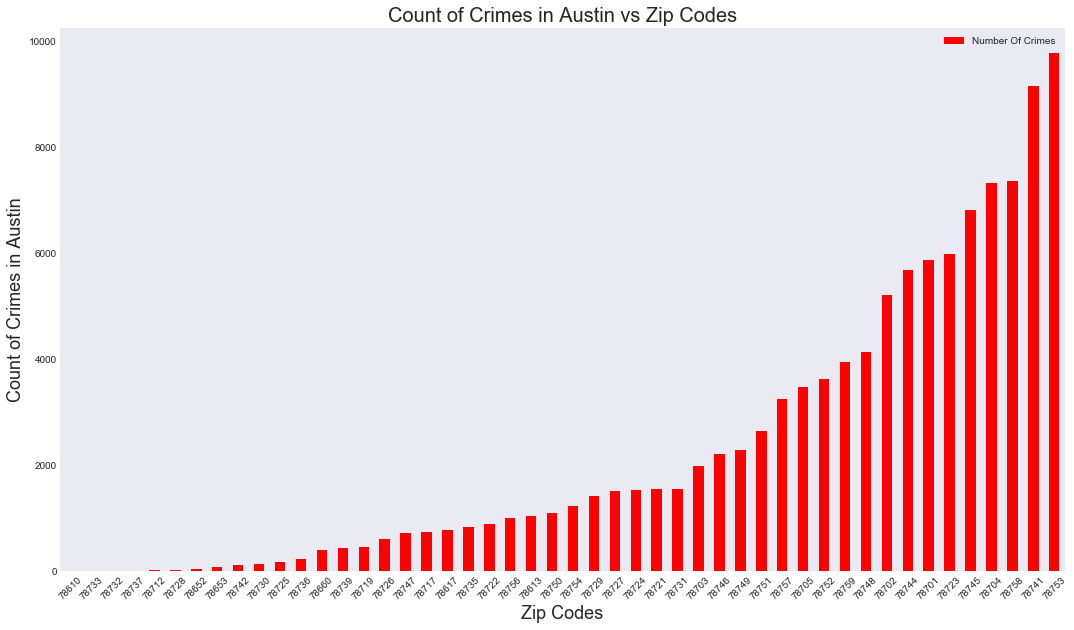

In [81]:
plt.style.use('seaborn-dark')

df_crime_zip_code.plot(x='Zip',y='Number Of Crimes', kind='bar',figsize=(18,10),color=['red','yellow','black']);
plt.xticks(rotation=45);
plt.xlabel('Zip Codes' ,fontsize=(18))
plt.ylabel('Count of Crimes in Austin',fontsize=(18))
plt.title('Count of Crimes in Austin vs Zip Codes',fontsize=(20));